In [ ]:
# import sys
# sys.path += ["/home/ychen2/projects/rrg-yche/ychen2/KitaevLadder"]

In [1]:
# for file checking
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from kitaev_ladder_snake1 import run_atomic, save_after_run, load_data

from utility import linspace

In [9]:
chi = 64

L = 2
# the folder name for storing data
folder_prefix = f'Spin_half_snake1_L_{L}_chi_{chi}_high_res/' # high resolution means the smallest step is 0.01
# S = 1

Jx = 2.0
Jy = 2.0
Jz = 1.0


# start with Jx = Jy = 2.0
# chi_list = [2**k for k in range(3, 8)]
# for chi in chi_list:
#     result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, S=S, chi=chi, initial_psi=initial_psi)
#     psi = result['psi']
#     initial_psi = psi.copy()
print("Hello We Just Began!")

J_list = linspace(2.0, 0, 201)

X, Y = np.meshgrid(J_list, J_list)

Hello We Just Began!


In [ ]:
E = np.zeros_like(X)
S = np.zeros_like(X)
Xi = np.zeros_like(X)

In [2]:
# loading and saving matrices on Cedar seems super slow and in great lack of efficiency
# Therefore, we decided to save and load them frequently instead of all at once
file_name_for_E = folder_prefix+'/'+'Energy.dat'
file_name_for_S = folder_prefix+'/'+'Entropy.dat'
file_name_for_cl = folder_prefix+'/'+'Correlation.dat'

if os.path.isfile(file_name_for_E):
    E = np.loadtxt(file_name_for_E)
    print("Load the file foe Energy!")
    pass 
if os.path.isfile(file_name_for_S):
    S = np.loadtxt(file_name_for_S)
    print("Load the file for Entropy!")
    pass 
if os.path.isfile(file_name_for_cl):
    Xi = np.loadtxt(file_name_for_cl)
    print("load the file for Correlation Length!")
    pass

Hello We Just Began!
Load the file foe Energy!
Load the file for Entropy!
load the file for Correlation Length!


In [5]:
# To avoid the possible bugs and confusion, here we should follow the way we organize the phase diagram points
# This means that we will not sweep the whole diagram in a 'best' manner but in the original way we got these points 
# This is because we didn't really well control the exact digits of the parameters, i.e. we did not truncate properly and there will be something like 1.99999999999999997 which affects the loading of data
for Jx in J_list:
    # continue if already calculated
    i = int(np.round(Jx/0.01))
    if E[i, i]!=0 and S[i, i]!=0 and Xi[i, i]!=0:
        print("The values already exist! Continue.")
        continue

    # load the result
    Jy = Jx
    result = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)


    if (result == -1):
        print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
        energy = np.nan 
        ee = np.nan 
        cl = np.nan 
    else:
        energy = result['energy']
        psi = result['psi']
        ee = np.mean(psi.entanglement_entropy())
        cl = psi.correlation_length()
    # initial_psi = psi.copy()

    E[i, i] = energy
    S[i, i] = ee  
    Xi[i, i] = cl 
    
    np.savetxt(file_name_for_E, E)
    np.savetxt(file_name_for_S, S)
    np.savetxt(file_name_for_cl, Xi)

    print("The values have been stored in files. Continue.")

for Jx in J_list[:-1]:
    N = int(np.round(Jx / 0.01))
    Jy_list = linspace(Jx-0.01, 0, N)

    for Jy in Jy_list:
        # continue if already calculated
        i = int(np.round(Jx / 0.01))
        j = int(np.round(Jy / 0.01))
        if E[i, j]!=0 and S[i, j]!=0 and Xi[i, j]!=0:
            print("The values already exist! Continue.")
            continue


        # print(f'J = ({Jx}, {Jy}, {Jz})')
        result = load_data(Jx=Jx,Jy=Jy,Jz=Jz,L=L,chi=chi,prefix=folder_prefix)
        if (result == -1):
            print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
            energy = np.nan 
            ee = np.nan 
            cl = np.nan 
        else:
            energy = result['energy']
            psi = result['psi']
            ee = np.mean(psi.entanglement_entropy())
            cl = psi.correlation_length()
        # initial_psi = psi.copy()

        E[i, j] = energy
        S[i, j] = ee  
        Xi[i, j] = cl 
    
        np.savetxt(file_name_for_E, E)
        np.savetxt(file_name_for_S, S)
        np.savetxt(file_name_for_cl, Xi)

        print("The values have been stored in files. Continue.")

Hello We Just Began!
Load the file foe Energy!
Load the file for Entropy!
load the file for Correlation Length!
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist! Continue.
The values already exist

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3837: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)


The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Continue.
The values have been stored in files. Co

In [ ]:
# This piece of code is for cleaning all the data filled with NaN

chi = 64

L = 2
# the folder name for storing data
folder_prefix = f'Spin_half_snake1_L_{L}_chi_{chi}_high_res/' # high resolution means the smallest step is 0.01
# S = 1

Jx = 2.0
Jy = 2.0
Jz = 1.0


# start with Jx = Jy = 2.0
# chi_list = [2**k for k in range(3, 8)]
# for chi in chi_list:
#     result = run_atomic(Jx=Jx, Jy=Jy, Jz=Jz, L=L, S=S, chi=chi, initial_psi=initial_psi)
#     psi = result['psi']
#     initial_psi = psi.copy()
print("Hello We Just Began!")

J_list = linspace(2.0, 0, 201)

X, Y = np.meshgrid(J_list, J_list)
# E = np.zeros_like(X)
# S = np.zeros_like(X)
# Xi = np.zeros_like(X)

# loading and saving matrices on Cedar seems super slow and in great lack of efficiency
# Therefore, we decided to save and load them frequently instead of all at once
file_name_for_E = folder_prefix+'/'+'Energy.dat'
file_name_for_S = folder_prefix+'/'+'Entropy.dat'
file_name_for_cl = folder_prefix+'/'+'Correlation.dat'

if os.path.isfile(file_name_for_E):
    E = np.loadtxt(file_name_for_E)
    print("Load the file for Energy!")
    pass 
if os.path.isfile(file_name_for_S):
    S = np.loadtxt(file_name_for_S)
    print("Load the file for Entropy!")
    pass 
if os.path.isfile(file_name_for_cl):
    Xi = np.loadtxt(file_name_for_cl)
    print("load the file for Correlation Length!")
    pass

# To avoid the possible bugs and confusion, here we should follow the way we organize the phase diagram points
# This means that we will not sweep the whole diagram in a 'best' manner but in the original way we got these points 
# This is because we didn't really well control the exact digits of the parameters, i.e. we did not truncate properly and there will be something like 1.99999999999999997 which affects the loading of data
for Jx in J_list:
    # continue if already calculated
    i = int(np.round(Jx/0.01))
    if (np.isnan(E[i,i]) is False) and (np.isnan(S[i,i]) is False) and (np.isnan(Xi[i,i]) is False):
        print("The values already exist! Continue.")
        continue

    # load the result
    Jy = Jx
    result = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)


    if (result == -1):
        print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
        energy = np.nan 
        ee = np.nan 
        cl = np.nan 
    else:
        energy = result['energy']
        psi = result['psi']
        ee = np.mean(psi.entanglement_entropy())
        cl = psi.correlation_length()
    # initial_psi = psi.copy()

    E[i, i] = energy
    S[i, i] = ee  
    Xi[i, i] = cl 
    
    np.savetxt(file_name_for_E, E)
    np.savetxt(file_name_for_S, S)
    np.savetxt(file_name_for_cl, Xi)

    print("The values have been stored in files. Continue.")

In [45]:
for Jx in J_list[:-1]:
    N = int(np.round(Jx / 0.01))
    Jy_list = linspace(Jx-0.01, 0, N)

    for Jy in Jy_list:
        # continue if already calculated
        i = int(np.round(Jx / 0.01))
        j = int(np.round(Jy / 0.01))
        if i+j is not 1:
            print("Not Expected! Continue.")
            continue


        # print(f'J = ({Jx}, {Jy}, {Jz})')
        result = load_data(Jx=Jx,Jy=Jy,Jz=Jz,L=L,chi=chi,prefix=folder_prefix)
        if (result == -1):
            print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
            energy = np.nan 
            ee = np.nan 
            cl = np.nan 
        else:
            energy = result['energy']
            psi = result['psi']
            ee = np.mean(psi.entanglement_entropy())
            cl = psi.correlation_length()
        # initial_psi = psi.copy()

        E[i, j] = energy
        S[i, j] = ee  
        Xi[i, j] = cl 
    
        np.savetxt(file_name_for_E, E)
        np.savetxt(file_name_for_S, S)
        np.savetxt(file_name_for_cl, Xi)

        print("The values have been stored in files. Continue.")

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Continue.
Not Expected! Co

In [3]:
E_sym = E + E.transpose()
for i in range(E_sym.shape[0]):
    E_sym[i, i] *= 0.5

In [4]:
E_sym[0, 1] = (E_sym[0, 0] + E_sym[0, 2]) / 2.0
E_sym[1, 0] = E_sym[0, 1]

In [5]:
E_sym[0, 2]

-0.12501250031254862

In [6]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

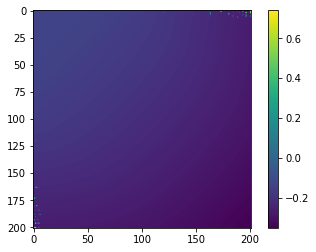

In [7]:
plt.imshow(E_sym)
plt.colorbar()
plt.show()

Now the energy map seems quite good.
Let's see how difference it is from the analytic results.

In [8]:
from analytic_spin_half import energy_average

In [40]:
E_true = np.zeros_like(X)

for i in range(201):
    for j in range(201):
        Jx = i*.01
        Jy = j*.01
#         print(Jx, Jy)
        Jz = 1.0
#         print(f'Jx = {Jx}, Jy = {Jy}, Jz = {Jz}', energy_average(Jx, Jy, Jz))
        E_true[i, j] = energy_average(Jx, Jy, Jz, N=100)

In [30]:
E_sym

array([[-0.125     , -0.12500625, -0.1250125 , ..., -0.26355232,
        -0.26471877, -0.2658861 ],
       [-0.12500625, -0.1250125 , -0.12502812, ..., -0.26359678,
        -0.26476276,  0.50327941],
       [-0.1250125 , -0.12502812, -0.12504999, ..., -0.26364464,
        -0.26481013,  0.55880966],
       ...,
       [-0.26355232, -0.26359678, -0.26364464, ..., -0.34774975,
        -0.34849009, -0.34923241],
       [-0.26471877, -0.26476276, -0.26481013, ..., -0.34849009,
        -0.34922889, -0.34996966],
       [-0.2658861 ,  0.50327941,  0.55880966, ..., -0.34923241,
        -0.34996966, -0.35070888]])

In [31]:
E_true

array([[5.6113421 , 5.59951453, 5.58771858, ..., 4.25562424, 4.254874  ,
        4.25417764],
       [5.59951453, 5.5876622 , 5.57584149, ..., 4.23696208, 4.2362041 ,
        4.23550032],
       [5.58771858, 5.57584149, 5.56399605, ..., 4.21831429, 4.21754845,
        4.21683712],
       ...,
       [4.25562424, 4.23696208, 4.21831429, ..., 2.00079976, 2.00044994,
        2.00020001],
       [4.254874  , 4.2362041 , 4.21754845, ..., 2.00044994, 2.00019999,
        2.00005   ],
       [4.25417764, 4.23550032, 4.21683712, ..., 2.00020001, 2.00005   ,
        2.        ]])

In [60]:
tol_e = 1e-2
n = 0

for i in range(201):
    for j in range(201):
#         print(f'Jx = {X[i, j]}, Jy = {Y[i, j]}')
#         print('Ratio = ', E_true[i, j] / E_sym[i, j])
        Jx = i*0.01
        Jy = j*0.01
        relative_e = (np.abs((E_true[i, j] / E_sym[i, j])/ 16.0) - 1)
        if relative_e  > tol_e:
            n+=1
#             print("Warning: ", f'Jx = {Jx}, Jy = {Jy}', relative_e)
print(n)

72


In [36]:
print(E_true[100, 100])
print(E_sym[100, 100])
print(E_true[100, 100] / E_sym[100, 100])

3.3552199437243955
-0.2097012464828225
-15.999999999996353


In [37]:
from kitaev_ladder_snake1 import run_atomic

In [38]:
run_atomic(Jx=0, Jy=0, Jz=1, L=2)

Reading 'L'=2 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  30 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for co

{'psi': <tenpy.networks.mps.MPS at 0x7f265ae22350>,
 'energy': -0.125,
 'sweeps_stat': {'sweep': [10, 20, 30, 40],
  'N_updates': [120, 240, 360, 480],
  'E': [-0.125, -0.125, -0.125, -0.125],
  'S': [nan, nan, 0.0, 0.0],
  'time': [1.0505530834197998,
   2.1336026191711426,
   2.6764235496520996,
   3.206813097000122],
  'max_trunc_err': [0.0, 0.0, 0.0, 0.0],
  'max_E_trunc': [0.0, 0.0, 0.0, 0.0],
  'max_chi': [1, 1, 1, 1],
  'norm_err': [0.0, 0.0, 0.0, 0.0]},
 'parameters': {'chi': 30,
  'Jx': 0,
  'Jy': 0,
  'Jz': 1,
  'L': 2,
  'initial_psi': None,
  'initial': 'random',
  'max_E_err': 1e-06,
  'max_S_err': 0.0001,
  'max_sweeps': 200}}

In [39]:
2/0.125

16.0

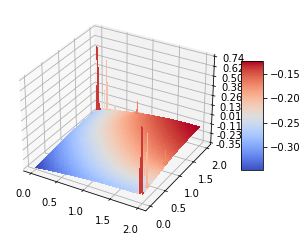

In [56]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = E_sym

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [36]:
np.isnan(E_sym[1,0])

True

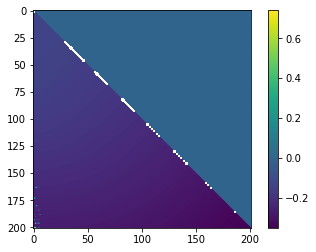

In [15]:
plt.imshow(E)
plt.colorbar()
plt.show()

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.


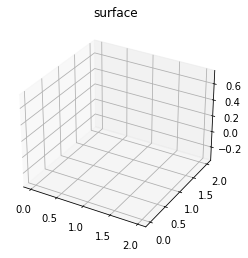

In [20]:
Z = E_sym
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

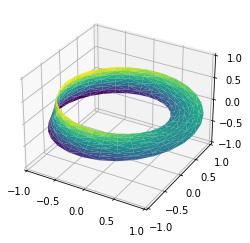

In [22]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

In [57]:
S_sym = S + S.transpose()
for i in range(S_sym.shape[0]):
    S_sym[i, i] *= 0.5

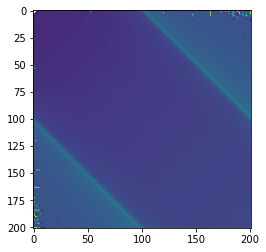

In [58]:
plt.imshow(S_sym)

In [60]:
S_sym[0, 1] = (S_sym[0, 0] + S_sym[0, 2]) / 2.0
S_sym[1, 0] = S_sym[0, 1]

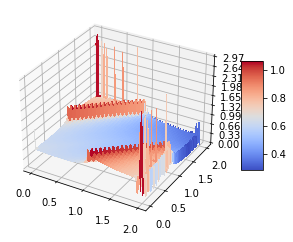

In [61]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = S_sym

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Save the wavefunctions

In [10]:
wf_dict = {}
e_dict = {}

In [11]:
for i in range(201):
    for j in range(201):
        Jx = X[i, j]
        Jy = Y[i, j]
        Jz = 1.0
        
        result = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)

        if (result == -1):
            print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
            continue
        else:
            energy = result['energy']
            psi = result['psi']
            
            e_dict[(Jx, Jy, Jz)] = energy
            wf_dict[(Jx, Jy, Jz)] = psi
            
        # initial_psi = psi.copy()


No such file for J = (1.99, 2.0, 1.0)
No such file for J = (1.98, 2.0, 1.0)
No such file for J = (1.97, 2.0, 1.0)
No such file for J = (1.96, 2.0, 1.0)
No such file for J = (1.95, 2.0, 1.0)
No such file for J = (1.94, 2.0, 1.0)
No such file for J = (1.93, 2.0, 1.0)
No such file for J = (1.92, 2.0, 1.0)
No such file for J = (1.91, 2.0, 1.0)
No such file for J = (1.9, 2.0, 1.0)
No such file for J = (1.89, 2.0, 1.0)
No such file for J = (1.88, 2.0, 1.0)
No such file for J = (1.87, 2.0, 1.0)
No such file for J = (1.86, 2.0, 1.0)
No such file for J = (1.85, 2.0, 1.0)
No such file for J = (1.84, 2.0, 1.0)
No such file for J = (1.83, 2.0, 1.0)
No such file for J = (1.82, 2.0, 1.0)
No such file for J = (1.81, 2.0, 1.0)
No such file for J = (1.8, 2.0, 1.0)
No such file for J = (1.79, 2.0, 1.0)
No such file for J = (1.78, 2.0, 1.0)
No such file for J = (1.77, 2.0, 1.0)
No such file for J = (1.76, 2.0, 1.0)
No such file for J = (1.75, 2.0, 1.0)
No such file for J = (1.74, 2.0, 1.0)
No such file f

No such file for J = (1.97, 1.98, 1.0)
No such file for J = (1.96, 1.98, 1.0)
No such file for J = (1.95, 1.98, 1.0)
No such file for J = (1.94, 1.98, 1.0)
No such file for J = (1.93, 1.98, 1.0)
No such file for J = (1.92, 1.98, 1.0)
No such file for J = (1.91, 1.98, 1.0)
No such file for J = (1.9, 1.98, 1.0)
No such file for J = (1.89, 1.98, 1.0)
No such file for J = (1.88, 1.98, 1.0)
No such file for J = (1.87, 1.98, 1.0)
No such file for J = (1.86, 1.98, 1.0)
No such file for J = (1.85, 1.98, 1.0)
No such file for J = (1.84, 1.98, 1.0)
No such file for J = (1.83, 1.98, 1.0)
No such file for J = (1.82, 1.98, 1.0)
No such file for J = (1.81, 1.98, 1.0)
No such file for J = (1.8, 1.98, 1.0)
No such file for J = (1.79, 1.98, 1.0)
No such file for J = (1.78, 1.98, 1.0)
No such file for J = (1.77, 1.98, 1.0)
No such file for J = (1.76, 1.98, 1.0)
No such file for J = (1.75, 1.98, 1.0)
No such file for J = (1.74, 1.98, 1.0)
No such file for J = (1.73, 1.98, 1.0)
No such file for J = (1.72,

No such file for J = (1.95, 1.96, 1.0)
No such file for J = (1.94, 1.96, 1.0)
No such file for J = (1.93, 1.96, 1.0)
No such file for J = (1.92, 1.96, 1.0)
No such file for J = (1.91, 1.96, 1.0)
No such file for J = (1.9, 1.96, 1.0)
No such file for J = (1.89, 1.96, 1.0)
No such file for J = (1.88, 1.96, 1.0)
No such file for J = (1.87, 1.96, 1.0)
No such file for J = (1.86, 1.96, 1.0)
No such file for J = (1.85, 1.96, 1.0)
No such file for J = (1.84, 1.96, 1.0)
No such file for J = (1.83, 1.96, 1.0)
No such file for J = (1.82, 1.96, 1.0)
No such file for J = (1.81, 1.96, 1.0)
No such file for J = (1.8, 1.96, 1.0)
No such file for J = (1.79, 1.96, 1.0)
No such file for J = (1.78, 1.96, 1.0)
No such file for J = (1.77, 1.96, 1.0)
No such file for J = (1.76, 1.96, 1.0)
No such file for J = (1.75, 1.96, 1.0)
No such file for J = (1.74, 1.96, 1.0)
No such file for J = (1.73, 1.96, 1.0)
No such file for J = (1.72, 1.96, 1.0)
No such file for J = (1.71, 1.96, 1.0)
No such file for J = (1.7, 

No such file for J = (1.93, 1.94, 1.0)
No such file for J = (1.92, 1.94, 1.0)
No such file for J = (1.91, 1.94, 1.0)
No such file for J = (1.9, 1.94, 1.0)
No such file for J = (1.89, 1.94, 1.0)
No such file for J = (1.88, 1.94, 1.0)
No such file for J = (1.87, 1.94, 1.0)
No such file for J = (1.86, 1.94, 1.0)
No such file for J = (1.85, 1.94, 1.0)
No such file for J = (1.84, 1.94, 1.0)
No such file for J = (1.83, 1.94, 1.0)
No such file for J = (1.82, 1.94, 1.0)
No such file for J = (1.81, 1.94, 1.0)
No such file for J = (1.8, 1.94, 1.0)
No such file for J = (1.79, 1.94, 1.0)
No such file for J = (1.78, 1.94, 1.0)
No such file for J = (1.77, 1.94, 1.0)
No such file for J = (1.76, 1.94, 1.0)
No such file for J = (1.75, 1.94, 1.0)
No such file for J = (1.74, 1.94, 1.0)
No such file for J = (1.73, 1.94, 1.0)
No such file for J = (1.72, 1.94, 1.0)
No such file for J = (1.71, 1.94, 1.0)
No such file for J = (1.7, 1.94, 1.0)
No such file for J = (1.69, 1.94, 1.0)
No such file for J = (1.68, 

No such file for J = (1.91, 1.92, 1.0)
No such file for J = (1.9, 1.92, 1.0)
No such file for J = (1.89, 1.92, 1.0)
No such file for J = (1.88, 1.92, 1.0)
No such file for J = (1.87, 1.92, 1.0)
No such file for J = (1.86, 1.92, 1.0)
No such file for J = (1.85, 1.92, 1.0)
No such file for J = (1.84, 1.92, 1.0)
No such file for J = (1.83, 1.92, 1.0)
No such file for J = (1.82, 1.92, 1.0)
No such file for J = (1.81, 1.92, 1.0)
No such file for J = (1.8, 1.92, 1.0)
No such file for J = (1.79, 1.92, 1.0)
No such file for J = (1.78, 1.92, 1.0)
No such file for J = (1.77, 1.92, 1.0)
No such file for J = (1.76, 1.92, 1.0)
No such file for J = (1.75, 1.92, 1.0)
No such file for J = (1.74, 1.92, 1.0)
No such file for J = (1.73, 1.92, 1.0)
No such file for J = (1.72, 1.92, 1.0)
No such file for J = (1.71, 1.92, 1.0)
No such file for J = (1.7, 1.92, 1.0)
No such file for J = (1.69, 1.92, 1.0)
No such file for J = (1.68, 1.92, 1.0)
No such file for J = (1.67, 1.92, 1.0)
No such file for J = (1.66, 

No such file for J = (1.89, 1.9, 1.0)
No such file for J = (1.88, 1.9, 1.0)
No such file for J = (1.87, 1.9, 1.0)
No such file for J = (1.86, 1.9, 1.0)
No such file for J = (1.85, 1.9, 1.0)
No such file for J = (1.84, 1.9, 1.0)
No such file for J = (1.83, 1.9, 1.0)
No such file for J = (1.82, 1.9, 1.0)
No such file for J = (1.81, 1.9, 1.0)
No such file for J = (1.8, 1.9, 1.0)
No such file for J = (1.79, 1.9, 1.0)
No such file for J = (1.78, 1.9, 1.0)
No such file for J = (1.77, 1.9, 1.0)
No such file for J = (1.76, 1.9, 1.0)
No such file for J = (1.75, 1.9, 1.0)
No such file for J = (1.74, 1.9, 1.0)
No such file for J = (1.73, 1.9, 1.0)
No such file for J = (1.72, 1.9, 1.0)
No such file for J = (1.71, 1.9, 1.0)
No such file for J = (1.7, 1.9, 1.0)
No such file for J = (1.69, 1.9, 1.0)
No such file for J = (1.68, 1.9, 1.0)
No such file for J = (1.67, 1.9, 1.0)
No such file for J = (1.66, 1.9, 1.0)
No such file for J = (1.65, 1.9, 1.0)
No such file for J = (1.64, 1.9, 1.0)
No such file f

No such file for J = (1.87, 1.88, 1.0)
No such file for J = (1.86, 1.88, 1.0)
No such file for J = (1.85, 1.88, 1.0)
No such file for J = (1.84, 1.88, 1.0)
No such file for J = (1.83, 1.88, 1.0)
No such file for J = (1.82, 1.88, 1.0)
No such file for J = (1.81, 1.88, 1.0)
No such file for J = (1.8, 1.88, 1.0)
No such file for J = (1.79, 1.88, 1.0)
No such file for J = (1.78, 1.88, 1.0)
No such file for J = (1.77, 1.88, 1.0)
No such file for J = (1.76, 1.88, 1.0)
No such file for J = (1.75, 1.88, 1.0)
No such file for J = (1.74, 1.88, 1.0)
No such file for J = (1.73, 1.88, 1.0)
No such file for J = (1.72, 1.88, 1.0)
No such file for J = (1.71, 1.88, 1.0)
No such file for J = (1.7, 1.88, 1.0)
No such file for J = (1.69, 1.88, 1.0)
No such file for J = (1.68, 1.88, 1.0)
No such file for J = (1.67, 1.88, 1.0)
No such file for J = (1.66, 1.88, 1.0)
No such file for J = (1.65, 1.88, 1.0)
No such file for J = (1.64, 1.88, 1.0)
No such file for J = (1.63, 1.88, 1.0)
No such file for J = (1.62,

No such file for J = (1.85, 1.86, 1.0)
No such file for J = (1.84, 1.86, 1.0)
No such file for J = (1.83, 1.86, 1.0)
No such file for J = (1.82, 1.86, 1.0)
No such file for J = (1.81, 1.86, 1.0)
No such file for J = (1.8, 1.86, 1.0)
No such file for J = (1.79, 1.86, 1.0)
No such file for J = (1.78, 1.86, 1.0)
No such file for J = (1.77, 1.86, 1.0)
No such file for J = (1.76, 1.86, 1.0)
No such file for J = (1.75, 1.86, 1.0)
No such file for J = (1.74, 1.86, 1.0)
No such file for J = (1.73, 1.86, 1.0)
No such file for J = (1.72, 1.86, 1.0)
No such file for J = (1.71, 1.86, 1.0)
No such file for J = (1.7, 1.86, 1.0)
No such file for J = (1.69, 1.86, 1.0)
No such file for J = (1.68, 1.86, 1.0)
No such file for J = (1.67, 1.86, 1.0)
No such file for J = (1.66, 1.86, 1.0)
No such file for J = (1.65, 1.86, 1.0)
No such file for J = (1.64, 1.86, 1.0)
No such file for J = (1.63, 1.86, 1.0)
No such file for J = (1.62, 1.86, 1.0)
No such file for J = (1.61, 1.86, 1.0)
No such file for J = (1.6, 

No such file for J = (1.83, 1.84, 1.0)
No such file for J = (1.82, 1.84, 1.0)
No such file for J = (1.81, 1.84, 1.0)
No such file for J = (1.8, 1.84, 1.0)
No such file for J = (1.79, 1.84, 1.0)
No such file for J = (1.78, 1.84, 1.0)
No such file for J = (1.77, 1.84, 1.0)
No such file for J = (1.76, 1.84, 1.0)
No such file for J = (1.75, 1.84, 1.0)
No such file for J = (1.74, 1.84, 1.0)
No such file for J = (1.73, 1.84, 1.0)
No such file for J = (1.72, 1.84, 1.0)
No such file for J = (1.71, 1.84, 1.0)
No such file for J = (1.7, 1.84, 1.0)
No such file for J = (1.69, 1.84, 1.0)
No such file for J = (1.68, 1.84, 1.0)
No such file for J = (1.67, 1.84, 1.0)
No such file for J = (1.66, 1.84, 1.0)
No such file for J = (1.65, 1.84, 1.0)
No such file for J = (1.64, 1.84, 1.0)
No such file for J = (1.63, 1.84, 1.0)
No such file for J = (1.62, 1.84, 1.0)
No such file for J = (1.61, 1.84, 1.0)
No such file for J = (1.6, 1.84, 1.0)
No such file for J = (1.59, 1.84, 1.0)
No such file for J = (1.58, 

No such file for J = (1.81, 1.82, 1.0)
No such file for J = (1.8, 1.82, 1.0)
No such file for J = (1.79, 1.82, 1.0)
No such file for J = (1.78, 1.82, 1.0)
No such file for J = (1.77, 1.82, 1.0)
No such file for J = (1.76, 1.82, 1.0)
No such file for J = (1.75, 1.82, 1.0)
No such file for J = (1.74, 1.82, 1.0)
No such file for J = (1.73, 1.82, 1.0)
No such file for J = (1.72, 1.82, 1.0)
No such file for J = (1.71, 1.82, 1.0)
No such file for J = (1.7, 1.82, 1.0)
No such file for J = (1.69, 1.82, 1.0)
No such file for J = (1.68, 1.82, 1.0)
No such file for J = (1.67, 1.82, 1.0)
No such file for J = (1.66, 1.82, 1.0)
No such file for J = (1.65, 1.82, 1.0)
No such file for J = (1.64, 1.82, 1.0)
No such file for J = (1.63, 1.82, 1.0)
No such file for J = (1.62, 1.82, 1.0)
No such file for J = (1.61, 1.82, 1.0)
No such file for J = (1.6, 1.82, 1.0)
No such file for J = (1.59, 1.82, 1.0)
No such file for J = (1.58, 1.82, 1.0)
No such file for J = (1.57, 1.82, 1.0)
No such file for J = (1.56, 

No such file for J = (1.79, 1.8, 1.0)
No such file for J = (1.78, 1.8, 1.0)
No such file for J = (1.77, 1.8, 1.0)
No such file for J = (1.76, 1.8, 1.0)
No such file for J = (1.75, 1.8, 1.0)
No such file for J = (1.74, 1.8, 1.0)
No such file for J = (1.73, 1.8, 1.0)
No such file for J = (1.72, 1.8, 1.0)
No such file for J = (1.71, 1.8, 1.0)
No such file for J = (1.7, 1.8, 1.0)
No such file for J = (1.69, 1.8, 1.0)
No such file for J = (1.68, 1.8, 1.0)
No such file for J = (1.67, 1.8, 1.0)
No such file for J = (1.66, 1.8, 1.0)
No such file for J = (1.65, 1.8, 1.0)
No such file for J = (1.64, 1.8, 1.0)
No such file for J = (1.63, 1.8, 1.0)
No such file for J = (1.62, 1.8, 1.0)
No such file for J = (1.61, 1.8, 1.0)
No such file for J = (1.6, 1.8, 1.0)
No such file for J = (1.59, 1.8, 1.0)
No such file for J = (1.58, 1.8, 1.0)
No such file for J = (1.57, 1.8, 1.0)
No such file for J = (1.56, 1.8, 1.0)
No such file for J = (1.55, 1.8, 1.0)
No such file for J = (1.54, 1.8, 1.0)
No such file f

No such file for J = (1.77, 1.78, 1.0)
No such file for J = (1.76, 1.78, 1.0)
No such file for J = (1.75, 1.78, 1.0)
No such file for J = (1.74, 1.78, 1.0)
No such file for J = (1.73, 1.78, 1.0)
No such file for J = (1.72, 1.78, 1.0)
No such file for J = (1.71, 1.78, 1.0)
No such file for J = (1.7, 1.78, 1.0)
No such file for J = (1.69, 1.78, 1.0)
No such file for J = (1.68, 1.78, 1.0)
No such file for J = (1.67, 1.78, 1.0)
No such file for J = (1.66, 1.78, 1.0)
No such file for J = (1.65, 1.78, 1.0)
No such file for J = (1.64, 1.78, 1.0)
No such file for J = (1.63, 1.78, 1.0)
No such file for J = (1.62, 1.78, 1.0)
No such file for J = (1.61, 1.78, 1.0)
No such file for J = (1.6, 1.78, 1.0)
No such file for J = (1.59, 1.78, 1.0)
No such file for J = (1.58, 1.78, 1.0)
No such file for J = (1.57, 1.78, 1.0)
No such file for J = (1.56, 1.78, 1.0)
No such file for J = (1.55, 1.78, 1.0)
No such file for J = (1.54, 1.78, 1.0)
No such file for J = (1.53, 1.78, 1.0)
No such file for J = (1.52,

No such file for J = (1.75, 1.76, 1.0)
No such file for J = (1.74, 1.76, 1.0)
No such file for J = (1.73, 1.76, 1.0)
No such file for J = (1.72, 1.76, 1.0)
No such file for J = (1.71, 1.76, 1.0)
No such file for J = (1.7, 1.76, 1.0)
No such file for J = (1.69, 1.76, 1.0)
No such file for J = (1.68, 1.76, 1.0)
No such file for J = (1.67, 1.76, 1.0)
No such file for J = (1.66, 1.76, 1.0)
No such file for J = (1.65, 1.76, 1.0)
No such file for J = (1.64, 1.76, 1.0)
No such file for J = (1.63, 1.76, 1.0)
No such file for J = (1.62, 1.76, 1.0)
No such file for J = (1.61, 1.76, 1.0)
No such file for J = (1.6, 1.76, 1.0)
No such file for J = (1.59, 1.76, 1.0)
No such file for J = (1.58, 1.76, 1.0)
No such file for J = (1.57, 1.76, 1.0)
No such file for J = (1.56, 1.76, 1.0)
No such file for J = (1.55, 1.76, 1.0)
No such file for J = (1.54, 1.76, 1.0)
No such file for J = (1.53, 1.76, 1.0)
No such file for J = (1.52, 1.76, 1.0)
No such file for J = (1.51, 1.76, 1.0)
No such file for J = (1.5, 

No such file for J = (1.73, 1.74, 1.0)
No such file for J = (1.72, 1.74, 1.0)
No such file for J = (1.71, 1.74, 1.0)
No such file for J = (1.7, 1.74, 1.0)
No such file for J = (1.69, 1.74, 1.0)
No such file for J = (1.68, 1.74, 1.0)
No such file for J = (1.67, 1.74, 1.0)
No such file for J = (1.66, 1.74, 1.0)
No such file for J = (1.65, 1.74, 1.0)
No such file for J = (1.64, 1.74, 1.0)
No such file for J = (1.63, 1.74, 1.0)
No such file for J = (1.62, 1.74, 1.0)
No such file for J = (1.61, 1.74, 1.0)
No such file for J = (1.6, 1.74, 1.0)
No such file for J = (1.59, 1.74, 1.0)
No such file for J = (1.58, 1.74, 1.0)
No such file for J = (1.57, 1.74, 1.0)
No such file for J = (1.56, 1.74, 1.0)
No such file for J = (1.55, 1.74, 1.0)
No such file for J = (1.54, 1.74, 1.0)
No such file for J = (1.53, 1.74, 1.0)
No such file for J = (1.52, 1.74, 1.0)
No such file for J = (1.51, 1.74, 1.0)
No such file for J = (1.5, 1.74, 1.0)
No such file for J = (1.49, 1.74, 1.0)
No such file for J = (1.48, 

No such file for J = (1.71, 1.72, 1.0)
No such file for J = (1.7, 1.72, 1.0)
No such file for J = (1.69, 1.72, 1.0)
No such file for J = (1.68, 1.72, 1.0)
No such file for J = (1.67, 1.72, 1.0)
No such file for J = (1.66, 1.72, 1.0)
No such file for J = (1.65, 1.72, 1.0)
No such file for J = (1.64, 1.72, 1.0)
No such file for J = (1.63, 1.72, 1.0)
No such file for J = (1.62, 1.72, 1.0)
No such file for J = (1.61, 1.72, 1.0)
No such file for J = (1.6, 1.72, 1.0)
No such file for J = (1.59, 1.72, 1.0)
No such file for J = (1.58, 1.72, 1.0)
No such file for J = (1.57, 1.72, 1.0)
No such file for J = (1.56, 1.72, 1.0)
No such file for J = (1.55, 1.72, 1.0)
No such file for J = (1.54, 1.72, 1.0)
No such file for J = (1.53, 1.72, 1.0)
No such file for J = (1.52, 1.72, 1.0)
No such file for J = (1.51, 1.72, 1.0)
No such file for J = (1.5, 1.72, 1.0)
No such file for J = (1.49, 1.72, 1.0)
No such file for J = (1.48, 1.72, 1.0)
No such file for J = (1.47, 1.72, 1.0)
No such file for J = (1.46, 

No such file for J = (1.69, 1.7, 1.0)
No such file for J = (1.68, 1.7, 1.0)
No such file for J = (1.67, 1.7, 1.0)
No such file for J = (1.66, 1.7, 1.0)
No such file for J = (1.65, 1.7, 1.0)
No such file for J = (1.64, 1.7, 1.0)
No such file for J = (1.63, 1.7, 1.0)
No such file for J = (1.62, 1.7, 1.0)
No such file for J = (1.61, 1.7, 1.0)
No such file for J = (1.6, 1.7, 1.0)
No such file for J = (1.59, 1.7, 1.0)
No such file for J = (1.58, 1.7, 1.0)
No such file for J = (1.57, 1.7, 1.0)
No such file for J = (1.56, 1.7, 1.0)
No such file for J = (1.55, 1.7, 1.0)
No such file for J = (1.54, 1.7, 1.0)
No such file for J = (1.53, 1.7, 1.0)
No such file for J = (1.52, 1.7, 1.0)
No such file for J = (1.51, 1.7, 1.0)
No such file for J = (1.5, 1.7, 1.0)
No such file for J = (1.49, 1.7, 1.0)
No such file for J = (1.48, 1.7, 1.0)
No such file for J = (1.47, 1.7, 1.0)
No such file for J = (1.46, 1.7, 1.0)
No such file for J = (1.45, 1.7, 1.0)
No such file for J = (1.44, 1.7, 1.0)
No such file f

No such file for J = (1.67, 1.68, 1.0)
No such file for J = (1.66, 1.68, 1.0)
No such file for J = (1.65, 1.68, 1.0)
No such file for J = (1.64, 1.68, 1.0)
No such file for J = (1.63, 1.68, 1.0)
No such file for J = (1.62, 1.68, 1.0)
No such file for J = (1.61, 1.68, 1.0)
No such file for J = (1.6, 1.68, 1.0)
No such file for J = (1.59, 1.68, 1.0)
No such file for J = (1.58, 1.68, 1.0)
No such file for J = (1.57, 1.68, 1.0)
No such file for J = (1.56, 1.68, 1.0)
No such file for J = (1.55, 1.68, 1.0)
No such file for J = (1.54, 1.68, 1.0)
No such file for J = (1.53, 1.68, 1.0)
No such file for J = (1.52, 1.68, 1.0)
No such file for J = (1.51, 1.68, 1.0)
No such file for J = (1.5, 1.68, 1.0)
No such file for J = (1.49, 1.68, 1.0)
No such file for J = (1.48, 1.68, 1.0)
No such file for J = (1.47, 1.68, 1.0)
No such file for J = (1.46, 1.68, 1.0)
No such file for J = (1.45, 1.68, 1.0)
No such file for J = (1.44, 1.68, 1.0)
No such file for J = (1.43, 1.68, 1.0)
No such file for J = (1.42,

No such file for J = (1.65, 1.66, 1.0)
No such file for J = (1.64, 1.66, 1.0)
No such file for J = (1.63, 1.66, 1.0)
No such file for J = (1.62, 1.66, 1.0)
No such file for J = (1.61, 1.66, 1.0)
No such file for J = (1.6, 1.66, 1.0)
No such file for J = (1.59, 1.66, 1.0)
No such file for J = (1.58, 1.66, 1.0)
No such file for J = (1.57, 1.66, 1.0)
No such file for J = (1.56, 1.66, 1.0)
No such file for J = (1.55, 1.66, 1.0)
No such file for J = (1.54, 1.66, 1.0)
No such file for J = (1.53, 1.66, 1.0)
No such file for J = (1.52, 1.66, 1.0)
No such file for J = (1.51, 1.66, 1.0)
No such file for J = (1.5, 1.66, 1.0)
No such file for J = (1.49, 1.66, 1.0)
No such file for J = (1.48, 1.66, 1.0)
No such file for J = (1.47, 1.66, 1.0)
No such file for J = (1.46, 1.66, 1.0)
No such file for J = (1.45, 1.66, 1.0)
No such file for J = (1.44, 1.66, 1.0)
No such file for J = (1.43, 1.66, 1.0)
No such file for J = (1.42, 1.66, 1.0)
No such file for J = (1.41, 1.66, 1.0)
No such file for J = (1.4, 

No such file for J = (1.63, 1.64, 1.0)
No such file for J = (1.62, 1.64, 1.0)
No such file for J = (1.61, 1.64, 1.0)
No such file for J = (1.6, 1.64, 1.0)
No such file for J = (1.59, 1.64, 1.0)
No such file for J = (1.58, 1.64, 1.0)
No such file for J = (1.57, 1.64, 1.0)
No such file for J = (1.56, 1.64, 1.0)
No such file for J = (1.55, 1.64, 1.0)
No such file for J = (1.54, 1.64, 1.0)
No such file for J = (1.53, 1.64, 1.0)
No such file for J = (1.52, 1.64, 1.0)
No such file for J = (1.51, 1.64, 1.0)
No such file for J = (1.5, 1.64, 1.0)
No such file for J = (1.49, 1.64, 1.0)
No such file for J = (1.48, 1.64, 1.0)
No such file for J = (1.47, 1.64, 1.0)
No such file for J = (1.46, 1.64, 1.0)
No such file for J = (1.45, 1.64, 1.0)
No such file for J = (1.44, 1.64, 1.0)
No such file for J = (1.43, 1.64, 1.0)
No such file for J = (1.42, 1.64, 1.0)
No such file for J = (1.41, 1.64, 1.0)
No such file for J = (1.4, 1.64, 1.0)
No such file for J = (1.39, 1.64, 1.0)
No such file for J = (1.38, 

No such file for J = (1.61, 1.62, 1.0)
No such file for J = (1.6, 1.62, 1.0)
No such file for J = (1.59, 1.62, 1.0)
No such file for J = (1.58, 1.62, 1.0)
No such file for J = (1.57, 1.62, 1.0)
No such file for J = (1.56, 1.62, 1.0)
No such file for J = (1.55, 1.62, 1.0)
No such file for J = (1.54, 1.62, 1.0)
No such file for J = (1.53, 1.62, 1.0)
No such file for J = (1.52, 1.62, 1.0)
No such file for J = (1.51, 1.62, 1.0)
No such file for J = (1.5, 1.62, 1.0)
No such file for J = (1.49, 1.62, 1.0)
No such file for J = (1.48, 1.62, 1.0)
No such file for J = (1.47, 1.62, 1.0)
No such file for J = (1.46, 1.62, 1.0)
No such file for J = (1.45, 1.62, 1.0)
No such file for J = (1.44, 1.62, 1.0)
No such file for J = (1.43, 1.62, 1.0)
No such file for J = (1.42, 1.62, 1.0)
No such file for J = (1.41, 1.62, 1.0)
No such file for J = (1.4, 1.62, 1.0)
No such file for J = (1.39, 1.62, 1.0)
No such file for J = (1.38, 1.62, 1.0)
No such file for J = (1.37, 1.62, 1.0)
No such file for J = (1.36, 

No such file for J = (1.59, 1.6, 1.0)
No such file for J = (1.58, 1.6, 1.0)
No such file for J = (1.57, 1.6, 1.0)
No such file for J = (1.56, 1.6, 1.0)
No such file for J = (1.55, 1.6, 1.0)
No such file for J = (1.54, 1.6, 1.0)
No such file for J = (1.53, 1.6, 1.0)
No such file for J = (1.52, 1.6, 1.0)
No such file for J = (1.51, 1.6, 1.0)
No such file for J = (1.5, 1.6, 1.0)
No such file for J = (1.49, 1.6, 1.0)
No such file for J = (1.48, 1.6, 1.0)
No such file for J = (1.47, 1.6, 1.0)
No such file for J = (1.46, 1.6, 1.0)
No such file for J = (1.45, 1.6, 1.0)
No such file for J = (1.44, 1.6, 1.0)
No such file for J = (1.43, 1.6, 1.0)
No such file for J = (1.42, 1.6, 1.0)
No such file for J = (1.41, 1.6, 1.0)
No such file for J = (1.4, 1.6, 1.0)
No such file for J = (1.39, 1.6, 1.0)
No such file for J = (1.38, 1.6, 1.0)
No such file for J = (1.37, 1.6, 1.0)
No such file for J = (1.36, 1.6, 1.0)
No such file for J = (1.35, 1.6, 1.0)
No such file for J = (1.34, 1.6, 1.0)
No such file f

No such file for J = (1.57, 1.58, 1.0)
No such file for J = (1.56, 1.58, 1.0)
No such file for J = (1.55, 1.58, 1.0)
No such file for J = (1.54, 1.58, 1.0)
No such file for J = (1.53, 1.58, 1.0)
No such file for J = (1.52, 1.58, 1.0)
No such file for J = (1.51, 1.58, 1.0)
No such file for J = (1.5, 1.58, 1.0)
No such file for J = (1.49, 1.58, 1.0)
No such file for J = (1.48, 1.58, 1.0)
No such file for J = (1.47, 1.58, 1.0)
No such file for J = (1.46, 1.58, 1.0)
No such file for J = (1.45, 1.58, 1.0)
No such file for J = (1.44, 1.58, 1.0)
No such file for J = (1.43, 1.58, 1.0)
No such file for J = (1.42, 1.58, 1.0)
No such file for J = (1.41, 1.58, 1.0)
No such file for J = (1.4, 1.58, 1.0)
No such file for J = (1.39, 1.58, 1.0)
No such file for J = (1.38, 1.58, 1.0)
No such file for J = (1.37, 1.58, 1.0)
No such file for J = (1.36, 1.58, 1.0)
No such file for J = (1.35, 1.58, 1.0)
No such file for J = (1.34, 1.58, 1.0)
No such file for J = (1.33, 1.58, 1.0)
No such file for J = (1.32,

No such file for J = (1.55, 1.56, 1.0)
No such file for J = (1.54, 1.56, 1.0)
No such file for J = (1.53, 1.56, 1.0)
No such file for J = (1.52, 1.56, 1.0)
No such file for J = (1.51, 1.56, 1.0)
No such file for J = (1.5, 1.56, 1.0)
No such file for J = (1.49, 1.56, 1.0)
No such file for J = (1.48, 1.56, 1.0)
No such file for J = (1.47, 1.56, 1.0)
No such file for J = (1.46, 1.56, 1.0)
No such file for J = (1.45, 1.56, 1.0)
No such file for J = (1.44, 1.56, 1.0)
No such file for J = (1.43, 1.56, 1.0)
No such file for J = (1.42, 1.56, 1.0)
No such file for J = (1.41, 1.56, 1.0)
No such file for J = (1.4, 1.56, 1.0)
No such file for J = (1.39, 1.56, 1.0)
No such file for J = (1.38, 1.56, 1.0)
No such file for J = (1.37, 1.56, 1.0)
No such file for J = (1.36, 1.56, 1.0)
No such file for J = (1.35, 1.56, 1.0)
No such file for J = (1.34, 1.56, 1.0)
No such file for J = (1.33, 1.56, 1.0)
No such file for J = (1.32, 1.56, 1.0)
No such file for J = (1.31, 1.56, 1.0)
No such file for J = (1.3, 

No such file for J = (1.53, 1.54, 1.0)
No such file for J = (1.52, 1.54, 1.0)
No such file for J = (1.51, 1.54, 1.0)
No such file for J = (1.5, 1.54, 1.0)
No such file for J = (1.49, 1.54, 1.0)
No such file for J = (1.48, 1.54, 1.0)
No such file for J = (1.47, 1.54, 1.0)
No such file for J = (1.46, 1.54, 1.0)
No such file for J = (1.45, 1.54, 1.0)
No such file for J = (1.44, 1.54, 1.0)
No such file for J = (1.43, 1.54, 1.0)
No such file for J = (1.42, 1.54, 1.0)
No such file for J = (1.41, 1.54, 1.0)
No such file for J = (1.4, 1.54, 1.0)
No such file for J = (1.39, 1.54, 1.0)
No such file for J = (1.38, 1.54, 1.0)
No such file for J = (1.37, 1.54, 1.0)
No such file for J = (1.36, 1.54, 1.0)
No such file for J = (1.35, 1.54, 1.0)
No such file for J = (1.34, 1.54, 1.0)
No such file for J = (1.33, 1.54, 1.0)
No such file for J = (1.32, 1.54, 1.0)
No such file for J = (1.31, 1.54, 1.0)
No such file for J = (1.3, 1.54, 1.0)
No such file for J = (1.29, 1.54, 1.0)
No such file for J = (1.28, 

No such file for J = (1.51, 1.52, 1.0)
No such file for J = (1.5, 1.52, 1.0)
No such file for J = (1.49, 1.52, 1.0)
No such file for J = (1.48, 1.52, 1.0)
No such file for J = (1.47, 1.52, 1.0)
No such file for J = (1.46, 1.52, 1.0)
No such file for J = (1.45, 1.52, 1.0)
No such file for J = (1.44, 1.52, 1.0)
No such file for J = (1.43, 1.52, 1.0)
No such file for J = (1.42, 1.52, 1.0)
No such file for J = (1.41, 1.52, 1.0)
No such file for J = (1.4, 1.52, 1.0)
No such file for J = (1.39, 1.52, 1.0)
No such file for J = (1.38, 1.52, 1.0)
No such file for J = (1.37, 1.52, 1.0)
No such file for J = (1.36, 1.52, 1.0)
No such file for J = (1.35, 1.52, 1.0)
No such file for J = (1.34, 1.52, 1.0)
No such file for J = (1.33, 1.52, 1.0)
No such file for J = (1.32, 1.52, 1.0)
No such file for J = (1.31, 1.52, 1.0)
No such file for J = (1.3, 1.52, 1.0)
No such file for J = (1.29, 1.52, 1.0)
No such file for J = (1.28, 1.52, 1.0)
No such file for J = (1.27, 1.52, 1.0)
No such file for J = (1.26, 

No such file for J = (1.49, 1.5, 1.0)
No such file for J = (1.48, 1.5, 1.0)
No such file for J = (1.47, 1.5, 1.0)
No such file for J = (1.46, 1.5, 1.0)
No such file for J = (1.45, 1.5, 1.0)
No such file for J = (1.44, 1.5, 1.0)
No such file for J = (1.43, 1.5, 1.0)
No such file for J = (1.42, 1.5, 1.0)
No such file for J = (1.41, 1.5, 1.0)
No such file for J = (1.4, 1.5, 1.0)
No such file for J = (1.39, 1.5, 1.0)
No such file for J = (1.38, 1.5, 1.0)
No such file for J = (1.37, 1.5, 1.0)
No such file for J = (1.36, 1.5, 1.0)
No such file for J = (1.35, 1.5, 1.0)
No such file for J = (1.34, 1.5, 1.0)
No such file for J = (1.33, 1.5, 1.0)
No such file for J = (1.32, 1.5, 1.0)
No such file for J = (1.31, 1.5, 1.0)
No such file for J = (1.3, 1.5, 1.0)
No such file for J = (1.29, 1.5, 1.0)
No such file for J = (1.28, 1.5, 1.0)
No such file for J = (1.27, 1.5, 1.0)
No such file for J = (1.26, 1.5, 1.0)
No such file for J = (1.25, 1.5, 1.0)
No such file for J = (1.24, 1.5, 1.0)
No such file f

No such file for J = (1.47, 1.48, 1.0)
No such file for J = (1.46, 1.48, 1.0)
No such file for J = (1.45, 1.48, 1.0)
No such file for J = (1.44, 1.48, 1.0)
No such file for J = (1.43, 1.48, 1.0)
No such file for J = (1.42, 1.48, 1.0)
No such file for J = (1.41, 1.48, 1.0)
No such file for J = (1.4, 1.48, 1.0)
No such file for J = (1.39, 1.48, 1.0)
No such file for J = (1.38, 1.48, 1.0)
No such file for J = (1.37, 1.48, 1.0)
No such file for J = (1.36, 1.48, 1.0)
No such file for J = (1.35, 1.48, 1.0)
No such file for J = (1.34, 1.48, 1.0)
No such file for J = (1.33, 1.48, 1.0)
No such file for J = (1.32, 1.48, 1.0)
No such file for J = (1.31, 1.48, 1.0)
No such file for J = (1.3, 1.48, 1.0)
No such file for J = (1.29, 1.48, 1.0)
No such file for J = (1.28, 1.48, 1.0)
No such file for J = (1.27, 1.48, 1.0)
No such file for J = (1.26, 1.48, 1.0)
No such file for J = (1.25, 1.48, 1.0)
No such file for J = (1.24, 1.48, 1.0)
No such file for J = (1.23, 1.48, 1.0)
No such file for J = (1.22,

No such file for J = (1.45, 1.46, 1.0)
No such file for J = (1.44, 1.46, 1.0)
No such file for J = (1.43, 1.46, 1.0)
No such file for J = (1.42, 1.46, 1.0)
No such file for J = (1.41, 1.46, 1.0)
No such file for J = (1.4, 1.46, 1.0)
No such file for J = (1.39, 1.46, 1.0)
No such file for J = (1.38, 1.46, 1.0)
No such file for J = (1.37, 1.46, 1.0)
No such file for J = (1.36, 1.46, 1.0)
No such file for J = (1.35, 1.46, 1.0)
No such file for J = (1.34, 1.46, 1.0)
No such file for J = (1.33, 1.46, 1.0)
No such file for J = (1.32, 1.46, 1.0)
No such file for J = (1.31, 1.46, 1.0)
No such file for J = (1.3, 1.46, 1.0)
No such file for J = (1.29, 1.46, 1.0)
No such file for J = (1.28, 1.46, 1.0)
No such file for J = (1.27, 1.46, 1.0)
No such file for J = (1.26, 1.46, 1.0)
No such file for J = (1.25, 1.46, 1.0)
No such file for J = (1.24, 1.46, 1.0)
No such file for J = (1.23, 1.46, 1.0)
No such file for J = (1.22, 1.46, 1.0)
No such file for J = (1.21, 1.46, 1.0)
No such file for J = (1.2, 

No such file for J = (1.43, 1.44, 1.0)
No such file for J = (1.42, 1.44, 1.0)
No such file for J = (1.41, 1.44, 1.0)
No such file for J = (1.4, 1.44, 1.0)
No such file for J = (1.39, 1.44, 1.0)
No such file for J = (1.38, 1.44, 1.0)
No such file for J = (1.37, 1.44, 1.0)
No such file for J = (1.36, 1.44, 1.0)
No such file for J = (1.35, 1.44, 1.0)
No such file for J = (1.34, 1.44, 1.0)
No such file for J = (1.33, 1.44, 1.0)
No such file for J = (1.32, 1.44, 1.0)
No such file for J = (1.31, 1.44, 1.0)
No such file for J = (1.3, 1.44, 1.0)
No such file for J = (1.29, 1.44, 1.0)
No such file for J = (1.28, 1.44, 1.0)
No such file for J = (1.27, 1.44, 1.0)
No such file for J = (1.26, 1.44, 1.0)
No such file for J = (1.25, 1.44, 1.0)
No such file for J = (1.24, 1.44, 1.0)
No such file for J = (1.23, 1.44, 1.0)
No such file for J = (1.22, 1.44, 1.0)
No such file for J = (1.21, 1.44, 1.0)
No such file for J = (1.2, 1.44, 1.0)
No such file for J = (1.19, 1.44, 1.0)
No such file for J = (1.18, 

No such file for J = (1.41, 1.42, 1.0)
No such file for J = (1.4, 1.42, 1.0)
No such file for J = (1.39, 1.42, 1.0)
No such file for J = (1.38, 1.42, 1.0)
No such file for J = (1.37, 1.42, 1.0)
No such file for J = (1.36, 1.42, 1.0)
No such file for J = (1.35, 1.42, 1.0)
No such file for J = (1.34, 1.42, 1.0)
No such file for J = (1.33, 1.42, 1.0)
No such file for J = (1.32, 1.42, 1.0)
No such file for J = (1.31, 1.42, 1.0)
No such file for J = (1.3, 1.42, 1.0)
No such file for J = (1.29, 1.42, 1.0)
No such file for J = (1.28, 1.42, 1.0)
No such file for J = (1.27, 1.42, 1.0)
No such file for J = (1.26, 1.42, 1.0)
No such file for J = (1.25, 1.42, 1.0)
No such file for J = (1.24, 1.42, 1.0)
No such file for J = (1.23, 1.42, 1.0)
No such file for J = (1.22, 1.42, 1.0)
No such file for J = (1.21, 1.42, 1.0)
No such file for J = (1.2, 1.42, 1.0)
No such file for J = (1.19, 1.42, 1.0)
No such file for J = (1.18, 1.42, 1.0)
No such file for J = (1.17, 1.42, 1.0)
No such file for J = (1.16, 

No such file for J = (1.39, 1.4, 1.0)
No such file for J = (1.38, 1.4, 1.0)
No such file for J = (1.37, 1.4, 1.0)
No such file for J = (1.36, 1.4, 1.0)
No such file for J = (1.35, 1.4, 1.0)
No such file for J = (1.34, 1.4, 1.0)
No such file for J = (1.33, 1.4, 1.0)
No such file for J = (1.32, 1.4, 1.0)
No such file for J = (1.31, 1.4, 1.0)
No such file for J = (1.3, 1.4, 1.0)
No such file for J = (1.29, 1.4, 1.0)
No such file for J = (1.28, 1.4, 1.0)
No such file for J = (1.27, 1.4, 1.0)
No such file for J = (1.26, 1.4, 1.0)
No such file for J = (1.25, 1.4, 1.0)
No such file for J = (1.24, 1.4, 1.0)
No such file for J = (1.23, 1.4, 1.0)
No such file for J = (1.22, 1.4, 1.0)
No such file for J = (1.21, 1.4, 1.0)
No such file for J = (1.2, 1.4, 1.0)
No such file for J = (1.19, 1.4, 1.0)
No such file for J = (1.18, 1.4, 1.0)
No such file for J = (1.17, 1.4, 1.0)
No such file for J = (1.16, 1.4, 1.0)
No such file for J = (1.15, 1.4, 1.0)
No such file for J = (1.14, 1.4, 1.0)
No such file f

No such file for J = (1.37, 1.38, 1.0)
No such file for J = (1.36, 1.38, 1.0)
No such file for J = (1.35, 1.38, 1.0)
No such file for J = (1.34, 1.38, 1.0)
No such file for J = (1.33, 1.38, 1.0)
No such file for J = (1.32, 1.38, 1.0)
No such file for J = (1.31, 1.38, 1.0)
No such file for J = (1.3, 1.38, 1.0)
No such file for J = (1.29, 1.38, 1.0)
No such file for J = (1.28, 1.38, 1.0)
No such file for J = (1.27, 1.38, 1.0)
No such file for J = (1.26, 1.38, 1.0)
No such file for J = (1.25, 1.38, 1.0)
No such file for J = (1.24, 1.38, 1.0)
No such file for J = (1.23, 1.38, 1.0)
No such file for J = (1.22, 1.38, 1.0)
No such file for J = (1.21, 1.38, 1.0)
No such file for J = (1.2, 1.38, 1.0)
No such file for J = (1.19, 1.38, 1.0)
No such file for J = (1.18, 1.38, 1.0)
No such file for J = (1.17, 1.38, 1.0)
No such file for J = (1.16, 1.38, 1.0)
No such file for J = (1.15, 1.38, 1.0)
No such file for J = (1.14, 1.38, 1.0)
No such file for J = (1.13, 1.38, 1.0)
No such file for J = (1.12,

No such file for J = (1.35, 1.36, 1.0)
No such file for J = (1.34, 1.36, 1.0)
No such file for J = (1.33, 1.36, 1.0)
No such file for J = (1.32, 1.36, 1.0)
No such file for J = (1.31, 1.36, 1.0)
No such file for J = (1.3, 1.36, 1.0)
No such file for J = (1.29, 1.36, 1.0)
No such file for J = (1.28, 1.36, 1.0)
No such file for J = (1.27, 1.36, 1.0)
No such file for J = (1.26, 1.36, 1.0)
No such file for J = (1.25, 1.36, 1.0)
No such file for J = (1.24, 1.36, 1.0)
No such file for J = (1.23, 1.36, 1.0)
No such file for J = (1.22, 1.36, 1.0)
No such file for J = (1.21, 1.36, 1.0)
No such file for J = (1.2, 1.36, 1.0)
No such file for J = (1.19, 1.36, 1.0)
No such file for J = (1.18, 1.36, 1.0)
No such file for J = (1.17, 1.36, 1.0)
No such file for J = (1.16, 1.36, 1.0)
No such file for J = (1.15, 1.36, 1.0)
No such file for J = (1.14, 1.36, 1.0)
No such file for J = (1.13, 1.36, 1.0)
No such file for J = (1.12, 1.36, 1.0)
No such file for J = (1.11, 1.36, 1.0)
No such file for J = (1.1, 

No such file for J = (1.33, 1.34, 1.0)
No such file for J = (1.32, 1.34, 1.0)
No such file for J = (1.31, 1.34, 1.0)
No such file for J = (1.3, 1.34, 1.0)
No such file for J = (1.29, 1.34, 1.0)
No such file for J = (1.28, 1.34, 1.0)
No such file for J = (1.27, 1.34, 1.0)
No such file for J = (1.26, 1.34, 1.0)
No such file for J = (1.25, 1.34, 1.0)
No such file for J = (1.24, 1.34, 1.0)
No such file for J = (1.23, 1.34, 1.0)
No such file for J = (1.22, 1.34, 1.0)
No such file for J = (1.21, 1.34, 1.0)
No such file for J = (1.2, 1.34, 1.0)
No such file for J = (1.19, 1.34, 1.0)
No such file for J = (1.18, 1.34, 1.0)
No such file for J = (1.17, 1.34, 1.0)
No such file for J = (1.16, 1.34, 1.0)
No such file for J = (1.15, 1.34, 1.0)
No such file for J = (1.14, 1.34, 1.0)
No such file for J = (1.13, 1.34, 1.0)
No such file for J = (1.12, 1.34, 1.0)
No such file for J = (1.11, 1.34, 1.0)
No such file for J = (1.1, 1.34, 1.0)
No such file for J = (1.09, 1.34, 1.0)
No such file for J = (1.08, 

No such file for J = (1.31, 1.32, 1.0)
No such file for J = (1.3, 1.32, 1.0)
No such file for J = (1.29, 1.32, 1.0)
No such file for J = (1.28, 1.32, 1.0)
No such file for J = (1.27, 1.32, 1.0)
No such file for J = (1.26, 1.32, 1.0)
No such file for J = (1.25, 1.32, 1.0)
No such file for J = (1.24, 1.32, 1.0)
No such file for J = (1.23, 1.32, 1.0)
No such file for J = (1.22, 1.32, 1.0)
No such file for J = (1.21, 1.32, 1.0)
No such file for J = (1.2, 1.32, 1.0)
No such file for J = (1.19, 1.32, 1.0)
No such file for J = (1.18, 1.32, 1.0)
No such file for J = (1.17, 1.32, 1.0)
No such file for J = (1.16, 1.32, 1.0)
No such file for J = (1.15, 1.32, 1.0)
No such file for J = (1.14, 1.32, 1.0)
No such file for J = (1.13, 1.32, 1.0)
No such file for J = (1.12, 1.32, 1.0)
No such file for J = (1.11, 1.32, 1.0)
No such file for J = (1.1, 1.32, 1.0)
No such file for J = (1.09, 1.32, 1.0)
No such file for J = (1.08, 1.32, 1.0)
No such file for J = (1.07, 1.32, 1.0)
No such file for J = (1.06, 

No such file for J = (1.29, 1.3, 1.0)
No such file for J = (1.28, 1.3, 1.0)
No such file for J = (1.27, 1.3, 1.0)
No such file for J = (1.26, 1.3, 1.0)
No such file for J = (1.25, 1.3, 1.0)
No such file for J = (1.24, 1.3, 1.0)
No such file for J = (1.23, 1.3, 1.0)
No such file for J = (1.22, 1.3, 1.0)
No such file for J = (1.21, 1.3, 1.0)
No such file for J = (1.2, 1.3, 1.0)
No such file for J = (1.19, 1.3, 1.0)
No such file for J = (1.18, 1.3, 1.0)
No such file for J = (1.17, 1.3, 1.0)
No such file for J = (1.16, 1.3, 1.0)
No such file for J = (1.15, 1.3, 1.0)
No such file for J = (1.14, 1.3, 1.0)
No such file for J = (1.13, 1.3, 1.0)
No such file for J = (1.12, 1.3, 1.0)
No such file for J = (1.11, 1.3, 1.0)
No such file for J = (1.1, 1.3, 1.0)
No such file for J = (1.09, 1.3, 1.0)
No such file for J = (1.08, 1.3, 1.0)
No such file for J = (1.07, 1.3, 1.0)
No such file for J = (1.06, 1.3, 1.0)
No such file for J = (1.05, 1.3, 1.0)
No such file for J = (1.04, 1.3, 1.0)
No such file f

No such file for J = (1.27, 1.28, 1.0)
No such file for J = (1.26, 1.28, 1.0)
No such file for J = (1.25, 1.28, 1.0)
No such file for J = (1.24, 1.28, 1.0)
No such file for J = (1.23, 1.28, 1.0)
No such file for J = (1.22, 1.28, 1.0)
No such file for J = (1.21, 1.28, 1.0)
No such file for J = (1.2, 1.28, 1.0)
No such file for J = (1.19, 1.28, 1.0)
No such file for J = (1.18, 1.28, 1.0)
No such file for J = (1.17, 1.28, 1.0)
No such file for J = (1.16, 1.28, 1.0)
No such file for J = (1.15, 1.28, 1.0)
No such file for J = (1.14, 1.28, 1.0)
No such file for J = (1.13, 1.28, 1.0)
No such file for J = (1.12, 1.28, 1.0)
No such file for J = (1.11, 1.28, 1.0)
No such file for J = (1.1, 1.28, 1.0)
No such file for J = (1.09, 1.28, 1.0)
No such file for J = (1.08, 1.28, 1.0)
No such file for J = (1.07, 1.28, 1.0)
No such file for J = (1.06, 1.28, 1.0)
No such file for J = (1.05, 1.28, 1.0)
No such file for J = (1.04, 1.28, 1.0)
No such file for J = (1.03, 1.28, 1.0)
No such file for J = (1.02,

No such file for J = (1.25, 1.26, 1.0)
No such file for J = (1.24, 1.26, 1.0)
No such file for J = (1.23, 1.26, 1.0)
No such file for J = (1.22, 1.26, 1.0)
No such file for J = (1.21, 1.26, 1.0)
No such file for J = (1.2, 1.26, 1.0)
No such file for J = (1.19, 1.26, 1.0)
No such file for J = (1.18, 1.26, 1.0)
No such file for J = (1.17, 1.26, 1.0)
No such file for J = (1.16, 1.26, 1.0)
No such file for J = (1.15, 1.26, 1.0)
No such file for J = (1.14, 1.26, 1.0)
No such file for J = (1.13, 1.26, 1.0)
No such file for J = (1.12, 1.26, 1.0)
No such file for J = (1.11, 1.26, 1.0)
No such file for J = (1.1, 1.26, 1.0)
No such file for J = (1.09, 1.26, 1.0)
No such file for J = (1.08, 1.26, 1.0)
No such file for J = (1.07, 1.26, 1.0)
No such file for J = (1.06, 1.26, 1.0)
No such file for J = (1.05, 1.26, 1.0)
No such file for J = (1.04, 1.26, 1.0)
No such file for J = (1.03, 1.26, 1.0)
No such file for J = (1.02, 1.26, 1.0)
No such file for J = (1.01, 1.26, 1.0)
No such file for J = (1.0, 

No such file for J = (1.23, 1.24, 1.0)
No such file for J = (1.22, 1.24, 1.0)
No such file for J = (1.21, 1.24, 1.0)
No such file for J = (1.2, 1.24, 1.0)
No such file for J = (1.19, 1.24, 1.0)
No such file for J = (1.18, 1.24, 1.0)
No such file for J = (1.17, 1.24, 1.0)
No such file for J = (1.16, 1.24, 1.0)
No such file for J = (1.15, 1.24, 1.0)
No such file for J = (1.14, 1.24, 1.0)
No such file for J = (1.13, 1.24, 1.0)
No such file for J = (1.12, 1.24, 1.0)
No such file for J = (1.11, 1.24, 1.0)
No such file for J = (1.1, 1.24, 1.0)
No such file for J = (1.09, 1.24, 1.0)
No such file for J = (1.08, 1.24, 1.0)
No such file for J = (1.07, 1.24, 1.0)
No such file for J = (1.06, 1.24, 1.0)
No such file for J = (1.05, 1.24, 1.0)
No such file for J = (1.04, 1.24, 1.0)
No such file for J = (1.03, 1.24, 1.0)
No such file for J = (1.02, 1.24, 1.0)
No such file for J = (1.01, 1.24, 1.0)
No such file for J = (1.0, 1.24, 1.0)
No such file for J = (0.99, 1.24, 1.0)
No such file for J = (0.98, 

No such file for J = (1.21, 1.22, 1.0)
No such file for J = (1.2, 1.22, 1.0)
No such file for J = (1.19, 1.22, 1.0)
No such file for J = (1.18, 1.22, 1.0)
No such file for J = (1.17, 1.22, 1.0)
No such file for J = (1.16, 1.22, 1.0)
No such file for J = (1.15, 1.22, 1.0)
No such file for J = (1.14, 1.22, 1.0)
No such file for J = (1.13, 1.22, 1.0)
No such file for J = (1.12, 1.22, 1.0)
No such file for J = (1.11, 1.22, 1.0)
No such file for J = (1.1, 1.22, 1.0)
No such file for J = (1.09, 1.22, 1.0)
No such file for J = (1.08, 1.22, 1.0)
No such file for J = (1.07, 1.22, 1.0)
No such file for J = (1.06, 1.22, 1.0)
No such file for J = (1.05, 1.22, 1.0)
No such file for J = (1.04, 1.22, 1.0)
No such file for J = (1.03, 1.22, 1.0)
No such file for J = (1.02, 1.22, 1.0)
No such file for J = (1.01, 1.22, 1.0)
No such file for J = (1.0, 1.22, 1.0)
No such file for J = (0.99, 1.22, 1.0)
No such file for J = (0.98, 1.22, 1.0)
No such file for J = (0.97, 1.22, 1.0)
No such file for J = (0.96, 

No such file for J = (1.19, 1.2, 1.0)
No such file for J = (1.18, 1.2, 1.0)
No such file for J = (1.17, 1.2, 1.0)
No such file for J = (1.16, 1.2, 1.0)
No such file for J = (1.15, 1.2, 1.0)
No such file for J = (1.14, 1.2, 1.0)
No such file for J = (1.13, 1.2, 1.0)
No such file for J = (1.12, 1.2, 1.0)
No such file for J = (1.11, 1.2, 1.0)
No such file for J = (1.1, 1.2, 1.0)
No such file for J = (1.09, 1.2, 1.0)
No such file for J = (1.08, 1.2, 1.0)
No such file for J = (1.07, 1.2, 1.0)
No such file for J = (1.06, 1.2, 1.0)
No such file for J = (1.05, 1.2, 1.0)
No such file for J = (1.04, 1.2, 1.0)
No such file for J = (1.03, 1.2, 1.0)
No such file for J = (1.02, 1.2, 1.0)
No such file for J = (1.01, 1.2, 1.0)
No such file for J = (1.0, 1.2, 1.0)
No such file for J = (0.99, 1.2, 1.0)
No such file for J = (0.98, 1.2, 1.0)
No such file for J = (0.97, 1.2, 1.0)
No such file for J = (0.96, 1.2, 1.0)
No such file for J = (0.95, 1.2, 1.0)
No such file for J = (0.94, 1.2, 1.0)
No such file f

No such file for J = (1.17, 1.18, 1.0)
No such file for J = (1.16, 1.18, 1.0)
No such file for J = (1.15, 1.18, 1.0)
No such file for J = (1.14, 1.18, 1.0)
No such file for J = (1.13, 1.18, 1.0)
No such file for J = (1.12, 1.18, 1.0)
No such file for J = (1.11, 1.18, 1.0)
No such file for J = (1.1, 1.18, 1.0)
No such file for J = (1.09, 1.18, 1.0)
No such file for J = (1.08, 1.18, 1.0)
No such file for J = (1.07, 1.18, 1.0)
No such file for J = (1.06, 1.18, 1.0)
No such file for J = (1.05, 1.18, 1.0)
No such file for J = (1.04, 1.18, 1.0)
No such file for J = (1.03, 1.18, 1.0)
No such file for J = (1.02, 1.18, 1.0)
No such file for J = (1.01, 1.18, 1.0)
No such file for J = (1.0, 1.18, 1.0)
No such file for J = (0.99, 1.18, 1.0)
No such file for J = (0.98, 1.18, 1.0)
No such file for J = (0.97, 1.18, 1.0)
No such file for J = (0.96, 1.18, 1.0)
No such file for J = (0.95, 1.18, 1.0)
No such file for J = (0.94, 1.18, 1.0)
No such file for J = (0.93, 1.18, 1.0)
No such file for J = (0.92,

No such file for J = (1.15, 1.16, 1.0)
No such file for J = (1.14, 1.16, 1.0)
No such file for J = (1.13, 1.16, 1.0)
No such file for J = (1.12, 1.16, 1.0)
No such file for J = (1.11, 1.16, 1.0)
No such file for J = (1.1, 1.16, 1.0)
No such file for J = (1.09, 1.16, 1.0)
No such file for J = (1.08, 1.16, 1.0)
No such file for J = (1.07, 1.16, 1.0)
No such file for J = (1.06, 1.16, 1.0)
No such file for J = (1.05, 1.16, 1.0)
No such file for J = (1.04, 1.16, 1.0)
No such file for J = (1.03, 1.16, 1.0)
No such file for J = (1.02, 1.16, 1.0)
No such file for J = (1.01, 1.16, 1.0)
No such file for J = (1.0, 1.16, 1.0)
No such file for J = (0.99, 1.16, 1.0)
No such file for J = (0.98, 1.16, 1.0)
No such file for J = (0.97, 1.16, 1.0)
No such file for J = (0.96, 1.16, 1.0)
No such file for J = (0.95, 1.16, 1.0)
No such file for J = (0.94, 1.16, 1.0)
No such file for J = (0.93, 1.16, 1.0)
No such file for J = (0.92, 1.16, 1.0)
No such file for J = (0.91, 1.16, 1.0)
No such file for J = (0.9, 

No such file for J = (1.13, 1.14, 1.0)
No such file for J = (1.12, 1.14, 1.0)
No such file for J = (1.11, 1.14, 1.0)
No such file for J = (1.1, 1.14, 1.0)
No such file for J = (1.09, 1.14, 1.0)
No such file for J = (1.08, 1.14, 1.0)
No such file for J = (1.07, 1.14, 1.0)
No such file for J = (1.06, 1.14, 1.0)
No such file for J = (1.05, 1.14, 1.0)
No such file for J = (1.04, 1.14, 1.0)
No such file for J = (1.03, 1.14, 1.0)
No such file for J = (1.02, 1.14, 1.0)
No such file for J = (1.01, 1.14, 1.0)
No such file for J = (1.0, 1.14, 1.0)
No such file for J = (0.99, 1.14, 1.0)
No such file for J = (0.98, 1.14, 1.0)
No such file for J = (0.97, 1.14, 1.0)
No such file for J = (0.96, 1.14, 1.0)
No such file for J = (0.95, 1.14, 1.0)
No such file for J = (0.94, 1.14, 1.0)
No such file for J = (0.93, 1.14, 1.0)
No such file for J = (0.92, 1.14, 1.0)
No such file for J = (0.91, 1.14, 1.0)
No such file for J = (0.9, 1.14, 1.0)
No such file for J = (0.89, 1.14, 1.0)
No such file for J = (0.88, 

No such file for J = (1.11, 1.12, 1.0)
No such file for J = (1.1, 1.12, 1.0)
No such file for J = (1.09, 1.12, 1.0)
No such file for J = (1.08, 1.12, 1.0)
No such file for J = (1.07, 1.12, 1.0)
No such file for J = (1.06, 1.12, 1.0)
No such file for J = (1.05, 1.12, 1.0)
No such file for J = (1.04, 1.12, 1.0)
No such file for J = (1.03, 1.12, 1.0)
No such file for J = (1.02, 1.12, 1.0)
No such file for J = (1.01, 1.12, 1.0)
No such file for J = (1.0, 1.12, 1.0)
No such file for J = (0.99, 1.12, 1.0)
No such file for J = (0.98, 1.12, 1.0)
No such file for J = (0.97, 1.12, 1.0)
No such file for J = (0.96, 1.12, 1.0)
No such file for J = (0.95, 1.12, 1.0)
No such file for J = (0.94, 1.12, 1.0)
No such file for J = (0.93, 1.12, 1.0)
No such file for J = (0.92, 1.12, 1.0)
No such file for J = (0.91, 1.12, 1.0)
No such file for J = (0.9, 1.12, 1.0)
No such file for J = (0.89, 1.12, 1.0)
No such file for J = (0.88, 1.12, 1.0)
No such file for J = (0.87, 1.12, 1.0)
No such file for J = (0.86, 

No such file for J = (1.09, 1.1, 1.0)
No such file for J = (1.08, 1.1, 1.0)
No such file for J = (1.07, 1.1, 1.0)
No such file for J = (1.06, 1.1, 1.0)
No such file for J = (1.05, 1.1, 1.0)
No such file for J = (1.04, 1.1, 1.0)
No such file for J = (1.03, 1.1, 1.0)
No such file for J = (1.02, 1.1, 1.0)
No such file for J = (1.01, 1.1, 1.0)
No such file for J = (1.0, 1.1, 1.0)
No such file for J = (0.99, 1.1, 1.0)
No such file for J = (0.98, 1.1, 1.0)
No such file for J = (0.97, 1.1, 1.0)
No such file for J = (0.96, 1.1, 1.0)
No such file for J = (0.95, 1.1, 1.0)
No such file for J = (0.94, 1.1, 1.0)
No such file for J = (0.93, 1.1, 1.0)
No such file for J = (0.92, 1.1, 1.0)
No such file for J = (0.91, 1.1, 1.0)
No such file for J = (0.9, 1.1, 1.0)
No such file for J = (0.89, 1.1, 1.0)
No such file for J = (0.88, 1.1, 1.0)
No such file for J = (0.87, 1.1, 1.0)
No such file for J = (0.86, 1.1, 1.0)
No such file for J = (0.85, 1.1, 1.0)
No such file for J = (0.84, 1.1, 1.0)
No such file f

No such file for J = (1.07, 1.08, 1.0)
No such file for J = (1.06, 1.08, 1.0)
No such file for J = (1.05, 1.08, 1.0)
No such file for J = (1.04, 1.08, 1.0)
No such file for J = (1.03, 1.08, 1.0)
No such file for J = (1.02, 1.08, 1.0)
No such file for J = (1.01, 1.08, 1.0)
No such file for J = (1.0, 1.08, 1.0)
No such file for J = (0.99, 1.08, 1.0)
No such file for J = (0.98, 1.08, 1.0)
No such file for J = (0.97, 1.08, 1.0)
No such file for J = (0.96, 1.08, 1.0)
No such file for J = (0.95, 1.08, 1.0)
No such file for J = (0.94, 1.08, 1.0)
No such file for J = (0.93, 1.08, 1.0)
No such file for J = (0.92, 1.08, 1.0)
No such file for J = (0.91, 1.08, 1.0)
No such file for J = (0.9, 1.08, 1.0)
No such file for J = (0.89, 1.08, 1.0)
No such file for J = (0.88, 1.08, 1.0)
No such file for J = (0.87, 1.08, 1.0)
No such file for J = (0.86, 1.08, 1.0)
No such file for J = (0.85, 1.08, 1.0)
No such file for J = (0.84, 1.08, 1.0)
No such file for J = (0.83, 1.08, 1.0)
No such file for J = (0.82,

No such file for J = (1.05, 1.06, 1.0)
No such file for J = (1.04, 1.06, 1.0)
No such file for J = (1.03, 1.06, 1.0)
No such file for J = (1.02, 1.06, 1.0)
No such file for J = (1.01, 1.06, 1.0)
No such file for J = (1.0, 1.06, 1.0)
No such file for J = (0.99, 1.06, 1.0)
No such file for J = (0.98, 1.06, 1.0)
No such file for J = (0.97, 1.06, 1.0)
No such file for J = (0.96, 1.06, 1.0)
No such file for J = (0.95, 1.06, 1.0)
No such file for J = (0.94, 1.06, 1.0)
No such file for J = (0.93, 1.06, 1.0)
No such file for J = (0.92, 1.06, 1.0)
No such file for J = (0.91, 1.06, 1.0)
No such file for J = (0.9, 1.06, 1.0)
No such file for J = (0.89, 1.06, 1.0)
No such file for J = (0.88, 1.06, 1.0)
No such file for J = (0.87, 1.06, 1.0)
No such file for J = (0.86, 1.06, 1.0)
No such file for J = (0.85, 1.06, 1.0)
No such file for J = (0.84, 1.06, 1.0)
No such file for J = (0.83, 1.06, 1.0)
No such file for J = (0.82, 1.06, 1.0)
No such file for J = (0.81, 1.06, 1.0)
No such file for J = (0.8, 

No such file for J = (1.03, 1.04, 1.0)
No such file for J = (1.02, 1.04, 1.0)
No such file for J = (1.01, 1.04, 1.0)
No such file for J = (1.0, 1.04, 1.0)
No such file for J = (0.99, 1.04, 1.0)
No such file for J = (0.98, 1.04, 1.0)
No such file for J = (0.97, 1.04, 1.0)
No such file for J = (0.96, 1.04, 1.0)
No such file for J = (0.95, 1.04, 1.0)
No such file for J = (0.94, 1.04, 1.0)
No such file for J = (0.93, 1.04, 1.0)
No such file for J = (0.92, 1.04, 1.0)
No such file for J = (0.91, 1.04, 1.0)
No such file for J = (0.9, 1.04, 1.0)
No such file for J = (0.89, 1.04, 1.0)
No such file for J = (0.88, 1.04, 1.0)
No such file for J = (0.87, 1.04, 1.0)
No such file for J = (0.86, 1.04, 1.0)
No such file for J = (0.85, 1.04, 1.0)
No such file for J = (0.84, 1.04, 1.0)
No such file for J = (0.83, 1.04, 1.0)
No such file for J = (0.82, 1.04, 1.0)
No such file for J = (0.81, 1.04, 1.0)
No such file for J = (0.8, 1.04, 1.0)
No such file for J = (0.79, 1.04, 1.0)
No such file for J = (0.78, 

No such file for J = (1.0, 1.01, 1.0)
No such file for J = (0.99, 1.01, 1.0)
No such file for J = (0.98, 1.01, 1.0)
No such file for J = (0.97, 1.01, 1.0)
No such file for J = (0.96, 1.01, 1.0)
No such file for J = (0.95, 1.01, 1.0)
No such file for J = (0.94, 1.01, 1.0)
No such file for J = (0.93, 1.01, 1.0)
No such file for J = (0.92, 1.01, 1.0)
No such file for J = (0.91, 1.01, 1.0)
No such file for J = (0.9, 1.01, 1.0)
No such file for J = (0.89, 1.01, 1.0)
No such file for J = (0.88, 1.01, 1.0)
No such file for J = (0.87, 1.01, 1.0)
No such file for J = (0.86, 1.01, 1.0)
No such file for J = (0.85, 1.01, 1.0)
No such file for J = (0.84, 1.01, 1.0)
No such file for J = (0.83, 1.01, 1.0)
No such file for J = (0.82, 1.01, 1.0)
No such file for J = (0.81, 1.01, 1.0)
No such file for J = (0.8, 1.01, 1.0)
No such file for J = (0.79, 1.01, 1.0)
No such file for J = (0.78, 1.01, 1.0)
No such file for J = (0.77, 1.01, 1.0)
No such file for J = (0.76, 1.01, 1.0)
No such file for J = (0.75, 

No such file for J = (0.97, 0.98, 1.0)
No such file for J = (0.96, 0.98, 1.0)
No such file for J = (0.95, 0.98, 1.0)
No such file for J = (0.94, 0.98, 1.0)
No such file for J = (0.93, 0.98, 1.0)
No such file for J = (0.92, 0.98, 1.0)
No such file for J = (0.91, 0.98, 1.0)
No such file for J = (0.9, 0.98, 1.0)
No such file for J = (0.89, 0.98, 1.0)
No such file for J = (0.88, 0.98, 1.0)
No such file for J = (0.87, 0.98, 1.0)
No such file for J = (0.86, 0.98, 1.0)
No such file for J = (0.85, 0.98, 1.0)
No such file for J = (0.84, 0.98, 1.0)
No such file for J = (0.83, 0.98, 1.0)
No such file for J = (0.82, 0.98, 1.0)
No such file for J = (0.81, 0.98, 1.0)
No such file for J = (0.8, 0.98, 1.0)
No such file for J = (0.79, 0.98, 1.0)
No such file for J = (0.78, 0.98, 1.0)
No such file for J = (0.77, 0.98, 1.0)
No such file for J = (0.76, 0.98, 1.0)
No such file for J = (0.75, 0.98, 1.0)
No such file for J = (0.74, 0.98, 1.0)
No such file for J = (0.73, 0.98, 1.0)
No such file for J = (0.72,

No such file for J = (0.94, 0.95, 1.0)
No such file for J = (0.93, 0.95, 1.0)
No such file for J = (0.92, 0.95, 1.0)
No such file for J = (0.91, 0.95, 1.0)
No such file for J = (0.9, 0.95, 1.0)
No such file for J = (0.89, 0.95, 1.0)
No such file for J = (0.88, 0.95, 1.0)
No such file for J = (0.87, 0.95, 1.0)
No such file for J = (0.86, 0.95, 1.0)
No such file for J = (0.85, 0.95, 1.0)
No such file for J = (0.84, 0.95, 1.0)
No such file for J = (0.83, 0.95, 1.0)
No such file for J = (0.82, 0.95, 1.0)
No such file for J = (0.81, 0.95, 1.0)
No such file for J = (0.8, 0.95, 1.0)
No such file for J = (0.79, 0.95, 1.0)
No such file for J = (0.78, 0.95, 1.0)
No such file for J = (0.77, 0.95, 1.0)
No such file for J = (0.76, 0.95, 1.0)
No such file for J = (0.75, 0.95, 1.0)
No such file for J = (0.74, 0.95, 1.0)
No such file for J = (0.73, 0.95, 1.0)
No such file for J = (0.72, 0.95, 1.0)
No such file for J = (0.71, 0.95, 1.0)
No such file for J = (0.7, 0.95, 1.0)
No such file for J = (0.69, 

No such file for J = (0.91, 0.92, 1.0)
No such file for J = (0.9, 0.92, 1.0)
No such file for J = (0.89, 0.92, 1.0)
No such file for J = (0.88, 0.92, 1.0)
No such file for J = (0.87, 0.92, 1.0)
No such file for J = (0.86, 0.92, 1.0)
No such file for J = (0.85, 0.92, 1.0)
No such file for J = (0.84, 0.92, 1.0)
No such file for J = (0.83, 0.92, 1.0)
No such file for J = (0.82, 0.92, 1.0)
No such file for J = (0.81, 0.92, 1.0)
No such file for J = (0.8, 0.92, 1.0)
No such file for J = (0.79, 0.92, 1.0)
No such file for J = (0.78, 0.92, 1.0)
No such file for J = (0.77, 0.92, 1.0)
No such file for J = (0.76, 0.92, 1.0)
No such file for J = (0.75, 0.92, 1.0)
No such file for J = (0.74, 0.92, 1.0)
No such file for J = (0.73, 0.92, 1.0)
No such file for J = (0.72, 0.92, 1.0)
No such file for J = (0.71, 0.92, 1.0)
No such file for J = (0.7, 0.92, 1.0)
No such file for J = (0.69, 0.92, 1.0)
No such file for J = (0.68, 0.92, 1.0)
No such file for J = (0.67, 0.92, 1.0)
No such file for J = (0.66, 

No such file for J = (0.88, 0.89, 1.0)
No such file for J = (0.87, 0.89, 1.0)
No such file for J = (0.86, 0.89, 1.0)
No such file for J = (0.85, 0.89, 1.0)
No such file for J = (0.84, 0.89, 1.0)
No such file for J = (0.83, 0.89, 1.0)
No such file for J = (0.82, 0.89, 1.0)
No such file for J = (0.81, 0.89, 1.0)
No such file for J = (0.8, 0.89, 1.0)
No such file for J = (0.79, 0.89, 1.0)
No such file for J = (0.78, 0.89, 1.0)
No such file for J = (0.77, 0.89, 1.0)
No such file for J = (0.76, 0.89, 1.0)
No such file for J = (0.75, 0.89, 1.0)
No such file for J = (0.74, 0.89, 1.0)
No such file for J = (0.73, 0.89, 1.0)
No such file for J = (0.72, 0.89, 1.0)
No such file for J = (0.71, 0.89, 1.0)
No such file for J = (0.7, 0.89, 1.0)
No such file for J = (0.69, 0.89, 1.0)
No such file for J = (0.68, 0.89, 1.0)
No such file for J = (0.67, 0.89, 1.0)
No such file for J = (0.66, 0.89, 1.0)
No such file for J = (0.65, 0.89, 1.0)
No such file for J = (0.64, 0.89, 1.0)
No such file for J = (0.63,

No such file for J = (0.85, 0.86, 1.0)
No such file for J = (0.84, 0.86, 1.0)
No such file for J = (0.83, 0.86, 1.0)
No such file for J = (0.82, 0.86, 1.0)
No such file for J = (0.81, 0.86, 1.0)
No such file for J = (0.8, 0.86, 1.0)
No such file for J = (0.79, 0.86, 1.0)
No such file for J = (0.78, 0.86, 1.0)
No such file for J = (0.77, 0.86, 1.0)
No such file for J = (0.76, 0.86, 1.0)
No such file for J = (0.75, 0.86, 1.0)
No such file for J = (0.74, 0.86, 1.0)
No such file for J = (0.73, 0.86, 1.0)
No such file for J = (0.72, 0.86, 1.0)
No such file for J = (0.71, 0.86, 1.0)
No such file for J = (0.7, 0.86, 1.0)
No such file for J = (0.69, 0.86, 1.0)
No such file for J = (0.68, 0.86, 1.0)
No such file for J = (0.67, 0.86, 1.0)
No such file for J = (0.66, 0.86, 1.0)
No such file for J = (0.65, 0.86, 1.0)
No such file for J = (0.64, 0.86, 1.0)
No such file for J = (0.63, 0.86, 1.0)
No such file for J = (0.62, 0.86, 1.0)
No such file for J = (0.61, 0.86, 1.0)
No such file for J = (0.6, 

No such file for J = (0.82, 0.83, 1.0)
No such file for J = (0.81, 0.83, 1.0)
No such file for J = (0.8, 0.83, 1.0)
No such file for J = (0.79, 0.83, 1.0)
No such file for J = (0.78, 0.83, 1.0)
No such file for J = (0.77, 0.83, 1.0)
No such file for J = (0.76, 0.83, 1.0)
No such file for J = (0.75, 0.83, 1.0)
No such file for J = (0.74, 0.83, 1.0)
No such file for J = (0.73, 0.83, 1.0)
No such file for J = (0.72, 0.83, 1.0)
No such file for J = (0.71, 0.83, 1.0)
No such file for J = (0.7, 0.83, 1.0)
No such file for J = (0.69, 0.83, 1.0)
No such file for J = (0.68, 0.83, 1.0)
No such file for J = (0.67, 0.83, 1.0)
No such file for J = (0.66, 0.83, 1.0)
No such file for J = (0.65, 0.83, 1.0)
No such file for J = (0.64, 0.83, 1.0)
No such file for J = (0.63, 0.83, 1.0)
No such file for J = (0.62, 0.83, 1.0)
No such file for J = (0.61, 0.83, 1.0)
No such file for J = (0.6, 0.83, 1.0)
No such file for J = (0.59, 0.83, 1.0)
No such file for J = (0.58, 0.83, 1.0)
No such file for J = (0.57, 

No such file for J = (0.79, 0.8, 1.0)
No such file for J = (0.78, 0.8, 1.0)
No such file for J = (0.77, 0.8, 1.0)
No such file for J = (0.76, 0.8, 1.0)
No such file for J = (0.75, 0.8, 1.0)
No such file for J = (0.74, 0.8, 1.0)
No such file for J = (0.73, 0.8, 1.0)
No such file for J = (0.72, 0.8, 1.0)
No such file for J = (0.71, 0.8, 1.0)
No such file for J = (0.7, 0.8, 1.0)
No such file for J = (0.69, 0.8, 1.0)
No such file for J = (0.68, 0.8, 1.0)
No such file for J = (0.67, 0.8, 1.0)
No such file for J = (0.66, 0.8, 1.0)
No such file for J = (0.65, 0.8, 1.0)
No such file for J = (0.64, 0.8, 1.0)
No such file for J = (0.63, 0.8, 1.0)
No such file for J = (0.62, 0.8, 1.0)
No such file for J = (0.61, 0.8, 1.0)
No such file for J = (0.6, 0.8, 1.0)
No such file for J = (0.59, 0.8, 1.0)
No such file for J = (0.58, 0.8, 1.0)
No such file for J = (0.57, 0.8, 1.0)
No such file for J = (0.56, 0.8, 1.0)
No such file for J = (0.55, 0.8, 1.0)
No such file for J = (0.54, 0.8, 1.0)
No such file f

No such file for J = (0.76, 0.77, 1.0)
No such file for J = (0.75, 0.77, 1.0)
No such file for J = (0.74, 0.77, 1.0)
No such file for J = (0.73, 0.77, 1.0)
No such file for J = (0.72, 0.77, 1.0)
No such file for J = (0.71, 0.77, 1.0)
No such file for J = (0.7, 0.77, 1.0)
No such file for J = (0.69, 0.77, 1.0)
No such file for J = (0.68, 0.77, 1.0)
No such file for J = (0.67, 0.77, 1.0)
No such file for J = (0.66, 0.77, 1.0)
No such file for J = (0.65, 0.77, 1.0)
No such file for J = (0.64, 0.77, 1.0)
No such file for J = (0.63, 0.77, 1.0)
No such file for J = (0.62, 0.77, 1.0)
No such file for J = (0.61, 0.77, 1.0)
No such file for J = (0.6, 0.77, 1.0)
No such file for J = (0.59, 0.77, 1.0)
No such file for J = (0.58, 0.77, 1.0)
No such file for J = (0.57, 0.77, 1.0)
No such file for J = (0.56, 0.77, 1.0)
No such file for J = (0.55, 0.77, 1.0)
No such file for J = (0.54, 0.77, 1.0)
No such file for J = (0.53, 0.77, 1.0)
No such file for J = (0.52, 0.77, 1.0)
No such file for J = (0.51,

No such file for J = (0.73, 0.74, 1.0)
No such file for J = (0.72, 0.74, 1.0)
No such file for J = (0.71, 0.74, 1.0)
No such file for J = (0.7, 0.74, 1.0)
No such file for J = (0.69, 0.74, 1.0)
No such file for J = (0.68, 0.74, 1.0)
No such file for J = (0.67, 0.74, 1.0)
No such file for J = (0.66, 0.74, 1.0)
No such file for J = (0.65, 0.74, 1.0)
No such file for J = (0.64, 0.74, 1.0)
No such file for J = (0.63, 0.74, 1.0)
No such file for J = (0.62, 0.74, 1.0)
No such file for J = (0.61, 0.74, 1.0)
No such file for J = (0.6, 0.74, 1.0)
No such file for J = (0.59, 0.74, 1.0)
No such file for J = (0.58, 0.74, 1.0)
No such file for J = (0.57, 0.74, 1.0)
No such file for J = (0.56, 0.74, 1.0)
No such file for J = (0.55, 0.74, 1.0)
No such file for J = (0.54, 0.74, 1.0)
No such file for J = (0.53, 0.74, 1.0)
No such file for J = (0.52, 0.74, 1.0)
No such file for J = (0.51, 0.74, 1.0)
No such file for J = (0.5, 0.74, 1.0)
No such file for J = (0.49, 0.74, 1.0)
No such file for J = (0.48, 

No such file for J = (0.7, 0.71, 1.0)
No such file for J = (0.69, 0.71, 1.0)
No such file for J = (0.68, 0.71, 1.0)
No such file for J = (0.67, 0.71, 1.0)
No such file for J = (0.66, 0.71, 1.0)
No such file for J = (0.65, 0.71, 1.0)
No such file for J = (0.64, 0.71, 1.0)
No such file for J = (0.63, 0.71, 1.0)
No such file for J = (0.62, 0.71, 1.0)
No such file for J = (0.61, 0.71, 1.0)
No such file for J = (0.6, 0.71, 1.0)
No such file for J = (0.59, 0.71, 1.0)
No such file for J = (0.58, 0.71, 1.0)
No such file for J = (0.57, 0.71, 1.0)
No such file for J = (0.56, 0.71, 1.0)
No such file for J = (0.55, 0.71, 1.0)
No such file for J = (0.54, 0.71, 1.0)
No such file for J = (0.53, 0.71, 1.0)
No such file for J = (0.52, 0.71, 1.0)
No such file for J = (0.51, 0.71, 1.0)
No such file for J = (0.5, 0.71, 1.0)
No such file for J = (0.49, 0.71, 1.0)
No such file for J = (0.48, 0.71, 1.0)
No such file for J = (0.47, 0.71, 1.0)
No such file for J = (0.46, 0.71, 1.0)
No such file for J = (0.45, 

No such file for J = (0.66, 0.67, 1.0)
No such file for J = (0.65, 0.67, 1.0)
No such file for J = (0.64, 0.67, 1.0)
No such file for J = (0.63, 0.67, 1.0)
No such file for J = (0.62, 0.67, 1.0)
No such file for J = (0.61, 0.67, 1.0)
No such file for J = (0.6, 0.67, 1.0)
No such file for J = (0.59, 0.67, 1.0)
No such file for J = (0.58, 0.67, 1.0)
No such file for J = (0.57, 0.67, 1.0)
No such file for J = (0.56, 0.67, 1.0)
No such file for J = (0.55, 0.67, 1.0)
No such file for J = (0.54, 0.67, 1.0)
No such file for J = (0.53, 0.67, 1.0)
No such file for J = (0.52, 0.67, 1.0)
No such file for J = (0.51, 0.67, 1.0)
No such file for J = (0.5, 0.67, 1.0)
No such file for J = (0.49, 0.67, 1.0)
No such file for J = (0.48, 0.67, 1.0)
No such file for J = (0.47, 0.67, 1.0)
No such file for J = (0.46, 0.67, 1.0)
No such file for J = (0.45, 0.67, 1.0)
No such file for J = (0.44, 0.67, 1.0)
No such file for J = (0.43, 0.67, 1.0)
No such file for J = (0.42, 0.67, 1.0)
No such file for J = (0.41,

No such file for J = (0.62, 0.63, 1.0)
No such file for J = (0.61, 0.63, 1.0)
No such file for J = (0.6, 0.63, 1.0)
No such file for J = (0.59, 0.63, 1.0)
No such file for J = (0.58, 0.63, 1.0)
No such file for J = (0.57, 0.63, 1.0)
No such file for J = (0.56, 0.63, 1.0)
No such file for J = (0.55, 0.63, 1.0)
No such file for J = (0.54, 0.63, 1.0)
No such file for J = (0.53, 0.63, 1.0)
No such file for J = (0.52, 0.63, 1.0)
No such file for J = (0.51, 0.63, 1.0)
No such file for J = (0.5, 0.63, 1.0)
No such file for J = (0.49, 0.63, 1.0)
No such file for J = (0.48, 0.63, 1.0)
No such file for J = (0.47, 0.63, 1.0)
No such file for J = (0.46, 0.63, 1.0)
No such file for J = (0.45, 0.63, 1.0)
No such file for J = (0.44, 0.63, 1.0)
No such file for J = (0.43, 0.63, 1.0)
No such file for J = (0.42, 0.63, 1.0)
No such file for J = (0.41, 0.63, 1.0)
No such file for J = (0.4, 0.63, 1.0)
No such file for J = (0.39, 0.63, 1.0)
No such file for J = (0.38, 0.63, 1.0)
No such file for J = (0.37, 

No such file for J = (0.58, 0.59, 1.0)
No such file for J = (0.57, 0.59, 1.0)
No such file for J = (0.56, 0.59, 1.0)
No such file for J = (0.55, 0.59, 1.0)
No such file for J = (0.54, 0.59, 1.0)
No such file for J = (0.53, 0.59, 1.0)
No such file for J = (0.52, 0.59, 1.0)
No such file for J = (0.51, 0.59, 1.0)
No such file for J = (0.5, 0.59, 1.0)
No such file for J = (0.49, 0.59, 1.0)
No such file for J = (0.48, 0.59, 1.0)
No such file for J = (0.47, 0.59, 1.0)
No such file for J = (0.46, 0.59, 1.0)
No such file for J = (0.45, 0.59, 1.0)
No such file for J = (0.44, 0.59, 1.0)
No such file for J = (0.43, 0.59, 1.0)
No such file for J = (0.42, 0.59, 1.0)
No such file for J = (0.41, 0.59, 1.0)
No such file for J = (0.4, 0.59, 1.0)
No such file for J = (0.39, 0.59, 1.0)
No such file for J = (0.38, 0.59, 1.0)
No such file for J = (0.37, 0.59, 1.0)
No such file for J = (0.36, 0.59, 1.0)
No such file for J = (0.35, 0.59, 1.0)
No such file for J = (0.34, 0.59, 1.0)
No such file for J = (0.33,

No such file for J = (0.54, 0.55, 1.0)
No such file for J = (0.53, 0.55, 1.0)
No such file for J = (0.52, 0.55, 1.0)
No such file for J = (0.51, 0.55, 1.0)
No such file for J = (0.5, 0.55, 1.0)
No such file for J = (0.49, 0.55, 1.0)
No such file for J = (0.48, 0.55, 1.0)
No such file for J = (0.47, 0.55, 1.0)
No such file for J = (0.46, 0.55, 1.0)
No such file for J = (0.45, 0.55, 1.0)
No such file for J = (0.44, 0.55, 1.0)
No such file for J = (0.43, 0.55, 1.0)
No such file for J = (0.42, 0.55, 1.0)
No such file for J = (0.41, 0.55, 1.0)
No such file for J = (0.4, 0.55, 1.0)
No such file for J = (0.39, 0.55, 1.0)
No such file for J = (0.38, 0.55, 1.0)
No such file for J = (0.37, 0.55, 1.0)
No such file for J = (0.36, 0.55, 1.0)
No such file for J = (0.35, 0.55, 1.0)
No such file for J = (0.34, 0.55, 1.0)
No such file for J = (0.33, 0.55, 1.0)
No such file for J = (0.32, 0.55, 1.0)
No such file for J = (0.31, 0.55, 1.0)
No such file for J = (0.3, 0.55, 1.0)
No such file for J = (0.29, 

No such file for J = (0.5, 0.51, 1.0)
No such file for J = (0.49, 0.51, 1.0)
No such file for J = (0.48, 0.51, 1.0)
No such file for J = (0.47, 0.51, 1.0)
No such file for J = (0.46, 0.51, 1.0)
No such file for J = (0.45, 0.51, 1.0)
No such file for J = (0.44, 0.51, 1.0)
No such file for J = (0.43, 0.51, 1.0)
No such file for J = (0.42, 0.51, 1.0)
No such file for J = (0.41, 0.51, 1.0)
No such file for J = (0.4, 0.51, 1.0)
No such file for J = (0.39, 0.51, 1.0)
No such file for J = (0.38, 0.51, 1.0)
No such file for J = (0.37, 0.51, 1.0)
No such file for J = (0.36, 0.51, 1.0)
No such file for J = (0.35, 0.51, 1.0)
No such file for J = (0.34, 0.51, 1.0)
No such file for J = (0.33, 0.51, 1.0)
No such file for J = (0.32, 0.51, 1.0)
No such file for J = (0.31, 0.51, 1.0)
No such file for J = (0.3, 0.51, 1.0)
No such file for J = (0.29, 0.51, 1.0)
No such file for J = (0.28, 0.51, 1.0)
No such file for J = (0.27, 0.51, 1.0)
No such file for J = (0.26, 0.51, 1.0)
No such file for J = (0.25, 

No such file for J = (0.45, 0.46, 1.0)
No such file for J = (0.44, 0.46, 1.0)
No such file for J = (0.43, 0.46, 1.0)
No such file for J = (0.42, 0.46, 1.0)
No such file for J = (0.41, 0.46, 1.0)
No such file for J = (0.4, 0.46, 1.0)
No such file for J = (0.39, 0.46, 1.0)
No such file for J = (0.38, 0.46, 1.0)
No such file for J = (0.37, 0.46, 1.0)
No such file for J = (0.36, 0.46, 1.0)
No such file for J = (0.35, 0.46, 1.0)
No such file for J = (0.34, 0.46, 1.0)
No such file for J = (0.33, 0.46, 1.0)
No such file for J = (0.32, 0.46, 1.0)
No such file for J = (0.31, 0.46, 1.0)
No such file for J = (0.3, 0.46, 1.0)
No such file for J = (0.29, 0.46, 1.0)
No such file for J = (0.28, 0.46, 1.0)
No such file for J = (0.27, 0.46, 1.0)
No such file for J = (0.26, 0.46, 1.0)
No such file for J = (0.25, 0.46, 1.0)
No such file for J = (0.24, 0.46, 1.0)
No such file for J = (0.23, 0.46, 1.0)
No such file for J = (0.22, 0.46, 1.0)
No such file for J = (0.21, 0.46, 1.0)
No such file for J = (0.2, 

No such file for J = (0.4, 0.41, 1.0)
No such file for J = (0.39, 0.41, 1.0)
No such file for J = (0.38, 0.41, 1.0)
No such file for J = (0.37, 0.41, 1.0)
No such file for J = (0.36, 0.41, 1.0)
No such file for J = (0.35, 0.41, 1.0)
No such file for J = (0.34, 0.41, 1.0)
No such file for J = (0.33, 0.41, 1.0)
No such file for J = (0.32, 0.41, 1.0)
No such file for J = (0.31, 0.41, 1.0)
No such file for J = (0.3, 0.41, 1.0)
No such file for J = (0.29, 0.41, 1.0)
No such file for J = (0.28, 0.41, 1.0)
No such file for J = (0.27, 0.41, 1.0)
No such file for J = (0.26, 0.41, 1.0)
No such file for J = (0.25, 0.41, 1.0)
No such file for J = (0.24, 0.41, 1.0)
No such file for J = (0.23, 0.41, 1.0)
No such file for J = (0.22, 0.41, 1.0)
No such file for J = (0.21, 0.41, 1.0)
No such file for J = (0.2, 0.41, 1.0)
No such file for J = (0.19, 0.41, 1.0)
No such file for J = (0.18, 0.41, 1.0)
No such file for J = (0.17, 0.41, 1.0)
No such file for J = (0.16, 0.41, 1.0)
No such file for J = (0.15, 

No such file for J = (0.34, 0.35, 1.0)
No such file for J = (0.33, 0.35, 1.0)
No such file for J = (0.32, 0.35, 1.0)
No such file for J = (0.31, 0.35, 1.0)
No such file for J = (0.3, 0.35, 1.0)
No such file for J = (0.29, 0.35, 1.0)
No such file for J = (0.28, 0.35, 1.0)
No such file for J = (0.27, 0.35, 1.0)
No such file for J = (0.26, 0.35, 1.0)
No such file for J = (0.25, 0.35, 1.0)
No such file for J = (0.24, 0.35, 1.0)
No such file for J = (0.23, 0.35, 1.0)
No such file for J = (0.22, 0.35, 1.0)
No such file for J = (0.21, 0.35, 1.0)
No such file for J = (0.2, 0.35, 1.0)
No such file for J = (0.19, 0.35, 1.0)
No such file for J = (0.18, 0.35, 1.0)
No such file for J = (0.17, 0.35, 1.0)
No such file for J = (0.16, 0.35, 1.0)
No such file for J = (0.15, 0.35, 1.0)
No such file for J = (0.14, 0.35, 1.0)
No such file for J = (0.13, 0.35, 1.0)
No such file for J = (0.12, 0.35, 1.0)
No such file for J = (0.11, 0.35, 1.0)
No such file for J = (0.1, 0.35, 1.0)
No such file for J = (0.09, 

No such file for J = (0.27, 0.28, 1.0)
No such file for J = (0.26, 0.28, 1.0)
No such file for J = (0.25, 0.28, 1.0)
No such file for J = (0.24, 0.28, 1.0)
No such file for J = (0.23, 0.28, 1.0)
No such file for J = (0.22, 0.28, 1.0)
No such file for J = (0.21, 0.28, 1.0)
No such file for J = (0.2, 0.28, 1.0)
No such file for J = (0.19, 0.28, 1.0)
No such file for J = (0.18, 0.28, 1.0)
No such file for J = (0.17, 0.28, 1.0)
No such file for J = (0.16, 0.28, 1.0)
No such file for J = (0.15, 0.28, 1.0)
No such file for J = (0.14, 0.28, 1.0)
No such file for J = (0.13, 0.28, 1.0)
No such file for J = (0.12, 0.28, 1.0)
No such file for J = (0.11, 0.28, 1.0)
No such file for J = (0.1, 0.28, 1.0)
No such file for J = (0.09, 0.28, 1.0)
No such file for J = (0.08, 0.28, 1.0)
No such file for J = (0.07, 0.28, 1.0)
No such file for J = (0.06, 0.28, 1.0)
No such file for J = (0.05, 0.28, 1.0)
No such file for J = (0.04, 0.28, 1.0)
No such file for J = (0.03, 0.28, 1.0)
No such file for J = (0.02,

No such file for J = (0.18, 0.19, 1.0)
No such file for J = (0.17, 0.19, 1.0)
No such file for J = (0.16, 0.19, 1.0)
No such file for J = (0.15, 0.19, 1.0)
No such file for J = (0.14, 0.19, 1.0)
No such file for J = (0.13, 0.19, 1.0)
No such file for J = (0.12, 0.19, 1.0)
No such file for J = (0.11, 0.19, 1.0)
No such file for J = (0.1, 0.19, 1.0)
No such file for J = (0.09, 0.19, 1.0)
No such file for J = (0.08, 0.19, 1.0)
No such file for J = (0.07, 0.19, 1.0)
No such file for J = (0.06, 0.19, 1.0)
No such file for J = (0.05, 0.19, 1.0)
No such file for J = (0.04, 0.19, 1.0)
No such file for J = (0.03, 0.19, 1.0)
No such file for J = (0.02, 0.19, 1.0)
No such file for J = (0.01, 0.19, 1.0)
No such file for J = (0.0, 0.19, 1.0)
No such file for J = (0.17, 0.18, 1.0)
No such file for J = (0.16, 0.18, 1.0)
No such file for J = (0.15, 0.18, 1.0)
No such file for J = (0.14, 0.18, 1.0)
No such file for J = (0.13, 0.18, 1.0)
No such file for J = (0.12, 0.18, 1.0)
No such file for J = (0.11,

By the way let's see how much memory each MPS takes

In [10]:
import sys
sys.getsizeof(wf_dict)/20300

29.06088669950739

Not super bad! Only 30 MB lol.

## The XY local order parameter map

In [19]:
XY = np.zeros((201, 201))
XY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
X

array([[2.  , 1.99, 1.98, ..., 0.02, 0.01, 0.  ],
       [2.  , 1.99, 1.98, ..., 0.02, 0.01, 0.  ],
       [2.  , 1.99, 1.98, ..., 0.02, 0.01, 0.  ],
       ...,
       [2.  , 1.99, 1.98, ..., 0.02, 0.01, 0.  ],
       [2.  , 1.99, 1.98, ..., 0.02, 0.01, 0.  ],
       [2.  , 1.99, 1.98, ..., 0.02, 0.01, 0.  ]])

Well, the `X` matrix is not as expected. Let's flip it!

In [24]:
J_flipped_list = linspace(0, 2, 201)
X_flipped, Y_flipped = np.meshgrid(J_flipped_list, J_flipped_list)

In [25]:
X_flipped

array([[0.  , 0.01, 0.02, ..., 1.98, 1.99, 2.  ],
       [0.  , 0.01, 0.02, ..., 1.98, 1.99, 2.  ],
       [0.  , 0.01, 0.02, ..., 1.98, 1.99, 2.  ],
       ...,
       [0.  , 0.01, 0.02, ..., 1.98, 1.99, 2.  ],
       [0.  , 0.01, 0.02, ..., 1.98, 1.99, 2.  ],
       [0.  , 0.01, 0.02, ..., 1.98, 1.99, 2.  ]])

Now it seems everything goes back to normal again.

In [49]:
for J, psi in wf_dict.items():
    x, y, z = J
    i, j = (int(np.round(x*100)), int(np.round(y*100))) # the coordinate
#     print(i, j)
    xy_param = np.abs(4*psi.expectation_value_term([('Sx', 0), ('Sy', 1)]))
    XY[i, j] = xy_param
    if i != j: # then symmetrize this value lol
        XY[j, i] = xy_param

In [51]:
XY

array([[0.00000000e+00, 0.00000000e+00, 7.94944317e-02, ...,
        3.45589518e-14, 5.22465993e-15, 3.07890088e-14],
       [0.00000000e+00, 9.99950011e-01, 9.99887546e-01, ...,
        3.49416526e-14, 1.99958830e-14, 2.34433886e-02],
       [7.94944317e-02, 9.99887546e-01, 9.99800180e-01, ...,
        5.64725064e-14, 4.34450286e-13, 2.04725490e-02],
       ...,
       [3.45589518e-14, 3.49416526e-14, 5.64725064e-14, ...,
        7.03429030e-01, 7.03003890e-01, 7.02563398e-01],
       [5.22465993e-15, 1.99958830e-14, 4.34450286e-13, ...,
        7.03003890e-01, 7.02596448e-01, 7.02173647e-01],
       [3.07890088e-14, 2.34433886e-02, 2.04725490e-02, ...,
        7.02563398e-01, 7.02173647e-01, 6.51822346e-16]])

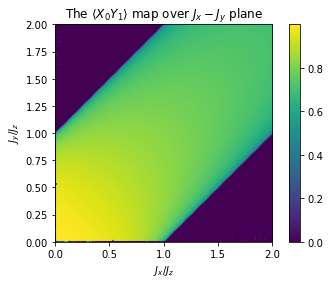

In [61]:
plt.imshow(XY, origin='lower', extent=[0, 2, 0, 2])
plt.colorbar()
plt.xlabel(r'$J_x/J_z$')
plt.ylabel(r'$J_y/J_z$')
plt.title(r'The $\langle X_0 Y_1 \rangle$ map over $J_x-J_y$ plane')
plt.show()

In [48]:
num = 0
for i in range(201):
    for j in range(201):
        if abs(XY[i,j])<1e-11:
            num+=1
num

4914

## String Order Parameters

In [13]:
X_str_half = np.zeros((201,201))
Z_str_half = np.zeros((201,201))
for J, psi in wf_dict.items():
    x, y, z = J
    i, j = (int(np.round(x*100)), int(np.round(y*100))) # the coordinate
#     print(i, j)

    x_str_param = (2**10)*np.abs(psi.expectation_value_term([('Sx', i) for i in range(1, 11)]))
    X_str_half[i, j] = x_str_param

    z_str_param = (2**10)*np.abs(psi.expectation_value_term([('Sz', i) for i in range(0, 10)]))
    Z_str_half[i, j] = z_str_param
    if i != j: # then symmetrize this value lol
        X_str_half[j, i] = x_str_param
        Z_str_half[j, i] = z_str_param

#     xy_param = np.abs(4*psi.expectation_value_term([('Sx', 0), ('Sy', 1)]))
#     XY[i, j] = xy_param
#     if i != j: # then symmetrize this value lol
#         XY[j, i] = xy_param

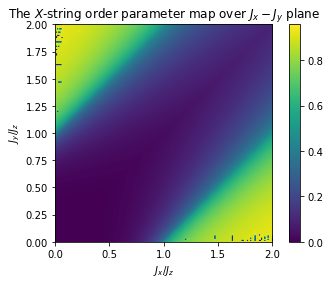

In [14]:
plt.imshow(X_str_half, origin='lower', extent=[0, 2, 0, 2])
plt.colorbar()
plt.xlabel(r'$J_x/J_z$')
plt.ylabel(r'$J_y/J_z$')
plt.title(r'The $X$-string order parameter map over $J_x-J_y$ plane')
plt.show()

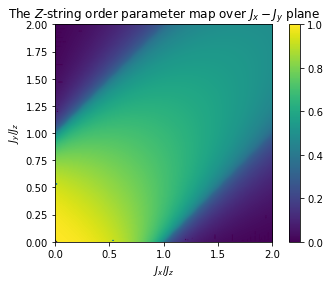

In [15]:
plt.imshow(Z_str_half, origin='lower', extent=[0, 2, 0, 2])
plt.colorbar()
plt.xlabel(r'$J_x/J_z$')
plt.ylabel(r'$J_y/J_z$')
plt.title(r'The $Z$-string order parameter map over $J_x-J_y$ plane')
plt.show()

## Rename all the filenames in `Spin1` folder

In [2]:
import os
import scanf
import numpy as np

L = 2
chi = 64
folder_prefix = 'Spin1_full_map_high_precision/'

In [3]:
### Already Done ###
# for file in os.listdir(folder_prefix):
#     print('The filename is: ',file)
#     print('Now read the params')
#     (chi, Jx, Jy, Jz, L) = scanf.scanf('KitaevLadder_chi_%d_Jx_%f_Jy_%f_Jz_%f_L_%d.h5', file)
#     Jx = np.round(Jx, 3)
#     Jy = np.round(Jy, 3)
#     Jz = np.round(Jz, 3)
#     os.rename(folder_prefix+file, folder_prefix+f'KitaevLadder_chi_{chi}_Jx_{Jx}_Jy_{Jy}_Jz_{Jz}_L_{L}.h5')
    

## Save the data

In [3]:
J_list = linspace(0, 2, 201)
X, Y= np.meshgrid(J_list, J_list)

In [4]:
wf_dict = {}
e_dict = {}
XY = np.zeros((201, 201))

In [6]:
### Stop using these codes since the 20k MPS will take huge amount of memories ###
#
# for i in range(201):
#     for j in range(201):
#         Jx = X[i, j]
#         Jy = Y[i, j]
#         Jz = 1.0
        
#         result = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)

#         if (result == -1):
#             print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
#             continue
#         else:
#             energy = result['energy']
#             psi = result['psi']
            
# #             print(f'psi takes {sys.getsizeof(psi)/1e6} MB')
            
#             e_dict[(Jx, Jy, Jz)] = energy
#             wf_dict[(Jx, Jy, Jz)] = psi.copy()

#         # initial_psi = psi.copy()


No such file for J = (0.09, 0.0, 1.0)
No such file for J = (0.1, 0.0, 1.0)
No such file for J = (0.11, 0.0, 1.0)
No such file for J = (0.12, 0.0, 1.0)
No such file for J = (0.13, 0.0, 1.0)
No such file for J = (0.14, 0.0, 1.0)
No such file for J = (0.15, 0.0, 1.0)
No such file for J = (0.16, 0.0, 1.0)
No such file for J = (0.17, 0.0, 1.0)
No such file for J = (0.18, 0.0, 1.0)
No such file for J = (0.19, 0.0, 1.0)
No such file for J = (0.2, 0.0, 1.0)
No such file for J = (0.21, 0.0, 1.0)
No such file for J = (0.22, 0.0, 1.0)
No such file for J = (0.23, 0.0, 1.0)
No such file for J = (0.24, 0.0, 1.0)
No such file for J = (0.25, 0.0, 1.0)
No such file for J = (0.26, 0.0, 1.0)
No such file for J = (0.27, 0.0, 1.0)
No such file for J = (0.28, 0.0, 1.0)
No such file for J = (0.29, 0.0, 1.0)
No such file for J = (0.3, 0.0, 1.0)
No such file for J = (0.31, 0.0, 1.0)
No such file for J = (0.32, 0.0, 1.0)
No such file for J = (0.33, 0.0, 1.0)
No such file for J = (0.34, 0.0, 1.0)
No such file fo

No such file for J = (0.0, 0.08, 1.0)
No such file for J = (0.01, 0.08, 1.0)
No such file for J = (0.02, 0.08, 1.0)
No such file for J = (0.03, 0.08, 1.0)
No such file for J = (0.04, 0.08, 1.0)
No such file for J = (0.05, 0.08, 1.0)
No such file for J = (0.06, 0.08, 1.0)
No such file for J = (0.07, 0.08, 1.0)
No such file for J = (0.0, 0.09, 1.0)
No such file for J = (0.01, 0.09, 1.0)
No such file for J = (0.02, 0.09, 1.0)
No such file for J = (0.03, 0.09, 1.0)
No such file for J = (0.04, 0.09, 1.0)
No such file for J = (0.05, 0.09, 1.0)
No such file for J = (0.06, 0.09, 1.0)
No such file for J = (0.07, 0.09, 1.0)
No such file for J = (0.08, 0.09, 1.0)
No such file for J = (0.0, 0.1, 1.0)
No such file for J = (0.01, 0.1, 1.0)
No such file for J = (0.02, 0.1, 1.0)
No such file for J = (0.03, 0.1, 1.0)
No such file for J = (0.04, 0.1, 1.0)
No such file for J = (0.05, 0.1, 1.0)
No such file for J = (0.06, 0.1, 1.0)
No such file for J = (0.07, 0.1, 1.0)
No such file for J = (0.08, 0.1, 1.0

No such file for J = (0.0, 0.23, 1.0)
No such file for J = (0.01, 0.23, 1.0)
No such file for J = (0.02, 0.23, 1.0)
No such file for J = (0.03, 0.23, 1.0)
No such file for J = (0.04, 0.23, 1.0)
No such file for J = (0.05, 0.23, 1.0)
No such file for J = (0.06, 0.23, 1.0)
No such file for J = (0.07, 0.23, 1.0)
No such file for J = (0.08, 0.23, 1.0)
No such file for J = (0.09, 0.23, 1.0)
No such file for J = (0.1, 0.23, 1.0)
No such file for J = (0.11, 0.23, 1.0)
No such file for J = (0.12, 0.23, 1.0)
No such file for J = (0.13, 0.23, 1.0)
No such file for J = (0.14, 0.23, 1.0)
No such file for J = (0.15, 0.23, 1.0)
No such file for J = (0.16, 0.23, 1.0)
No such file for J = (0.17, 0.23, 1.0)
No such file for J = (0.18, 0.23, 1.0)
No such file for J = (0.19, 0.23, 1.0)
No such file for J = (0.2, 0.23, 1.0)
No such file for J = (0.21, 0.23, 1.0)
No such file for J = (0.22, 0.23, 1.0)
No such file for J = (0.0, 0.24, 1.0)
No such file for J = (0.01, 0.24, 1.0)
No such file for J = (0.02, 0

No such file for J = (0.0, 0.31, 1.0)
No such file for J = (0.01, 0.31, 1.0)
No such file for J = (0.02, 0.31, 1.0)
No such file for J = (0.03, 0.31, 1.0)
No such file for J = (0.04, 0.31, 1.0)
No such file for J = (0.05, 0.31, 1.0)
No such file for J = (0.06, 0.31, 1.0)
No such file for J = (0.07, 0.31, 1.0)
No such file for J = (0.08, 0.31, 1.0)
No such file for J = (0.09, 0.31, 1.0)
No such file for J = (0.1, 0.31, 1.0)
No such file for J = (0.11, 0.31, 1.0)
No such file for J = (0.12, 0.31, 1.0)
No such file for J = (0.13, 0.31, 1.0)
No such file for J = (0.14, 0.31, 1.0)
No such file for J = (0.15, 0.31, 1.0)
No such file for J = (0.16, 0.31, 1.0)
No such file for J = (0.17, 0.31, 1.0)
No such file for J = (0.18, 0.31, 1.0)
No such file for J = (0.19, 0.31, 1.0)
No such file for J = (0.2, 0.31, 1.0)
No such file for J = (0.21, 0.31, 1.0)
No such file for J = (0.22, 0.31, 1.0)
No such file for J = (0.23, 0.31, 1.0)
No such file for J = (0.24, 0.31, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.38, 1.0)
No such file for J = (0.01, 0.38, 1.0)
No such file for J = (0.02, 0.38, 1.0)
No such file for J = (0.03, 0.38, 1.0)
No such file for J = (0.04, 0.38, 1.0)
No such file for J = (0.05, 0.38, 1.0)
No such file for J = (0.06, 0.38, 1.0)
No such file for J = (0.07, 0.38, 1.0)
No such file for J = (0.08, 0.38, 1.0)
No such file for J = (0.09, 0.38, 1.0)
No such file for J = (0.1, 0.38, 1.0)
No such file for J = (0.11, 0.38, 1.0)
No such file for J = (0.12, 0.38, 1.0)
No such file for J = (0.13, 0.38, 1.0)
No such file for J = (0.14, 0.38, 1.0)
No such file for J = (0.15, 0.38, 1.0)
No such file for J = (0.16, 0.38, 1.0)
No such file for J = (0.17, 0.38, 1.0)
No such file for J = (0.18, 0.38, 1.0)
No such file for J = (0.19, 0.38, 1.0)
No such file for J = (0.2, 0.38, 1.0)
No such file for J = (0.21, 0.38, 1.0)
No such file for J = (0.22, 0.38, 1.0)
No such file for J = (0.23, 0.38, 1.0)
No such file for J = (0.24, 0.38, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.44, 1.0)
No such file for J = (0.01, 0.44, 1.0)
No such file for J = (0.02, 0.44, 1.0)
No such file for J = (0.03, 0.44, 1.0)
No such file for J = (0.04, 0.44, 1.0)
No such file for J = (0.05, 0.44, 1.0)
No such file for J = (0.06, 0.44, 1.0)
No such file for J = (0.07, 0.44, 1.0)
No such file for J = (0.08, 0.44, 1.0)
No such file for J = (0.09, 0.44, 1.0)
No such file for J = (0.1, 0.44, 1.0)
No such file for J = (0.11, 0.44, 1.0)
No such file for J = (0.12, 0.44, 1.0)
No such file for J = (0.13, 0.44, 1.0)
No such file for J = (0.14, 0.44, 1.0)
No such file for J = (0.15, 0.44, 1.0)
No such file for J = (0.16, 0.44, 1.0)
No such file for J = (0.17, 0.44, 1.0)
No such file for J = (0.18, 0.44, 1.0)
No such file for J = (0.19, 0.44, 1.0)
No such file for J = (0.2, 0.44, 1.0)
No such file for J = (0.21, 0.44, 1.0)
No such file for J = (0.22, 0.44, 1.0)
No such file for J = (0.23, 0.44, 1.0)
No such file for J = (0.24, 0.44, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.49, 1.0)
No such file for J = (0.01, 0.49, 1.0)
No such file for J = (0.02, 0.49, 1.0)
No such file for J = (0.03, 0.49, 1.0)
No such file for J = (0.04, 0.49, 1.0)
No such file for J = (0.05, 0.49, 1.0)
No such file for J = (0.06, 0.49, 1.0)
No such file for J = (0.07, 0.49, 1.0)
No such file for J = (0.08, 0.49, 1.0)
No such file for J = (0.09, 0.49, 1.0)
No such file for J = (0.1, 0.49, 1.0)
No such file for J = (0.11, 0.49, 1.0)
No such file for J = (0.12, 0.49, 1.0)
No such file for J = (0.13, 0.49, 1.0)
No such file for J = (0.14, 0.49, 1.0)
No such file for J = (0.15, 0.49, 1.0)
No such file for J = (0.16, 0.49, 1.0)
No such file for J = (0.17, 0.49, 1.0)
No such file for J = (0.18, 0.49, 1.0)
No such file for J = (0.19, 0.49, 1.0)
No such file for J = (0.2, 0.49, 1.0)
No such file for J = (0.21, 0.49, 1.0)
No such file for J = (0.22, 0.49, 1.0)
No such file for J = (0.23, 0.49, 1.0)
No such file for J = (0.24, 0.49, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.54, 1.0)
No such file for J = (0.01, 0.54, 1.0)
No such file for J = (0.02, 0.54, 1.0)
No such file for J = (0.03, 0.54, 1.0)
No such file for J = (0.04, 0.54, 1.0)
No such file for J = (0.05, 0.54, 1.0)
No such file for J = (0.06, 0.54, 1.0)
No such file for J = (0.07, 0.54, 1.0)
No such file for J = (0.08, 0.54, 1.0)
No such file for J = (0.09, 0.54, 1.0)
No such file for J = (0.1, 0.54, 1.0)
No such file for J = (0.11, 0.54, 1.0)
No such file for J = (0.12, 0.54, 1.0)
No such file for J = (0.13, 0.54, 1.0)
No such file for J = (0.14, 0.54, 1.0)
No such file for J = (0.15, 0.54, 1.0)
No such file for J = (0.16, 0.54, 1.0)
No such file for J = (0.17, 0.54, 1.0)
No such file for J = (0.18, 0.54, 1.0)
No such file for J = (0.19, 0.54, 1.0)
No such file for J = (0.2, 0.54, 1.0)
No such file for J = (0.21, 0.54, 1.0)
No such file for J = (0.22, 0.54, 1.0)
No such file for J = (0.23, 0.54, 1.0)
No such file for J = (0.24, 0.54, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.58, 1.0)
No such file for J = (0.01, 0.58, 1.0)
No such file for J = (0.02, 0.58, 1.0)
No such file for J = (0.03, 0.58, 1.0)
No such file for J = (0.04, 0.58, 1.0)
No such file for J = (0.05, 0.58, 1.0)
No such file for J = (0.06, 0.58, 1.0)
No such file for J = (0.07, 0.58, 1.0)
No such file for J = (0.08, 0.58, 1.0)
No such file for J = (0.09, 0.58, 1.0)
No such file for J = (0.1, 0.58, 1.0)
No such file for J = (0.11, 0.58, 1.0)
No such file for J = (0.12, 0.58, 1.0)
No such file for J = (0.13, 0.58, 1.0)
No such file for J = (0.14, 0.58, 1.0)
No such file for J = (0.15, 0.58, 1.0)
No such file for J = (0.16, 0.58, 1.0)
No such file for J = (0.17, 0.58, 1.0)
No such file for J = (0.18, 0.58, 1.0)
No such file for J = (0.19, 0.58, 1.0)
No such file for J = (0.2, 0.58, 1.0)
No such file for J = (0.21, 0.58, 1.0)
No such file for J = (0.22, 0.58, 1.0)
No such file for J = (0.23, 0.58, 1.0)
No such file for J = (0.24, 0.58, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.62, 1.0)
No such file for J = (0.01, 0.62, 1.0)
No such file for J = (0.02, 0.62, 1.0)
No such file for J = (0.03, 0.62, 1.0)
No such file for J = (0.04, 0.62, 1.0)
No such file for J = (0.05, 0.62, 1.0)
No such file for J = (0.06, 0.62, 1.0)
No such file for J = (0.07, 0.62, 1.0)
No such file for J = (0.08, 0.62, 1.0)
No such file for J = (0.09, 0.62, 1.0)
No such file for J = (0.1, 0.62, 1.0)
No such file for J = (0.11, 0.62, 1.0)
No such file for J = (0.12, 0.62, 1.0)
No such file for J = (0.13, 0.62, 1.0)
No such file for J = (0.14, 0.62, 1.0)
No such file for J = (0.15, 0.62, 1.0)
No such file for J = (0.16, 0.62, 1.0)
No such file for J = (0.17, 0.62, 1.0)
No such file for J = (0.18, 0.62, 1.0)
No such file for J = (0.19, 0.62, 1.0)
No such file for J = (0.2, 0.62, 1.0)
No such file for J = (0.21, 0.62, 1.0)
No such file for J = (0.22, 0.62, 1.0)
No such file for J = (0.23, 0.62, 1.0)
No such file for J = (0.24, 0.62, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.66, 1.0)
No such file for J = (0.01, 0.66, 1.0)
No such file for J = (0.02, 0.66, 1.0)
No such file for J = (0.03, 0.66, 1.0)
No such file for J = (0.04, 0.66, 1.0)
No such file for J = (0.05, 0.66, 1.0)
No such file for J = (0.06, 0.66, 1.0)
No such file for J = (0.07, 0.66, 1.0)
No such file for J = (0.08, 0.66, 1.0)
No such file for J = (0.09, 0.66, 1.0)
No such file for J = (0.1, 0.66, 1.0)
No such file for J = (0.11, 0.66, 1.0)
No such file for J = (0.12, 0.66, 1.0)
No such file for J = (0.13, 0.66, 1.0)
No such file for J = (0.14, 0.66, 1.0)
No such file for J = (0.15, 0.66, 1.0)
No such file for J = (0.16, 0.66, 1.0)
No such file for J = (0.17, 0.66, 1.0)
No such file for J = (0.18, 0.66, 1.0)
No such file for J = (0.19, 0.66, 1.0)
No such file for J = (0.2, 0.66, 1.0)
No such file for J = (0.21, 0.66, 1.0)
No such file for J = (0.22, 0.66, 1.0)
No such file for J = (0.23, 0.66, 1.0)
No such file for J = (0.24, 0.66, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.7, 1.0)
No such file for J = (0.01, 0.7, 1.0)
No such file for J = (0.02, 0.7, 1.0)
No such file for J = (0.03, 0.7, 1.0)
No such file for J = (0.04, 0.7, 1.0)
No such file for J = (0.05, 0.7, 1.0)
No such file for J = (0.06, 0.7, 1.0)
No such file for J = (0.07, 0.7, 1.0)
No such file for J = (0.08, 0.7, 1.0)
No such file for J = (0.09, 0.7, 1.0)
No such file for J = (0.1, 0.7, 1.0)
No such file for J = (0.11, 0.7, 1.0)
No such file for J = (0.12, 0.7, 1.0)
No such file for J = (0.13, 0.7, 1.0)
No such file for J = (0.14, 0.7, 1.0)
No such file for J = (0.15, 0.7, 1.0)
No such file for J = (0.16, 0.7, 1.0)
No such file for J = (0.17, 0.7, 1.0)
No such file for J = (0.18, 0.7, 1.0)
No such file for J = (0.19, 0.7, 1.0)
No such file for J = (0.2, 0.7, 1.0)
No such file for J = (0.21, 0.7, 1.0)
No such file for J = (0.22, 0.7, 1.0)
No such file for J = (0.23, 0.7, 1.0)
No such file for J = (0.24, 0.7, 1.0)
No such file for J = (0.25, 0.7, 1.0)
No such file fo

No such file for J = (0.0, 0.73, 1.0)
No such file for J = (0.01, 0.73, 1.0)
No such file for J = (0.02, 0.73, 1.0)
No such file for J = (0.03, 0.73, 1.0)
No such file for J = (0.04, 0.73, 1.0)
No such file for J = (0.05, 0.73, 1.0)
No such file for J = (0.06, 0.73, 1.0)
No such file for J = (0.07, 0.73, 1.0)
No such file for J = (0.08, 0.73, 1.0)
No such file for J = (0.09, 0.73, 1.0)
No such file for J = (0.1, 0.73, 1.0)
No such file for J = (0.11, 0.73, 1.0)
No such file for J = (0.12, 0.73, 1.0)
No such file for J = (0.13, 0.73, 1.0)
No such file for J = (0.14, 0.73, 1.0)
No such file for J = (0.15, 0.73, 1.0)
No such file for J = (0.16, 0.73, 1.0)
No such file for J = (0.17, 0.73, 1.0)
No such file for J = (0.18, 0.73, 1.0)
No such file for J = (0.19, 0.73, 1.0)
No such file for J = (0.2, 0.73, 1.0)
No such file for J = (0.21, 0.73, 1.0)
No such file for J = (0.22, 0.73, 1.0)
No such file for J = (0.23, 0.73, 1.0)
No such file for J = (0.24, 0.73, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.76, 1.0)
No such file for J = (0.01, 0.76, 1.0)
No such file for J = (0.02, 0.76, 1.0)
No such file for J = (0.03, 0.76, 1.0)
No such file for J = (0.04, 0.76, 1.0)
No such file for J = (0.05, 0.76, 1.0)
No such file for J = (0.06, 0.76, 1.0)
No such file for J = (0.07, 0.76, 1.0)
No such file for J = (0.08, 0.76, 1.0)
No such file for J = (0.09, 0.76, 1.0)
No such file for J = (0.1, 0.76, 1.0)
No such file for J = (0.11, 0.76, 1.0)
No such file for J = (0.12, 0.76, 1.0)
No such file for J = (0.13, 0.76, 1.0)
No such file for J = (0.14, 0.76, 1.0)
No such file for J = (0.15, 0.76, 1.0)
No such file for J = (0.16, 0.76, 1.0)
No such file for J = (0.17, 0.76, 1.0)
No such file for J = (0.18, 0.76, 1.0)
No such file for J = (0.19, 0.76, 1.0)
No such file for J = (0.2, 0.76, 1.0)
No such file for J = (0.21, 0.76, 1.0)
No such file for J = (0.22, 0.76, 1.0)
No such file for J = (0.23, 0.76, 1.0)
No such file for J = (0.24, 0.76, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.79, 1.0)
No such file for J = (0.01, 0.79, 1.0)
No such file for J = (0.02, 0.79, 1.0)
No such file for J = (0.03, 0.79, 1.0)
No such file for J = (0.04, 0.79, 1.0)
No such file for J = (0.05, 0.79, 1.0)
No such file for J = (0.06, 0.79, 1.0)
No such file for J = (0.07, 0.79, 1.0)
No such file for J = (0.08, 0.79, 1.0)
No such file for J = (0.09, 0.79, 1.0)
No such file for J = (0.1, 0.79, 1.0)
No such file for J = (0.11, 0.79, 1.0)
No such file for J = (0.12, 0.79, 1.0)
No such file for J = (0.13, 0.79, 1.0)
No such file for J = (0.14, 0.79, 1.0)
No such file for J = (0.15, 0.79, 1.0)
No such file for J = (0.16, 0.79, 1.0)
No such file for J = (0.17, 0.79, 1.0)
No such file for J = (0.18, 0.79, 1.0)
No such file for J = (0.19, 0.79, 1.0)
No such file for J = (0.2, 0.79, 1.0)
No such file for J = (0.21, 0.79, 1.0)
No such file for J = (0.22, 0.79, 1.0)
No such file for J = (0.23, 0.79, 1.0)
No such file for J = (0.24, 0.79, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.82, 1.0)
No such file for J = (0.01, 0.82, 1.0)
No such file for J = (0.02, 0.82, 1.0)
No such file for J = (0.03, 0.82, 1.0)
No such file for J = (0.04, 0.82, 1.0)
No such file for J = (0.05, 0.82, 1.0)
No such file for J = (0.06, 0.82, 1.0)
No such file for J = (0.07, 0.82, 1.0)
No such file for J = (0.08, 0.82, 1.0)
No such file for J = (0.09, 0.82, 1.0)
No such file for J = (0.1, 0.82, 1.0)
No such file for J = (0.11, 0.82, 1.0)
No such file for J = (0.12, 0.82, 1.0)
No such file for J = (0.13, 0.82, 1.0)
No such file for J = (0.14, 0.82, 1.0)
No such file for J = (0.15, 0.82, 1.0)
No such file for J = (0.16, 0.82, 1.0)
No such file for J = (0.17, 0.82, 1.0)
No such file for J = (0.18, 0.82, 1.0)
No such file for J = (0.19, 0.82, 1.0)
No such file for J = (0.2, 0.82, 1.0)
No such file for J = (0.21, 0.82, 1.0)
No such file for J = (0.22, 0.82, 1.0)
No such file for J = (0.23, 0.82, 1.0)
No such file for J = (0.24, 0.82, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.85, 1.0)
No such file for J = (0.01, 0.85, 1.0)
No such file for J = (0.02, 0.85, 1.0)
No such file for J = (0.03, 0.85, 1.0)
No such file for J = (0.04, 0.85, 1.0)
No such file for J = (0.05, 0.85, 1.0)
No such file for J = (0.06, 0.85, 1.0)
No such file for J = (0.07, 0.85, 1.0)
No such file for J = (0.08, 0.85, 1.0)
No such file for J = (0.09, 0.85, 1.0)
No such file for J = (0.1, 0.85, 1.0)
No such file for J = (0.11, 0.85, 1.0)
No such file for J = (0.12, 0.85, 1.0)
No such file for J = (0.13, 0.85, 1.0)
No such file for J = (0.14, 0.85, 1.0)
No such file for J = (0.15, 0.85, 1.0)
No such file for J = (0.16, 0.85, 1.0)
No such file for J = (0.17, 0.85, 1.0)
No such file for J = (0.18, 0.85, 1.0)
No such file for J = (0.19, 0.85, 1.0)
No such file for J = (0.2, 0.85, 1.0)
No such file for J = (0.21, 0.85, 1.0)
No such file for J = (0.22, 0.85, 1.0)
No such file for J = (0.23, 0.85, 1.0)
No such file for J = (0.24, 0.85, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.88, 1.0)
No such file for J = (0.01, 0.88, 1.0)
No such file for J = (0.02, 0.88, 1.0)
No such file for J = (0.03, 0.88, 1.0)
No such file for J = (0.04, 0.88, 1.0)
No such file for J = (0.05, 0.88, 1.0)
No such file for J = (0.06, 0.88, 1.0)
No such file for J = (0.07, 0.88, 1.0)
No such file for J = (0.08, 0.88, 1.0)
No such file for J = (0.09, 0.88, 1.0)
No such file for J = (0.1, 0.88, 1.0)
No such file for J = (0.11, 0.88, 1.0)
No such file for J = (0.12, 0.88, 1.0)
No such file for J = (0.13, 0.88, 1.0)
No such file for J = (0.14, 0.88, 1.0)
No such file for J = (0.15, 0.88, 1.0)
No such file for J = (0.16, 0.88, 1.0)
No such file for J = (0.17, 0.88, 1.0)
No such file for J = (0.18, 0.88, 1.0)
No such file for J = (0.19, 0.88, 1.0)
No such file for J = (0.2, 0.88, 1.0)
No such file for J = (0.21, 0.88, 1.0)
No such file for J = (0.22, 0.88, 1.0)
No such file for J = (0.23, 0.88, 1.0)
No such file for J = (0.24, 0.88, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.91, 1.0)
No such file for J = (0.01, 0.91, 1.0)
No such file for J = (0.02, 0.91, 1.0)
No such file for J = (0.03, 0.91, 1.0)
No such file for J = (0.04, 0.91, 1.0)
No such file for J = (0.05, 0.91, 1.0)
No such file for J = (0.06, 0.91, 1.0)
No such file for J = (0.07, 0.91, 1.0)
No such file for J = (0.08, 0.91, 1.0)
No such file for J = (0.09, 0.91, 1.0)
No such file for J = (0.1, 0.91, 1.0)
No such file for J = (0.11, 0.91, 1.0)
No such file for J = (0.12, 0.91, 1.0)
No such file for J = (0.13, 0.91, 1.0)
No such file for J = (0.14, 0.91, 1.0)
No such file for J = (0.15, 0.91, 1.0)
No such file for J = (0.16, 0.91, 1.0)
No such file for J = (0.17, 0.91, 1.0)
No such file for J = (0.18, 0.91, 1.0)
No such file for J = (0.19, 0.91, 1.0)
No such file for J = (0.2, 0.91, 1.0)
No such file for J = (0.21, 0.91, 1.0)
No such file for J = (0.22, 0.91, 1.0)
No such file for J = (0.23, 0.91, 1.0)
No such file for J = (0.24, 0.91, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.94, 1.0)
No such file for J = (0.01, 0.94, 1.0)
No such file for J = (0.02, 0.94, 1.0)
No such file for J = (0.03, 0.94, 1.0)
No such file for J = (0.04, 0.94, 1.0)
No such file for J = (0.05, 0.94, 1.0)
No such file for J = (0.06, 0.94, 1.0)
No such file for J = (0.07, 0.94, 1.0)
No such file for J = (0.08, 0.94, 1.0)
No such file for J = (0.09, 0.94, 1.0)
No such file for J = (0.1, 0.94, 1.0)
No such file for J = (0.11, 0.94, 1.0)
No such file for J = (0.12, 0.94, 1.0)
No such file for J = (0.13, 0.94, 1.0)
No such file for J = (0.14, 0.94, 1.0)
No such file for J = (0.15, 0.94, 1.0)
No such file for J = (0.16, 0.94, 1.0)
No such file for J = (0.17, 0.94, 1.0)
No such file for J = (0.18, 0.94, 1.0)
No such file for J = (0.19, 0.94, 1.0)
No such file for J = (0.2, 0.94, 1.0)
No such file for J = (0.21, 0.94, 1.0)
No such file for J = (0.22, 0.94, 1.0)
No such file for J = (0.23, 0.94, 1.0)
No such file for J = (0.24, 0.94, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 0.97, 1.0)
No such file for J = (0.01, 0.97, 1.0)
No such file for J = (0.02, 0.97, 1.0)
No such file for J = (0.03, 0.97, 1.0)
No such file for J = (0.04, 0.97, 1.0)
No such file for J = (0.05, 0.97, 1.0)
No such file for J = (0.06, 0.97, 1.0)
No such file for J = (0.07, 0.97, 1.0)
No such file for J = (0.08, 0.97, 1.0)
No such file for J = (0.09, 0.97, 1.0)
No such file for J = (0.1, 0.97, 1.0)
No such file for J = (0.11, 0.97, 1.0)
No such file for J = (0.12, 0.97, 1.0)
No such file for J = (0.13, 0.97, 1.0)
No such file for J = (0.14, 0.97, 1.0)
No such file for J = (0.15, 0.97, 1.0)
No such file for J = (0.16, 0.97, 1.0)
No such file for J = (0.17, 0.97, 1.0)
No such file for J = (0.18, 0.97, 1.0)
No such file for J = (0.19, 0.97, 1.0)
No such file for J = (0.2, 0.97, 1.0)
No such file for J = (0.21, 0.97, 1.0)
No such file for J = (0.22, 0.97, 1.0)
No such file for J = (0.23, 0.97, 1.0)
No such file for J = (0.24, 0.97, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.0, 1.0)
No such file for J = (0.01, 1.0, 1.0)
No such file for J = (0.02, 1.0, 1.0)
No such file for J = (0.03, 1.0, 1.0)
No such file for J = (0.04, 1.0, 1.0)
No such file for J = (0.05, 1.0, 1.0)
No such file for J = (0.06, 1.0, 1.0)
No such file for J = (0.07, 1.0, 1.0)
No such file for J = (0.08, 1.0, 1.0)
No such file for J = (0.09, 1.0, 1.0)
No such file for J = (0.1, 1.0, 1.0)
No such file for J = (0.11, 1.0, 1.0)
No such file for J = (0.12, 1.0, 1.0)
No such file for J = (0.13, 1.0, 1.0)
No such file for J = (0.14, 1.0, 1.0)
No such file for J = (0.15, 1.0, 1.0)
No such file for J = (0.16, 1.0, 1.0)
No such file for J = (0.17, 1.0, 1.0)
No such file for J = (0.18, 1.0, 1.0)
No such file for J = (0.19, 1.0, 1.0)
No such file for J = (0.2, 1.0, 1.0)
No such file for J = (0.21, 1.0, 1.0)
No such file for J = (0.22, 1.0, 1.0)
No such file for J = (0.23, 1.0, 1.0)
No such file for J = (0.24, 1.0, 1.0)
No such file for J = (0.25, 1.0, 1.0)
No such file fo

No such file for J = (0.0, 1.03, 1.0)
No such file for J = (0.01, 1.03, 1.0)
No such file for J = (0.02, 1.03, 1.0)
No such file for J = (0.03, 1.03, 1.0)
No such file for J = (0.04, 1.03, 1.0)
No such file for J = (0.05, 1.03, 1.0)
No such file for J = (0.06, 1.03, 1.0)
No such file for J = (0.07, 1.03, 1.0)
No such file for J = (0.08, 1.03, 1.0)
No such file for J = (0.09, 1.03, 1.0)
No such file for J = (0.1, 1.03, 1.0)
No such file for J = (0.11, 1.03, 1.0)
No such file for J = (0.12, 1.03, 1.0)
No such file for J = (0.13, 1.03, 1.0)
No such file for J = (0.14, 1.03, 1.0)
No such file for J = (0.15, 1.03, 1.0)
No such file for J = (0.16, 1.03, 1.0)
No such file for J = (0.17, 1.03, 1.0)
No such file for J = (0.18, 1.03, 1.0)
No such file for J = (0.19, 1.03, 1.0)
No such file for J = (0.2, 1.03, 1.0)
No such file for J = (0.21, 1.03, 1.0)
No such file for J = (0.22, 1.03, 1.0)
No such file for J = (0.23, 1.03, 1.0)
No such file for J = (0.24, 1.03, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.06, 1.0)
No such file for J = (0.01, 1.06, 1.0)
No such file for J = (0.02, 1.06, 1.0)
No such file for J = (0.03, 1.06, 1.0)
No such file for J = (0.04, 1.06, 1.0)
No such file for J = (0.05, 1.06, 1.0)
No such file for J = (0.06, 1.06, 1.0)
No such file for J = (0.07, 1.06, 1.0)
No such file for J = (0.08, 1.06, 1.0)
No such file for J = (0.09, 1.06, 1.0)
No such file for J = (0.1, 1.06, 1.0)
No such file for J = (0.11, 1.06, 1.0)
No such file for J = (0.12, 1.06, 1.0)
No such file for J = (0.13, 1.06, 1.0)
No such file for J = (0.14, 1.06, 1.0)
No such file for J = (0.15, 1.06, 1.0)
No such file for J = (0.16, 1.06, 1.0)
No such file for J = (0.17, 1.06, 1.0)
No such file for J = (0.18, 1.06, 1.0)
No such file for J = (0.19, 1.06, 1.0)
No such file for J = (0.2, 1.06, 1.0)
No such file for J = (0.21, 1.06, 1.0)
No such file for J = (0.22, 1.06, 1.0)
No such file for J = (0.23, 1.06, 1.0)
No such file for J = (0.24, 1.06, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.08, 1.0)
No such file for J = (0.01, 1.08, 1.0)
No such file for J = (0.02, 1.08, 1.0)
No such file for J = (0.03, 1.08, 1.0)
No such file for J = (0.04, 1.08, 1.0)
No such file for J = (0.05, 1.08, 1.0)
No such file for J = (0.06, 1.08, 1.0)
No such file for J = (0.07, 1.08, 1.0)
No such file for J = (0.08, 1.08, 1.0)
No such file for J = (0.09, 1.08, 1.0)
No such file for J = (0.1, 1.08, 1.0)
No such file for J = (0.11, 1.08, 1.0)
No such file for J = (0.12, 1.08, 1.0)
No such file for J = (0.13, 1.08, 1.0)
No such file for J = (0.14, 1.08, 1.0)
No such file for J = (0.15, 1.08, 1.0)
No such file for J = (0.16, 1.08, 1.0)
No such file for J = (0.17, 1.08, 1.0)
No such file for J = (0.18, 1.08, 1.0)
No such file for J = (0.19, 1.08, 1.0)
No such file for J = (0.2, 1.08, 1.0)
No such file for J = (0.21, 1.08, 1.0)
No such file for J = (0.22, 1.08, 1.0)
No such file for J = (0.23, 1.08, 1.0)
No such file for J = (0.24, 1.08, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.1, 1.0)
No such file for J = (0.01, 1.1, 1.0)
No such file for J = (0.02, 1.1, 1.0)
No such file for J = (0.03, 1.1, 1.0)
No such file for J = (0.04, 1.1, 1.0)
No such file for J = (0.05, 1.1, 1.0)
No such file for J = (0.06, 1.1, 1.0)
No such file for J = (0.07, 1.1, 1.0)
No such file for J = (0.08, 1.1, 1.0)
No such file for J = (0.09, 1.1, 1.0)
No such file for J = (0.1, 1.1, 1.0)
No such file for J = (0.11, 1.1, 1.0)
No such file for J = (0.12, 1.1, 1.0)
No such file for J = (0.13, 1.1, 1.0)
No such file for J = (0.14, 1.1, 1.0)
No such file for J = (0.15, 1.1, 1.0)
No such file for J = (0.16, 1.1, 1.0)
No such file for J = (0.17, 1.1, 1.0)
No such file for J = (0.18, 1.1, 1.0)
No such file for J = (0.19, 1.1, 1.0)
No such file for J = (0.2, 1.1, 1.0)
No such file for J = (0.21, 1.1, 1.0)
No such file for J = (0.22, 1.1, 1.0)
No such file for J = (0.23, 1.1, 1.0)
No such file for J = (0.24, 1.1, 1.0)
No such file for J = (0.25, 1.1, 1.0)
No such file fo

No such file for J = (0.0, 1.12, 1.0)
No such file for J = (0.01, 1.12, 1.0)
No such file for J = (0.02, 1.12, 1.0)
No such file for J = (0.03, 1.12, 1.0)
No such file for J = (0.04, 1.12, 1.0)
No such file for J = (0.05, 1.12, 1.0)
No such file for J = (0.06, 1.12, 1.0)
No such file for J = (0.07, 1.12, 1.0)
No such file for J = (0.08, 1.12, 1.0)
No such file for J = (0.09, 1.12, 1.0)
No such file for J = (0.1, 1.12, 1.0)
No such file for J = (0.11, 1.12, 1.0)
No such file for J = (0.12, 1.12, 1.0)
No such file for J = (0.13, 1.12, 1.0)
No such file for J = (0.14, 1.12, 1.0)
No such file for J = (0.15, 1.12, 1.0)
No such file for J = (0.16, 1.12, 1.0)
No such file for J = (0.17, 1.12, 1.0)
No such file for J = (0.18, 1.12, 1.0)
No such file for J = (0.19, 1.12, 1.0)
No such file for J = (0.2, 1.12, 1.0)
No such file for J = (0.21, 1.12, 1.0)
No such file for J = (0.22, 1.12, 1.0)
No such file for J = (0.23, 1.12, 1.0)
No such file for J = (0.24, 1.12, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.14, 1.0)
No such file for J = (0.01, 1.14, 1.0)
No such file for J = (0.02, 1.14, 1.0)
No such file for J = (0.03, 1.14, 1.0)
No such file for J = (0.04, 1.14, 1.0)
No such file for J = (0.05, 1.14, 1.0)
No such file for J = (0.06, 1.14, 1.0)
No such file for J = (0.07, 1.14, 1.0)
No such file for J = (0.08, 1.14, 1.0)
No such file for J = (0.09, 1.14, 1.0)
No such file for J = (0.1, 1.14, 1.0)
No such file for J = (0.11, 1.14, 1.0)
No such file for J = (0.12, 1.14, 1.0)
No such file for J = (0.13, 1.14, 1.0)
No such file for J = (0.14, 1.14, 1.0)
No such file for J = (0.15, 1.14, 1.0)
No such file for J = (0.16, 1.14, 1.0)
No such file for J = (0.17, 1.14, 1.0)
No such file for J = (0.18, 1.14, 1.0)
No such file for J = (0.19, 1.14, 1.0)
No such file for J = (0.2, 1.14, 1.0)
No such file for J = (0.21, 1.14, 1.0)
No such file for J = (0.22, 1.14, 1.0)
No such file for J = (0.23, 1.14, 1.0)
No such file for J = (0.24, 1.14, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.16, 1.0)
No such file for J = (0.01, 1.16, 1.0)
No such file for J = (0.02, 1.16, 1.0)
No such file for J = (0.03, 1.16, 1.0)
No such file for J = (0.04, 1.16, 1.0)
No such file for J = (0.05, 1.16, 1.0)
No such file for J = (0.06, 1.16, 1.0)
No such file for J = (0.07, 1.16, 1.0)
No such file for J = (0.08, 1.16, 1.0)
No such file for J = (0.09, 1.16, 1.0)
No such file for J = (0.1, 1.16, 1.0)
No such file for J = (0.11, 1.16, 1.0)
No such file for J = (0.12, 1.16, 1.0)
No such file for J = (0.13, 1.16, 1.0)
No such file for J = (0.14, 1.16, 1.0)
No such file for J = (0.15, 1.16, 1.0)
No such file for J = (0.16, 1.16, 1.0)
No such file for J = (0.17, 1.16, 1.0)
No such file for J = (0.18, 1.16, 1.0)
No such file for J = (0.19, 1.16, 1.0)
No such file for J = (0.2, 1.16, 1.0)
No such file for J = (0.21, 1.16, 1.0)
No such file for J = (0.22, 1.16, 1.0)
No such file for J = (0.23, 1.16, 1.0)
No such file for J = (0.24, 1.16, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.18, 1.0)
No such file for J = (0.01, 1.18, 1.0)
No such file for J = (0.02, 1.18, 1.0)
No such file for J = (0.03, 1.18, 1.0)
No such file for J = (0.04, 1.18, 1.0)
No such file for J = (0.05, 1.18, 1.0)
No such file for J = (0.06, 1.18, 1.0)
No such file for J = (0.07, 1.18, 1.0)
No such file for J = (0.08, 1.18, 1.0)
No such file for J = (0.09, 1.18, 1.0)
No such file for J = (0.1, 1.18, 1.0)
No such file for J = (0.11, 1.18, 1.0)
No such file for J = (0.12, 1.18, 1.0)
No such file for J = (0.13, 1.18, 1.0)
No such file for J = (0.14, 1.18, 1.0)
No such file for J = (0.15, 1.18, 1.0)
No such file for J = (0.16, 1.18, 1.0)
No such file for J = (0.17, 1.18, 1.0)
No such file for J = (0.18, 1.18, 1.0)
No such file for J = (0.19, 1.18, 1.0)
No such file for J = (0.2, 1.18, 1.0)
No such file for J = (0.21, 1.18, 1.0)
No such file for J = (0.22, 1.18, 1.0)
No such file for J = (0.23, 1.18, 1.0)
No such file for J = (0.24, 1.18, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.2, 1.0)
No such file for J = (0.01, 1.2, 1.0)
No such file for J = (0.02, 1.2, 1.0)
No such file for J = (0.03, 1.2, 1.0)
No such file for J = (0.04, 1.2, 1.0)
No such file for J = (0.05, 1.2, 1.0)
No such file for J = (0.06, 1.2, 1.0)
No such file for J = (0.07, 1.2, 1.0)
No such file for J = (0.08, 1.2, 1.0)
No such file for J = (0.09, 1.2, 1.0)
No such file for J = (0.1, 1.2, 1.0)
No such file for J = (0.11, 1.2, 1.0)
No such file for J = (0.12, 1.2, 1.0)
No such file for J = (0.13, 1.2, 1.0)
No such file for J = (0.14, 1.2, 1.0)
No such file for J = (0.15, 1.2, 1.0)
No such file for J = (0.16, 1.2, 1.0)
No such file for J = (0.17, 1.2, 1.0)
No such file for J = (0.18, 1.2, 1.0)
No such file for J = (0.19, 1.2, 1.0)
No such file for J = (0.2, 1.2, 1.0)
No such file for J = (0.21, 1.2, 1.0)
No such file for J = (0.22, 1.2, 1.0)
No such file for J = (0.23, 1.2, 1.0)
No such file for J = (0.24, 1.2, 1.0)
No such file for J = (0.25, 1.2, 1.0)
No such file fo

No such file for J = (0.0, 1.22, 1.0)
No such file for J = (0.01, 1.22, 1.0)
No such file for J = (0.02, 1.22, 1.0)
No such file for J = (0.03, 1.22, 1.0)
No such file for J = (0.04, 1.22, 1.0)
No such file for J = (0.05, 1.22, 1.0)
No such file for J = (0.06, 1.22, 1.0)
No such file for J = (0.07, 1.22, 1.0)
No such file for J = (0.08, 1.22, 1.0)
No such file for J = (0.09, 1.22, 1.0)
No such file for J = (0.1, 1.22, 1.0)
No such file for J = (0.11, 1.22, 1.0)
No such file for J = (0.12, 1.22, 1.0)
No such file for J = (0.13, 1.22, 1.0)
No such file for J = (0.14, 1.22, 1.0)
No such file for J = (0.15, 1.22, 1.0)
No such file for J = (0.16, 1.22, 1.0)
No such file for J = (0.17, 1.22, 1.0)
No such file for J = (0.18, 1.22, 1.0)
No such file for J = (0.19, 1.22, 1.0)
No such file for J = (0.2, 1.22, 1.0)
No such file for J = (0.21, 1.22, 1.0)
No such file for J = (0.22, 1.22, 1.0)
No such file for J = (0.23, 1.22, 1.0)
No such file for J = (0.24, 1.22, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.24, 1.0)
No such file for J = (0.01, 1.24, 1.0)
No such file for J = (0.02, 1.24, 1.0)
No such file for J = (0.03, 1.24, 1.0)
No such file for J = (0.04, 1.24, 1.0)
No such file for J = (0.05, 1.24, 1.0)
No such file for J = (0.06, 1.24, 1.0)
No such file for J = (0.07, 1.24, 1.0)
No such file for J = (0.08, 1.24, 1.0)
No such file for J = (0.09, 1.24, 1.0)
No such file for J = (0.1, 1.24, 1.0)
No such file for J = (0.11, 1.24, 1.0)
No such file for J = (0.12, 1.24, 1.0)
No such file for J = (0.13, 1.24, 1.0)
No such file for J = (0.14, 1.24, 1.0)
No such file for J = (0.15, 1.24, 1.0)
No such file for J = (0.16, 1.24, 1.0)
No such file for J = (0.17, 1.24, 1.0)
No such file for J = (0.18, 1.24, 1.0)
No such file for J = (0.19, 1.24, 1.0)
No such file for J = (0.2, 1.24, 1.0)
No such file for J = (0.21, 1.24, 1.0)
No such file for J = (0.22, 1.24, 1.0)
No such file for J = (0.23, 1.24, 1.0)
No such file for J = (0.24, 1.24, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.26, 1.0)
No such file for J = (0.01, 1.26, 1.0)
No such file for J = (0.02, 1.26, 1.0)
No such file for J = (0.03, 1.26, 1.0)
No such file for J = (0.04, 1.26, 1.0)
No such file for J = (0.05, 1.26, 1.0)
No such file for J = (0.06, 1.26, 1.0)
No such file for J = (0.07, 1.26, 1.0)
No such file for J = (0.08, 1.26, 1.0)
No such file for J = (0.09, 1.26, 1.0)
No such file for J = (0.1, 1.26, 1.0)
No such file for J = (0.11, 1.26, 1.0)
No such file for J = (0.12, 1.26, 1.0)
No such file for J = (0.13, 1.26, 1.0)
No such file for J = (0.14, 1.26, 1.0)
No such file for J = (0.15, 1.26, 1.0)
No such file for J = (0.16, 1.26, 1.0)
No such file for J = (0.17, 1.26, 1.0)
No such file for J = (0.18, 1.26, 1.0)
No such file for J = (0.19, 1.26, 1.0)
No such file for J = (0.2, 1.26, 1.0)
No such file for J = (0.21, 1.26, 1.0)
No such file for J = (0.22, 1.26, 1.0)
No such file for J = (0.23, 1.26, 1.0)
No such file for J = (0.24, 1.26, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.28, 1.0)
No such file for J = (0.01, 1.28, 1.0)
No such file for J = (0.02, 1.28, 1.0)
No such file for J = (0.03, 1.28, 1.0)
No such file for J = (0.04, 1.28, 1.0)
No such file for J = (0.05, 1.28, 1.0)
No such file for J = (0.06, 1.28, 1.0)
No such file for J = (0.07, 1.28, 1.0)
No such file for J = (0.08, 1.28, 1.0)
No such file for J = (0.09, 1.28, 1.0)
No such file for J = (0.1, 1.28, 1.0)
No such file for J = (0.11, 1.28, 1.0)
No such file for J = (0.12, 1.28, 1.0)
No such file for J = (0.13, 1.28, 1.0)
No such file for J = (0.14, 1.28, 1.0)
No such file for J = (0.15, 1.28, 1.0)
No such file for J = (0.16, 1.28, 1.0)
No such file for J = (0.17, 1.28, 1.0)
No such file for J = (0.18, 1.28, 1.0)
No such file for J = (0.19, 1.28, 1.0)
No such file for J = (0.2, 1.28, 1.0)
No such file for J = (0.21, 1.28, 1.0)
No such file for J = (0.22, 1.28, 1.0)
No such file for J = (0.23, 1.28, 1.0)
No such file for J = (0.24, 1.28, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.3, 1.0)
No such file for J = (0.01, 1.3, 1.0)
No such file for J = (0.02, 1.3, 1.0)
No such file for J = (0.03, 1.3, 1.0)
No such file for J = (0.04, 1.3, 1.0)
No such file for J = (0.05, 1.3, 1.0)
No such file for J = (0.06, 1.3, 1.0)
No such file for J = (0.07, 1.3, 1.0)
No such file for J = (0.08, 1.3, 1.0)
No such file for J = (0.09, 1.3, 1.0)
No such file for J = (0.1, 1.3, 1.0)
No such file for J = (0.11, 1.3, 1.0)
No such file for J = (0.12, 1.3, 1.0)
No such file for J = (0.13, 1.3, 1.0)
No such file for J = (0.14, 1.3, 1.0)
No such file for J = (0.15, 1.3, 1.0)
No such file for J = (0.16, 1.3, 1.0)
No such file for J = (0.17, 1.3, 1.0)
No such file for J = (0.18, 1.3, 1.0)
No such file for J = (0.19, 1.3, 1.0)
No such file for J = (0.2, 1.3, 1.0)
No such file for J = (0.21, 1.3, 1.0)
No such file for J = (0.22, 1.3, 1.0)
No such file for J = (0.23, 1.3, 1.0)
No such file for J = (0.24, 1.3, 1.0)
No such file for J = (0.25, 1.3, 1.0)
No such file fo

No such file for J = (0.0, 1.32, 1.0)
No such file for J = (0.01, 1.32, 1.0)
No such file for J = (0.02, 1.32, 1.0)
No such file for J = (0.03, 1.32, 1.0)
No such file for J = (0.04, 1.32, 1.0)
No such file for J = (0.05, 1.32, 1.0)
No such file for J = (0.06, 1.32, 1.0)
No such file for J = (0.07, 1.32, 1.0)
No such file for J = (0.08, 1.32, 1.0)
No such file for J = (0.09, 1.32, 1.0)
No such file for J = (0.1, 1.32, 1.0)
No such file for J = (0.11, 1.32, 1.0)
No such file for J = (0.12, 1.32, 1.0)
No such file for J = (0.13, 1.32, 1.0)
No such file for J = (0.14, 1.32, 1.0)
No such file for J = (0.15, 1.32, 1.0)
No such file for J = (0.16, 1.32, 1.0)
No such file for J = (0.17, 1.32, 1.0)
No such file for J = (0.18, 1.32, 1.0)
No such file for J = (0.19, 1.32, 1.0)
No such file for J = (0.2, 1.32, 1.0)
No such file for J = (0.21, 1.32, 1.0)
No such file for J = (0.22, 1.32, 1.0)
No such file for J = (0.23, 1.32, 1.0)
No such file for J = (0.24, 1.32, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.34, 1.0)
No such file for J = (0.01, 1.34, 1.0)
No such file for J = (0.02, 1.34, 1.0)
No such file for J = (0.03, 1.34, 1.0)
No such file for J = (0.04, 1.34, 1.0)
No such file for J = (0.05, 1.34, 1.0)
No such file for J = (0.06, 1.34, 1.0)
No such file for J = (0.07, 1.34, 1.0)
No such file for J = (0.08, 1.34, 1.0)
No such file for J = (0.09, 1.34, 1.0)
No such file for J = (0.1, 1.34, 1.0)
No such file for J = (0.11, 1.34, 1.0)
No such file for J = (0.12, 1.34, 1.0)
No such file for J = (0.13, 1.34, 1.0)
No such file for J = (0.14, 1.34, 1.0)
No such file for J = (0.15, 1.34, 1.0)
No such file for J = (0.16, 1.34, 1.0)
No such file for J = (0.17, 1.34, 1.0)
No such file for J = (0.18, 1.34, 1.0)
No such file for J = (0.19, 1.34, 1.0)
No such file for J = (0.2, 1.34, 1.0)
No such file for J = (0.21, 1.34, 1.0)
No such file for J = (0.22, 1.34, 1.0)
No such file for J = (0.23, 1.34, 1.0)
No such file for J = (0.24, 1.34, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.36, 1.0)
No such file for J = (0.01, 1.36, 1.0)
No such file for J = (0.02, 1.36, 1.0)
No such file for J = (0.03, 1.36, 1.0)
No such file for J = (0.04, 1.36, 1.0)
No such file for J = (0.05, 1.36, 1.0)
No such file for J = (0.06, 1.36, 1.0)
No such file for J = (0.07, 1.36, 1.0)
No such file for J = (0.08, 1.36, 1.0)
No such file for J = (0.09, 1.36, 1.0)
No such file for J = (0.1, 1.36, 1.0)
No such file for J = (0.11, 1.36, 1.0)
No such file for J = (0.12, 1.36, 1.0)
No such file for J = (0.13, 1.36, 1.0)
No such file for J = (0.14, 1.36, 1.0)
No such file for J = (0.15, 1.36, 1.0)
No such file for J = (0.16, 1.36, 1.0)
No such file for J = (0.17, 1.36, 1.0)
No such file for J = (0.18, 1.36, 1.0)
No such file for J = (0.19, 1.36, 1.0)
No such file for J = (0.2, 1.36, 1.0)
No such file for J = (0.21, 1.36, 1.0)
No such file for J = (0.22, 1.36, 1.0)
No such file for J = (0.23, 1.36, 1.0)
No such file for J = (0.24, 1.36, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.38, 1.0)
No such file for J = (0.01, 1.38, 1.0)
No such file for J = (0.02, 1.38, 1.0)
No such file for J = (0.03, 1.38, 1.0)
No such file for J = (0.04, 1.38, 1.0)
No such file for J = (0.05, 1.38, 1.0)
No such file for J = (0.06, 1.38, 1.0)
No such file for J = (0.07, 1.38, 1.0)
No such file for J = (0.08, 1.38, 1.0)
No such file for J = (0.09, 1.38, 1.0)
No such file for J = (0.1, 1.38, 1.0)
No such file for J = (0.11, 1.38, 1.0)
No such file for J = (0.12, 1.38, 1.0)
No such file for J = (0.13, 1.38, 1.0)
No such file for J = (0.14, 1.38, 1.0)
No such file for J = (0.15, 1.38, 1.0)
No such file for J = (0.16, 1.38, 1.0)
No such file for J = (0.17, 1.38, 1.0)
No such file for J = (0.18, 1.38, 1.0)
No such file for J = (0.19, 1.38, 1.0)
No such file for J = (0.2, 1.38, 1.0)
No such file for J = (0.21, 1.38, 1.0)
No such file for J = (0.22, 1.38, 1.0)
No such file for J = (0.23, 1.38, 1.0)
No such file for J = (0.24, 1.38, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.4, 1.0)
No such file for J = (0.01, 1.4, 1.0)
No such file for J = (0.02, 1.4, 1.0)
No such file for J = (0.03, 1.4, 1.0)
No such file for J = (0.04, 1.4, 1.0)
No such file for J = (0.05, 1.4, 1.0)
No such file for J = (0.06, 1.4, 1.0)
No such file for J = (0.07, 1.4, 1.0)
No such file for J = (0.08, 1.4, 1.0)
No such file for J = (0.09, 1.4, 1.0)
No such file for J = (0.1, 1.4, 1.0)
No such file for J = (0.11, 1.4, 1.0)
No such file for J = (0.12, 1.4, 1.0)
No such file for J = (0.13, 1.4, 1.0)
No such file for J = (0.14, 1.4, 1.0)
No such file for J = (0.15, 1.4, 1.0)
No such file for J = (0.16, 1.4, 1.0)
No such file for J = (0.17, 1.4, 1.0)
No such file for J = (0.18, 1.4, 1.0)
No such file for J = (0.19, 1.4, 1.0)
No such file for J = (0.2, 1.4, 1.0)
No such file for J = (0.21, 1.4, 1.0)
No such file for J = (0.22, 1.4, 1.0)
No such file for J = (0.23, 1.4, 1.0)
No such file for J = (0.24, 1.4, 1.0)
No such file for J = (0.25, 1.4, 1.0)
No such file fo

No such file for J = (0.0, 1.42, 1.0)
No such file for J = (0.01, 1.42, 1.0)
No such file for J = (0.02, 1.42, 1.0)
No such file for J = (0.03, 1.42, 1.0)
No such file for J = (0.04, 1.42, 1.0)
No such file for J = (0.05, 1.42, 1.0)
No such file for J = (0.06, 1.42, 1.0)
No such file for J = (0.07, 1.42, 1.0)
No such file for J = (0.08, 1.42, 1.0)
No such file for J = (0.09, 1.42, 1.0)
No such file for J = (0.1, 1.42, 1.0)
No such file for J = (0.11, 1.42, 1.0)
No such file for J = (0.12, 1.42, 1.0)
No such file for J = (0.13, 1.42, 1.0)
No such file for J = (0.14, 1.42, 1.0)
No such file for J = (0.15, 1.42, 1.0)
No such file for J = (0.16, 1.42, 1.0)
No such file for J = (0.17, 1.42, 1.0)
No such file for J = (0.18, 1.42, 1.0)
No such file for J = (0.19, 1.42, 1.0)
No such file for J = (0.2, 1.42, 1.0)
No such file for J = (0.21, 1.42, 1.0)
No such file for J = (0.22, 1.42, 1.0)
No such file for J = (0.23, 1.42, 1.0)
No such file for J = (0.24, 1.42, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.44, 1.0)
No such file for J = (0.01, 1.44, 1.0)
No such file for J = (0.02, 1.44, 1.0)
No such file for J = (0.03, 1.44, 1.0)
No such file for J = (0.04, 1.44, 1.0)
No such file for J = (0.05, 1.44, 1.0)
No such file for J = (0.06, 1.44, 1.0)
No such file for J = (0.07, 1.44, 1.0)
No such file for J = (0.08, 1.44, 1.0)
No such file for J = (0.09, 1.44, 1.0)
No such file for J = (0.1, 1.44, 1.0)
No such file for J = (0.11, 1.44, 1.0)
No such file for J = (0.12, 1.44, 1.0)
No such file for J = (0.13, 1.44, 1.0)
No such file for J = (0.14, 1.44, 1.0)
No such file for J = (0.15, 1.44, 1.0)
No such file for J = (0.16, 1.44, 1.0)
No such file for J = (0.17, 1.44, 1.0)
No such file for J = (0.18, 1.44, 1.0)
No such file for J = (0.19, 1.44, 1.0)
No such file for J = (0.2, 1.44, 1.0)
No such file for J = (0.21, 1.44, 1.0)
No such file for J = (0.22, 1.44, 1.0)
No such file for J = (0.23, 1.44, 1.0)
No such file for J = (0.24, 1.44, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.46, 1.0)
No such file for J = (0.01, 1.46, 1.0)
No such file for J = (0.02, 1.46, 1.0)
No such file for J = (0.03, 1.46, 1.0)
No such file for J = (0.04, 1.46, 1.0)
No such file for J = (0.05, 1.46, 1.0)
No such file for J = (0.06, 1.46, 1.0)
No such file for J = (0.07, 1.46, 1.0)
No such file for J = (0.08, 1.46, 1.0)
No such file for J = (0.09, 1.46, 1.0)
No such file for J = (0.1, 1.46, 1.0)
No such file for J = (0.11, 1.46, 1.0)
No such file for J = (0.12, 1.46, 1.0)
No such file for J = (0.13, 1.46, 1.0)
No such file for J = (0.14, 1.46, 1.0)
No such file for J = (0.15, 1.46, 1.0)
No such file for J = (0.16, 1.46, 1.0)
No such file for J = (0.17, 1.46, 1.0)
No such file for J = (0.18, 1.46, 1.0)
No such file for J = (0.19, 1.46, 1.0)
No such file for J = (0.2, 1.46, 1.0)
No such file for J = (0.21, 1.46, 1.0)
No such file for J = (0.22, 1.46, 1.0)
No such file for J = (0.23, 1.46, 1.0)
No such file for J = (0.24, 1.46, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.48, 1.0)
No such file for J = (0.01, 1.48, 1.0)
No such file for J = (0.02, 1.48, 1.0)
No such file for J = (0.03, 1.48, 1.0)
No such file for J = (0.04, 1.48, 1.0)
No such file for J = (0.05, 1.48, 1.0)
No such file for J = (0.06, 1.48, 1.0)
No such file for J = (0.07, 1.48, 1.0)
No such file for J = (0.08, 1.48, 1.0)
No such file for J = (0.09, 1.48, 1.0)
No such file for J = (0.1, 1.48, 1.0)
No such file for J = (0.11, 1.48, 1.0)
No such file for J = (0.12, 1.48, 1.0)
No such file for J = (0.13, 1.48, 1.0)
No such file for J = (0.14, 1.48, 1.0)
No such file for J = (0.15, 1.48, 1.0)
No such file for J = (0.16, 1.48, 1.0)
No such file for J = (0.17, 1.48, 1.0)
No such file for J = (0.18, 1.48, 1.0)
No such file for J = (0.19, 1.48, 1.0)
No such file for J = (0.2, 1.48, 1.0)
No such file for J = (0.21, 1.48, 1.0)
No such file for J = (0.22, 1.48, 1.0)
No such file for J = (0.23, 1.48, 1.0)
No such file for J = (0.24, 1.48, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.5, 1.0)
No such file for J = (0.01, 1.5, 1.0)
No such file for J = (0.02, 1.5, 1.0)
No such file for J = (0.03, 1.5, 1.0)
No such file for J = (0.04, 1.5, 1.0)
No such file for J = (0.05, 1.5, 1.0)
No such file for J = (0.06, 1.5, 1.0)
No such file for J = (0.07, 1.5, 1.0)
No such file for J = (0.08, 1.5, 1.0)
No such file for J = (0.09, 1.5, 1.0)
No such file for J = (0.1, 1.5, 1.0)
No such file for J = (0.11, 1.5, 1.0)
No such file for J = (0.12, 1.5, 1.0)
No such file for J = (0.13, 1.5, 1.0)
No such file for J = (0.14, 1.5, 1.0)
No such file for J = (0.15, 1.5, 1.0)
No such file for J = (0.16, 1.5, 1.0)
No such file for J = (0.17, 1.5, 1.0)
No such file for J = (0.18, 1.5, 1.0)
No such file for J = (0.19, 1.5, 1.0)
No such file for J = (0.2, 1.5, 1.0)
No such file for J = (0.21, 1.5, 1.0)
No such file for J = (0.22, 1.5, 1.0)
No such file for J = (0.23, 1.5, 1.0)
No such file for J = (0.24, 1.5, 1.0)
No such file for J = (0.25, 1.5, 1.0)
No such file fo

No such file for J = (0.0, 1.52, 1.0)
No such file for J = (0.01, 1.52, 1.0)
No such file for J = (0.02, 1.52, 1.0)
No such file for J = (0.03, 1.52, 1.0)
No such file for J = (0.04, 1.52, 1.0)
No such file for J = (0.05, 1.52, 1.0)
No such file for J = (0.06, 1.52, 1.0)
No such file for J = (0.07, 1.52, 1.0)
No such file for J = (0.08, 1.52, 1.0)
No such file for J = (0.09, 1.52, 1.0)
No such file for J = (0.1, 1.52, 1.0)
No such file for J = (0.11, 1.52, 1.0)
No such file for J = (0.12, 1.52, 1.0)
No such file for J = (0.13, 1.52, 1.0)
No such file for J = (0.14, 1.52, 1.0)
No such file for J = (0.15, 1.52, 1.0)
No such file for J = (0.16, 1.52, 1.0)
No such file for J = (0.17, 1.52, 1.0)
No such file for J = (0.18, 1.52, 1.0)
No such file for J = (0.19, 1.52, 1.0)
No such file for J = (0.2, 1.52, 1.0)
No such file for J = (0.21, 1.52, 1.0)
No such file for J = (0.22, 1.52, 1.0)
No such file for J = (0.23, 1.52, 1.0)
No such file for J = (0.24, 1.52, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.54, 1.0)
No such file for J = (0.01, 1.54, 1.0)
No such file for J = (0.02, 1.54, 1.0)
No such file for J = (0.03, 1.54, 1.0)
No such file for J = (0.04, 1.54, 1.0)
No such file for J = (0.05, 1.54, 1.0)
No such file for J = (0.06, 1.54, 1.0)
No such file for J = (0.07, 1.54, 1.0)
No such file for J = (0.08, 1.54, 1.0)
No such file for J = (0.09, 1.54, 1.0)
No such file for J = (0.1, 1.54, 1.0)
No such file for J = (0.11, 1.54, 1.0)
No such file for J = (0.12, 1.54, 1.0)
No such file for J = (0.13, 1.54, 1.0)
No such file for J = (0.14, 1.54, 1.0)
No such file for J = (0.15, 1.54, 1.0)
No such file for J = (0.16, 1.54, 1.0)
No such file for J = (0.17, 1.54, 1.0)
No such file for J = (0.18, 1.54, 1.0)
No such file for J = (0.19, 1.54, 1.0)
No such file for J = (0.2, 1.54, 1.0)
No such file for J = (0.21, 1.54, 1.0)
No such file for J = (0.22, 1.54, 1.0)
No such file for J = (0.23, 1.54, 1.0)
No such file for J = (0.24, 1.54, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.56, 1.0)
No such file for J = (0.01, 1.56, 1.0)
No such file for J = (0.02, 1.56, 1.0)
No such file for J = (0.03, 1.56, 1.0)
No such file for J = (0.04, 1.56, 1.0)
No such file for J = (0.05, 1.56, 1.0)
No such file for J = (0.06, 1.56, 1.0)
No such file for J = (0.07, 1.56, 1.0)
No such file for J = (0.08, 1.56, 1.0)
No such file for J = (0.09, 1.56, 1.0)
No such file for J = (0.1, 1.56, 1.0)
No such file for J = (0.11, 1.56, 1.0)
No such file for J = (0.12, 1.56, 1.0)
No such file for J = (0.13, 1.56, 1.0)
No such file for J = (0.14, 1.56, 1.0)
No such file for J = (0.15, 1.56, 1.0)
No such file for J = (0.16, 1.56, 1.0)
No such file for J = (0.17, 1.56, 1.0)
No such file for J = (0.18, 1.56, 1.0)
No such file for J = (0.19, 1.56, 1.0)
No such file for J = (0.2, 1.56, 1.0)
No such file for J = (0.21, 1.56, 1.0)
No such file for J = (0.22, 1.56, 1.0)
No such file for J = (0.23, 1.56, 1.0)
No such file for J = (0.24, 1.56, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.58, 1.0)
No such file for J = (0.01, 1.58, 1.0)
No such file for J = (0.02, 1.58, 1.0)
No such file for J = (0.03, 1.58, 1.0)
No such file for J = (0.04, 1.58, 1.0)
No such file for J = (0.05, 1.58, 1.0)
No such file for J = (0.06, 1.58, 1.0)
No such file for J = (0.07, 1.58, 1.0)
No such file for J = (0.08, 1.58, 1.0)
No such file for J = (0.09, 1.58, 1.0)
No such file for J = (0.1, 1.58, 1.0)
No such file for J = (0.11, 1.58, 1.0)
No such file for J = (0.12, 1.58, 1.0)
No such file for J = (0.13, 1.58, 1.0)
No such file for J = (0.14, 1.58, 1.0)
No such file for J = (0.15, 1.58, 1.0)
No such file for J = (0.16, 1.58, 1.0)
No such file for J = (0.17, 1.58, 1.0)
No such file for J = (0.18, 1.58, 1.0)
No such file for J = (0.19, 1.58, 1.0)
No such file for J = (0.2, 1.58, 1.0)
No such file for J = (0.21, 1.58, 1.0)
No such file for J = (0.22, 1.58, 1.0)
No such file for J = (0.23, 1.58, 1.0)
No such file for J = (0.24, 1.58, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.6, 1.0)
No such file for J = (0.01, 1.6, 1.0)
No such file for J = (0.02, 1.6, 1.0)
No such file for J = (0.03, 1.6, 1.0)
No such file for J = (0.04, 1.6, 1.0)
No such file for J = (0.05, 1.6, 1.0)
No such file for J = (0.06, 1.6, 1.0)
No such file for J = (0.07, 1.6, 1.0)
No such file for J = (0.08, 1.6, 1.0)
No such file for J = (0.09, 1.6, 1.0)
No such file for J = (0.1, 1.6, 1.0)
No such file for J = (0.11, 1.6, 1.0)
No such file for J = (0.12, 1.6, 1.0)
No such file for J = (0.13, 1.6, 1.0)
No such file for J = (0.14, 1.6, 1.0)
No such file for J = (0.15, 1.6, 1.0)
No such file for J = (0.16, 1.6, 1.0)
No such file for J = (0.17, 1.6, 1.0)
No such file for J = (0.18, 1.6, 1.0)
No such file for J = (0.19, 1.6, 1.0)
No such file for J = (0.2, 1.6, 1.0)
No such file for J = (0.21, 1.6, 1.0)
No such file for J = (0.22, 1.6, 1.0)
No such file for J = (0.23, 1.6, 1.0)
No such file for J = (0.24, 1.6, 1.0)
No such file for J = (0.25, 1.6, 1.0)
No such file fo

No such file for J = (0.0, 1.62, 1.0)
No such file for J = (0.01, 1.62, 1.0)
No such file for J = (0.02, 1.62, 1.0)
No such file for J = (0.03, 1.62, 1.0)
No such file for J = (0.04, 1.62, 1.0)
No such file for J = (0.05, 1.62, 1.0)
No such file for J = (0.06, 1.62, 1.0)
No such file for J = (0.07, 1.62, 1.0)
No such file for J = (0.08, 1.62, 1.0)
No such file for J = (0.09, 1.62, 1.0)
No such file for J = (0.1, 1.62, 1.0)
No such file for J = (0.11, 1.62, 1.0)
No such file for J = (0.12, 1.62, 1.0)
No such file for J = (0.13, 1.62, 1.0)
No such file for J = (0.14, 1.62, 1.0)
No such file for J = (0.15, 1.62, 1.0)
No such file for J = (0.16, 1.62, 1.0)
No such file for J = (0.17, 1.62, 1.0)
No such file for J = (0.18, 1.62, 1.0)
No such file for J = (0.19, 1.62, 1.0)
No such file for J = (0.2, 1.62, 1.0)
No such file for J = (0.21, 1.62, 1.0)
No such file for J = (0.22, 1.62, 1.0)
No such file for J = (0.23, 1.62, 1.0)
No such file for J = (0.24, 1.62, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.64, 1.0)
No such file for J = (0.01, 1.64, 1.0)
No such file for J = (0.02, 1.64, 1.0)
No such file for J = (0.03, 1.64, 1.0)
No such file for J = (0.04, 1.64, 1.0)
No such file for J = (0.05, 1.64, 1.0)
No such file for J = (0.06, 1.64, 1.0)
No such file for J = (0.07, 1.64, 1.0)
No such file for J = (0.08, 1.64, 1.0)
No such file for J = (0.09, 1.64, 1.0)
No such file for J = (0.1, 1.64, 1.0)
No such file for J = (0.11, 1.64, 1.0)
No such file for J = (0.12, 1.64, 1.0)
No such file for J = (0.13, 1.64, 1.0)
No such file for J = (0.14, 1.64, 1.0)
No such file for J = (0.15, 1.64, 1.0)
No such file for J = (0.16, 1.64, 1.0)
No such file for J = (0.17, 1.64, 1.0)
No such file for J = (0.18, 1.64, 1.0)
No such file for J = (0.19, 1.64, 1.0)
No such file for J = (0.2, 1.64, 1.0)
No such file for J = (0.21, 1.64, 1.0)
No such file for J = (0.22, 1.64, 1.0)
No such file for J = (0.23, 1.64, 1.0)
No such file for J = (0.24, 1.64, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.66, 1.0)
No such file for J = (0.01, 1.66, 1.0)
No such file for J = (0.02, 1.66, 1.0)
No such file for J = (0.03, 1.66, 1.0)
No such file for J = (0.04, 1.66, 1.0)
No such file for J = (0.05, 1.66, 1.0)
No such file for J = (0.06, 1.66, 1.0)
No such file for J = (0.07, 1.66, 1.0)
No such file for J = (0.08, 1.66, 1.0)
No such file for J = (0.09, 1.66, 1.0)
No such file for J = (0.1, 1.66, 1.0)
No such file for J = (0.11, 1.66, 1.0)
No such file for J = (0.12, 1.66, 1.0)
No such file for J = (0.13, 1.66, 1.0)
No such file for J = (0.14, 1.66, 1.0)
No such file for J = (0.15, 1.66, 1.0)
No such file for J = (0.16, 1.66, 1.0)
No such file for J = (0.17, 1.66, 1.0)
No such file for J = (0.18, 1.66, 1.0)
No such file for J = (0.19, 1.66, 1.0)
No such file for J = (0.2, 1.66, 1.0)
No such file for J = (0.21, 1.66, 1.0)
No such file for J = (0.22, 1.66, 1.0)
No such file for J = (0.23, 1.66, 1.0)
No such file for J = (0.24, 1.66, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.68, 1.0)
No such file for J = (0.01, 1.68, 1.0)
No such file for J = (0.02, 1.68, 1.0)
No such file for J = (0.03, 1.68, 1.0)
No such file for J = (0.04, 1.68, 1.0)
No such file for J = (0.05, 1.68, 1.0)
No such file for J = (0.06, 1.68, 1.0)
No such file for J = (0.07, 1.68, 1.0)
No such file for J = (0.08, 1.68, 1.0)
No such file for J = (0.09, 1.68, 1.0)
No such file for J = (0.1, 1.68, 1.0)
No such file for J = (0.11, 1.68, 1.0)
No such file for J = (0.12, 1.68, 1.0)
No such file for J = (0.13, 1.68, 1.0)
No such file for J = (0.14, 1.68, 1.0)
No such file for J = (0.15, 1.68, 1.0)
No such file for J = (0.16, 1.68, 1.0)
No such file for J = (0.17, 1.68, 1.0)
No such file for J = (0.18, 1.68, 1.0)
No such file for J = (0.19, 1.68, 1.0)
No such file for J = (0.2, 1.68, 1.0)
No such file for J = (0.21, 1.68, 1.0)
No such file for J = (0.22, 1.68, 1.0)
No such file for J = (0.23, 1.68, 1.0)
No such file for J = (0.24, 1.68, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.7, 1.0)
No such file for J = (0.01, 1.7, 1.0)
No such file for J = (0.02, 1.7, 1.0)
No such file for J = (0.03, 1.7, 1.0)
No such file for J = (0.04, 1.7, 1.0)
No such file for J = (0.05, 1.7, 1.0)
No such file for J = (0.06, 1.7, 1.0)
No such file for J = (0.07, 1.7, 1.0)
No such file for J = (0.08, 1.7, 1.0)
No such file for J = (0.09, 1.7, 1.0)
No such file for J = (0.1, 1.7, 1.0)
No such file for J = (0.11, 1.7, 1.0)
No such file for J = (0.12, 1.7, 1.0)
No such file for J = (0.13, 1.7, 1.0)
No such file for J = (0.14, 1.7, 1.0)
No such file for J = (0.15, 1.7, 1.0)
No such file for J = (0.16, 1.7, 1.0)
No such file for J = (0.17, 1.7, 1.0)
No such file for J = (0.18, 1.7, 1.0)
No such file for J = (0.19, 1.7, 1.0)
No such file for J = (0.2, 1.7, 1.0)
No such file for J = (0.21, 1.7, 1.0)
No such file for J = (0.22, 1.7, 1.0)
No such file for J = (0.23, 1.7, 1.0)
No such file for J = (0.24, 1.7, 1.0)
No such file for J = (0.25, 1.7, 1.0)
No such file fo

No such file for J = (0.0, 1.72, 1.0)
No such file for J = (0.01, 1.72, 1.0)
No such file for J = (0.02, 1.72, 1.0)
No such file for J = (0.03, 1.72, 1.0)
No such file for J = (0.04, 1.72, 1.0)
No such file for J = (0.05, 1.72, 1.0)
No such file for J = (0.06, 1.72, 1.0)
No such file for J = (0.07, 1.72, 1.0)
No such file for J = (0.08, 1.72, 1.0)
No such file for J = (0.09, 1.72, 1.0)
No such file for J = (0.1, 1.72, 1.0)
No such file for J = (0.11, 1.72, 1.0)
No such file for J = (0.12, 1.72, 1.0)
No such file for J = (0.13, 1.72, 1.0)
No such file for J = (0.14, 1.72, 1.0)
No such file for J = (0.15, 1.72, 1.0)
No such file for J = (0.16, 1.72, 1.0)
No such file for J = (0.17, 1.72, 1.0)
No such file for J = (0.18, 1.72, 1.0)
No such file for J = (0.19, 1.72, 1.0)
No such file for J = (0.2, 1.72, 1.0)
No such file for J = (0.21, 1.72, 1.0)
No such file for J = (0.22, 1.72, 1.0)
No such file for J = (0.23, 1.72, 1.0)
No such file for J = (0.24, 1.72, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.74, 1.0)
No such file for J = (0.01, 1.74, 1.0)
No such file for J = (0.02, 1.74, 1.0)
No such file for J = (0.03, 1.74, 1.0)
No such file for J = (0.04, 1.74, 1.0)
No such file for J = (0.05, 1.74, 1.0)
No such file for J = (0.06, 1.74, 1.0)
No such file for J = (0.07, 1.74, 1.0)
No such file for J = (0.08, 1.74, 1.0)
No such file for J = (0.09, 1.74, 1.0)
No such file for J = (0.1, 1.74, 1.0)
No such file for J = (0.11, 1.74, 1.0)
No such file for J = (0.12, 1.74, 1.0)
No such file for J = (0.13, 1.74, 1.0)
No such file for J = (0.14, 1.74, 1.0)
No such file for J = (0.15, 1.74, 1.0)
No such file for J = (0.16, 1.74, 1.0)
No such file for J = (0.17, 1.74, 1.0)
No such file for J = (0.18, 1.74, 1.0)
No such file for J = (0.19, 1.74, 1.0)
No such file for J = (0.2, 1.74, 1.0)
No such file for J = (0.21, 1.74, 1.0)
No such file for J = (0.22, 1.74, 1.0)
No such file for J = (0.23, 1.74, 1.0)
No such file for J = (0.24, 1.74, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.76, 1.0)
No such file for J = (0.01, 1.76, 1.0)
No such file for J = (0.02, 1.76, 1.0)
No such file for J = (0.03, 1.76, 1.0)
No such file for J = (0.04, 1.76, 1.0)
No such file for J = (0.05, 1.76, 1.0)
No such file for J = (0.06, 1.76, 1.0)
No such file for J = (0.07, 1.76, 1.0)
No such file for J = (0.08, 1.76, 1.0)
No such file for J = (0.09, 1.76, 1.0)
No such file for J = (0.1, 1.76, 1.0)
No such file for J = (0.11, 1.76, 1.0)
No such file for J = (0.12, 1.76, 1.0)
No such file for J = (0.13, 1.76, 1.0)
No such file for J = (0.14, 1.76, 1.0)
No such file for J = (0.15, 1.76, 1.0)
No such file for J = (0.16, 1.76, 1.0)
No such file for J = (0.17, 1.76, 1.0)
No such file for J = (0.18, 1.76, 1.0)
No such file for J = (0.19, 1.76, 1.0)
No such file for J = (0.2, 1.76, 1.0)
No such file for J = (0.21, 1.76, 1.0)
No such file for J = (0.22, 1.76, 1.0)
No such file for J = (0.23, 1.76, 1.0)
No such file for J = (0.24, 1.76, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.78, 1.0)
No such file for J = (0.01, 1.78, 1.0)
No such file for J = (0.02, 1.78, 1.0)
No such file for J = (0.03, 1.78, 1.0)
No such file for J = (0.04, 1.78, 1.0)
No such file for J = (0.05, 1.78, 1.0)
No such file for J = (0.06, 1.78, 1.0)
No such file for J = (0.07, 1.78, 1.0)
No such file for J = (0.08, 1.78, 1.0)
No such file for J = (0.09, 1.78, 1.0)
No such file for J = (0.1, 1.78, 1.0)
No such file for J = (0.11, 1.78, 1.0)
No such file for J = (0.12, 1.78, 1.0)
No such file for J = (0.13, 1.78, 1.0)
No such file for J = (0.14, 1.78, 1.0)
No such file for J = (0.15, 1.78, 1.0)
No such file for J = (0.16, 1.78, 1.0)
No such file for J = (0.17, 1.78, 1.0)
No such file for J = (0.18, 1.78, 1.0)
No such file for J = (0.19, 1.78, 1.0)
No such file for J = (0.2, 1.78, 1.0)
No such file for J = (0.21, 1.78, 1.0)
No such file for J = (0.22, 1.78, 1.0)
No such file for J = (0.23, 1.78, 1.0)
No such file for J = (0.24, 1.78, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.8, 1.0)
No such file for J = (0.01, 1.8, 1.0)
No such file for J = (0.02, 1.8, 1.0)
No such file for J = (0.03, 1.8, 1.0)
No such file for J = (0.04, 1.8, 1.0)
No such file for J = (0.05, 1.8, 1.0)
No such file for J = (0.06, 1.8, 1.0)
No such file for J = (0.07, 1.8, 1.0)
No such file for J = (0.08, 1.8, 1.0)
No such file for J = (0.09, 1.8, 1.0)
No such file for J = (0.1, 1.8, 1.0)
No such file for J = (0.11, 1.8, 1.0)
No such file for J = (0.12, 1.8, 1.0)
No such file for J = (0.13, 1.8, 1.0)
No such file for J = (0.14, 1.8, 1.0)
No such file for J = (0.15, 1.8, 1.0)
No such file for J = (0.16, 1.8, 1.0)
No such file for J = (0.17, 1.8, 1.0)
No such file for J = (0.18, 1.8, 1.0)
No such file for J = (0.19, 1.8, 1.0)
No such file for J = (0.2, 1.8, 1.0)
No such file for J = (0.21, 1.8, 1.0)
No such file for J = (0.22, 1.8, 1.0)
No such file for J = (0.23, 1.8, 1.0)
No such file for J = (0.24, 1.8, 1.0)
No such file for J = (0.25, 1.8, 1.0)
No such file fo

No such file for J = (0.0, 1.82, 1.0)
No such file for J = (0.01, 1.82, 1.0)
No such file for J = (0.02, 1.82, 1.0)
No such file for J = (0.03, 1.82, 1.0)
No such file for J = (0.04, 1.82, 1.0)
No such file for J = (0.05, 1.82, 1.0)
No such file for J = (0.06, 1.82, 1.0)
No such file for J = (0.07, 1.82, 1.0)
No such file for J = (0.08, 1.82, 1.0)
No such file for J = (0.09, 1.82, 1.0)
No such file for J = (0.1, 1.82, 1.0)
No such file for J = (0.11, 1.82, 1.0)
No such file for J = (0.12, 1.82, 1.0)
No such file for J = (0.13, 1.82, 1.0)
No such file for J = (0.14, 1.82, 1.0)
No such file for J = (0.15, 1.82, 1.0)
No such file for J = (0.16, 1.82, 1.0)
No such file for J = (0.17, 1.82, 1.0)
No such file for J = (0.18, 1.82, 1.0)
No such file for J = (0.19, 1.82, 1.0)
No such file for J = (0.2, 1.82, 1.0)
No such file for J = (0.21, 1.82, 1.0)
No such file for J = (0.22, 1.82, 1.0)
No such file for J = (0.23, 1.82, 1.0)
No such file for J = (0.24, 1.82, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.84, 1.0)
No such file for J = (0.01, 1.84, 1.0)
No such file for J = (0.02, 1.84, 1.0)
No such file for J = (0.03, 1.84, 1.0)
No such file for J = (0.04, 1.84, 1.0)
No such file for J = (0.05, 1.84, 1.0)
No such file for J = (0.06, 1.84, 1.0)
No such file for J = (0.07, 1.84, 1.0)
No such file for J = (0.08, 1.84, 1.0)
No such file for J = (0.09, 1.84, 1.0)
No such file for J = (0.1, 1.84, 1.0)
No such file for J = (0.11, 1.84, 1.0)
No such file for J = (0.12, 1.84, 1.0)
No such file for J = (0.13, 1.84, 1.0)
No such file for J = (0.14, 1.84, 1.0)
No such file for J = (0.15, 1.84, 1.0)
No such file for J = (0.16, 1.84, 1.0)
No such file for J = (0.17, 1.84, 1.0)
No such file for J = (0.18, 1.84, 1.0)
No such file for J = (0.19, 1.84, 1.0)
No such file for J = (0.2, 1.84, 1.0)
No such file for J = (0.21, 1.84, 1.0)
No such file for J = (0.22, 1.84, 1.0)
No such file for J = (0.23, 1.84, 1.0)
No such file for J = (0.24, 1.84, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.86, 1.0)
No such file for J = (0.01, 1.86, 1.0)
No such file for J = (0.02, 1.86, 1.0)
No such file for J = (0.03, 1.86, 1.0)
No such file for J = (0.04, 1.86, 1.0)
No such file for J = (0.05, 1.86, 1.0)
No such file for J = (0.06, 1.86, 1.0)
No such file for J = (0.07, 1.86, 1.0)
No such file for J = (0.08, 1.86, 1.0)
No such file for J = (0.09, 1.86, 1.0)
No such file for J = (0.1, 1.86, 1.0)
No such file for J = (0.11, 1.86, 1.0)
No such file for J = (0.12, 1.86, 1.0)
No such file for J = (0.13, 1.86, 1.0)
No such file for J = (0.14, 1.86, 1.0)
No such file for J = (0.15, 1.86, 1.0)
No such file for J = (0.16, 1.86, 1.0)
No such file for J = (0.17, 1.86, 1.0)
No such file for J = (0.18, 1.86, 1.0)
No such file for J = (0.19, 1.86, 1.0)
No such file for J = (0.2, 1.86, 1.0)
No such file for J = (0.21, 1.86, 1.0)
No such file for J = (0.22, 1.86, 1.0)
No such file for J = (0.23, 1.86, 1.0)
No such file for J = (0.24, 1.86, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.88, 1.0)
No such file for J = (0.01, 1.88, 1.0)
No such file for J = (0.02, 1.88, 1.0)
No such file for J = (0.03, 1.88, 1.0)
No such file for J = (0.04, 1.88, 1.0)
No such file for J = (0.05, 1.88, 1.0)
No such file for J = (0.06, 1.88, 1.0)
No such file for J = (0.07, 1.88, 1.0)
No such file for J = (0.08, 1.88, 1.0)
No such file for J = (0.09, 1.88, 1.0)
No such file for J = (0.1, 1.88, 1.0)
No such file for J = (0.11, 1.88, 1.0)
No such file for J = (0.12, 1.88, 1.0)
No such file for J = (0.13, 1.88, 1.0)
No such file for J = (0.14, 1.88, 1.0)
No such file for J = (0.15, 1.88, 1.0)
No such file for J = (0.16, 1.88, 1.0)
No such file for J = (0.17, 1.88, 1.0)
No such file for J = (0.18, 1.88, 1.0)
No such file for J = (0.19, 1.88, 1.0)
No such file for J = (0.2, 1.88, 1.0)
No such file for J = (0.21, 1.88, 1.0)
No such file for J = (0.22, 1.88, 1.0)
No such file for J = (0.23, 1.88, 1.0)
No such file for J = (0.24, 1.88, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.9, 1.0)
No such file for J = (0.01, 1.9, 1.0)
No such file for J = (0.02, 1.9, 1.0)
No such file for J = (0.03, 1.9, 1.0)
No such file for J = (0.04, 1.9, 1.0)
No such file for J = (0.05, 1.9, 1.0)
No such file for J = (0.06, 1.9, 1.0)
No such file for J = (0.07, 1.9, 1.0)
No such file for J = (0.08, 1.9, 1.0)
No such file for J = (0.09, 1.9, 1.0)
No such file for J = (0.1, 1.9, 1.0)
No such file for J = (0.11, 1.9, 1.0)
No such file for J = (0.12, 1.9, 1.0)
No such file for J = (0.13, 1.9, 1.0)
No such file for J = (0.14, 1.9, 1.0)
No such file for J = (0.15, 1.9, 1.0)
No such file for J = (0.16, 1.9, 1.0)
No such file for J = (0.17, 1.9, 1.0)
No such file for J = (0.18, 1.9, 1.0)
No such file for J = (0.19, 1.9, 1.0)
No such file for J = (0.2, 1.9, 1.0)
No such file for J = (0.21, 1.9, 1.0)
No such file for J = (0.22, 1.9, 1.0)
No such file for J = (0.23, 1.9, 1.0)
No such file for J = (0.24, 1.9, 1.0)
No such file for J = (0.25, 1.9, 1.0)
No such file fo

No such file for J = (0.0, 1.92, 1.0)
No such file for J = (0.01, 1.92, 1.0)
No such file for J = (0.02, 1.92, 1.0)
No such file for J = (0.03, 1.92, 1.0)
No such file for J = (0.04, 1.92, 1.0)
No such file for J = (0.05, 1.92, 1.0)
No such file for J = (0.06, 1.92, 1.0)
No such file for J = (0.07, 1.92, 1.0)
No such file for J = (0.08, 1.92, 1.0)
No such file for J = (0.09, 1.92, 1.0)
No such file for J = (0.1, 1.92, 1.0)
No such file for J = (0.11, 1.92, 1.0)
No such file for J = (0.12, 1.92, 1.0)
No such file for J = (0.13, 1.92, 1.0)
No such file for J = (0.14, 1.92, 1.0)
No such file for J = (0.15, 1.92, 1.0)
No such file for J = (0.16, 1.92, 1.0)
No such file for J = (0.17, 1.92, 1.0)
No such file for J = (0.18, 1.92, 1.0)
No such file for J = (0.19, 1.92, 1.0)
No such file for J = (0.2, 1.92, 1.0)
No such file for J = (0.21, 1.92, 1.0)
No such file for J = (0.22, 1.92, 1.0)
No such file for J = (0.23, 1.92, 1.0)
No such file for J = (0.24, 1.92, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.94, 1.0)
No such file for J = (0.01, 1.94, 1.0)
No such file for J = (0.02, 1.94, 1.0)
No such file for J = (0.03, 1.94, 1.0)
No such file for J = (0.04, 1.94, 1.0)
No such file for J = (0.05, 1.94, 1.0)
No such file for J = (0.06, 1.94, 1.0)
No such file for J = (0.07, 1.94, 1.0)
No such file for J = (0.08, 1.94, 1.0)
No such file for J = (0.09, 1.94, 1.0)
No such file for J = (0.1, 1.94, 1.0)
No such file for J = (0.11, 1.94, 1.0)
No such file for J = (0.12, 1.94, 1.0)
No such file for J = (0.13, 1.94, 1.0)
No such file for J = (0.14, 1.94, 1.0)
No such file for J = (0.15, 1.94, 1.0)
No such file for J = (0.16, 1.94, 1.0)
No such file for J = (0.17, 1.94, 1.0)
No such file for J = (0.18, 1.94, 1.0)
No such file for J = (0.19, 1.94, 1.0)
No such file for J = (0.2, 1.94, 1.0)
No such file for J = (0.21, 1.94, 1.0)
No such file for J = (0.22, 1.94, 1.0)
No such file for J = (0.23, 1.94, 1.0)
No such file for J = (0.24, 1.94, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.96, 1.0)
No such file for J = (0.01, 1.96, 1.0)
No such file for J = (0.02, 1.96, 1.0)
No such file for J = (0.03, 1.96, 1.0)
No such file for J = (0.04, 1.96, 1.0)
No such file for J = (0.05, 1.96, 1.0)
No such file for J = (0.06, 1.96, 1.0)
No such file for J = (0.07, 1.96, 1.0)
No such file for J = (0.08, 1.96, 1.0)
No such file for J = (0.09, 1.96, 1.0)
No such file for J = (0.1, 1.96, 1.0)
No such file for J = (0.11, 1.96, 1.0)
No such file for J = (0.12, 1.96, 1.0)
No such file for J = (0.13, 1.96, 1.0)
No such file for J = (0.14, 1.96, 1.0)
No such file for J = (0.15, 1.96, 1.0)
No such file for J = (0.16, 1.96, 1.0)
No such file for J = (0.17, 1.96, 1.0)
No such file for J = (0.18, 1.96, 1.0)
No such file for J = (0.19, 1.96, 1.0)
No such file for J = (0.2, 1.96, 1.0)
No such file for J = (0.21, 1.96, 1.0)
No such file for J = (0.22, 1.96, 1.0)
No such file for J = (0.23, 1.96, 1.0)
No such file for J = (0.24, 1.96, 1.0)
No such file for J = (0.25, 

No such file for J = (0.0, 1.98, 1.0)
No such file for J = (0.01, 1.98, 1.0)
No such file for J = (0.02, 1.98, 1.0)
No such file for J = (0.03, 1.98, 1.0)
No such file for J = (0.04, 1.98, 1.0)
No such file for J = (0.05, 1.98, 1.0)
No such file for J = (0.06, 1.98, 1.0)
No such file for J = (0.07, 1.98, 1.0)
No such file for J = (0.08, 1.98, 1.0)
No such file for J = (0.09, 1.98, 1.0)
No such file for J = (0.1, 1.98, 1.0)
No such file for J = (0.11, 1.98, 1.0)
No such file for J = (0.12, 1.98, 1.0)
No such file for J = (0.13, 1.98, 1.0)
No such file for J = (0.14, 1.98, 1.0)
No such file for J = (0.15, 1.98, 1.0)
No such file for J = (0.16, 1.98, 1.0)
No such file for J = (0.17, 1.98, 1.0)
No such file for J = (0.18, 1.98, 1.0)
No such file for J = (0.19, 1.98, 1.0)
No such file for J = (0.2, 1.98, 1.0)
No such file for J = (0.21, 1.98, 1.0)
No such file for J = (0.22, 1.98, 1.0)
No such file for J = (0.23, 1.98, 1.0)
No such file for J = (0.24, 1.98, 1.0)
No such file for J = (0.25, 

## Read the XY order parameter map

In [8]:
for i in range(201):
    for j in range(201):
        Jx = X[i, j]
        Jy = Y[i, j]
        Jz = 1.0
        
        result = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)

        if (result == -1):
            print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
            continue
        else:
            energy = result['energy']
            psi = result['psi']
            
            print(f'psi takes {sys.getsizeof(psi)/1e6} MB')
            
            xy_param = np.abs(psi.expectation_value_term([('Sx', 0), ('Sy', 1)]))
            XY[i, j] = xy_param
            if i != j: # then symmetrize this value lol
                XY[j, i] = xy_param

        # initial_psi = psi.copy()


psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.09, 0.0, 1.0)
No such file for J = (0.1, 0.0, 1.0)
No such file for J = (0.11, 0.0, 1.0)
No such file for J = (0.12, 0.0, 1.0)
No such file for J = (0.13, 0.0, 1.0)
No such file for J = (0.14, 0.0, 1.0)
No such file for J = (0.15, 0.0, 1.0)
No such file for J = (0.16, 0.0, 1.0)
No such file for J = (0.17, 0.0, 1.0)
No such file for J = (0.18, 0.0, 1.0)
No such file for J = (0.19, 0.0, 1.0)
No such file for J = (0.2, 0.0, 1.0)
No such file for J = (0.21, 0.0, 1.0)
No such file for J = (0.22, 0.0, 1.0)
No such file for J = (0.23, 0.0, 1.0)
No such file for J = (0.24, 0.0, 1.0)
No such file for J = (0.25, 0.0, 1.0)
No such file for J = (0.26, 0.0, 1.0)
No such file for J = (0.27, 0.0, 1.0)
No such file for J = (0.28, 0.0, 1.0)
No such file for J = (0.29, 0.0, 1.0)
No such file fo

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.07, 1.0)
No such file for J = (0.01, 0.07, 1.0)
No such file for J = (0.02, 0.07, 1.0)
No such file for J = (0.03, 0.07, 1.0)
No such file for J = (0.04, 0.07, 1.0)
No such file for J = (0.05, 0.07, 1.0)
No such file for J = (0.06, 0.07, 1.0)
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.09, 1.0)
No such file for J = (0.01, 0.09, 1.0)
No such file for J = (0.02, 0.09, 1.0)
No such file for J = (0.03, 0.09, 1.0)
No such file for J = (0.04, 0.09, 1.0)
No such file for J = (0.05, 0.09, 1.0)
No such file for J = (0.06, 0.09, 1.0)
No such file for J = (0.07, 0.09, 1

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.2, 1.0)
No such file for J = (0.01, 0.2, 1.0)
No such file for J = (0.02, 0.2, 1.0)
No such file for J = (0.03, 0.2, 1.0)
No such file for J = (0.04, 0.2, 1.0)
No such file for J = (0.05, 0.2, 1.0)
No such file for J = (0.06, 0.2, 1.0)
No such file for J = (0.07, 0.2, 1.0)
No such file for J = (0.08, 0.2, 1.0)
No such file for J = (0.09, 0.2, 1.0)
No such file for J = (0.1, 0.2, 1.0)
No such file for J = (0.11, 0.2, 1.0)
No such file for J = (0.12, 0.2, 1.0)
No such file for J = (0.13, 0.2, 1.0)
No such file for J = (0.14, 0.2, 1.0)
No such file for J = (0.15, 0.2, 1.0)
No such file for J = (0.16, 0.2, 1.0)
No such file for J = (0.17, 0.2, 1.0)
No such file for J = (0.18, 0.2, 1.0)
No such file for J = (0.19, 0.2, 1.0)
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.29, 1.0)
No such file for J = (0.01, 0.29, 1.0)
No such file for J = (0.02, 0.29, 1.0)
No such file for J = (0.03, 0.29, 1.0)
No such file for J = (0.04, 0.29, 1.0)
No such file for J = (0.05, 0.29, 1.0)
No such file for J = (0.06, 0.29, 1.0)
No such file for J = (0.07, 0.29, 1.0)
No such file for J = (0.08, 0.29, 1.0)
No such file for J = (0.09, 0.29, 1.0)
No such file for J = (0.1, 0.29, 1.0)
No such file for J = (0.11, 0.29, 1.0)
No such file for J = (0.12, 0.29, 1.0)
No such file for J = (0.13, 0.29, 1.0)
No such file for J = (0.14, 0.29, 1.0)
No such file for J = (0.15, 0.29, 1.0)
No such file for J = (0.16, 0.29, 1.0)
No such file for J = (0.17, 0.29, 1.0)
No such file for J = (0.18, 0.29, 1.0)
No such file for J = (0.19, 0.29, 1.0)
No such file for J = (0.2, 0.29, 1.0)
No such file for J = (0.21, 0.29, 1.0)
No such file for J 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.36, 1.0)
No such file for J = (0.01, 0.36, 1.0)
No such file for J = (0.02, 0.36, 1.0)
No such file for J = (0.03, 0.36, 1.0)
No such file for J = (0.04, 0.36, 1.0)
No such file for J = (0.05, 0.36, 1.0)
No such file for J = (0.06, 0.36, 1.0)
No such file for J = (0.07, 0.36, 1.0)
No such file for J = (0.08, 0.36, 1.0)
No such file for J = (0.09, 0.36, 1.0)
No such file for J = (0.1, 0.36, 1.0)
No such file for J = (0.11, 0.36, 1.0)
No such file for J = (0.12, 0.36, 1.0)
No such file for J = (0.13, 0.36, 1.0)
No such file for J = (0.14, 0.36, 1.0)
No such file for J = (0.15, 0.36, 1.0)
No such file for J = (0.16, 0.36, 1.0)
No such file for J = (0.17, 0.36, 1.0)
No such file for J = (0.18, 0.36, 1.0)
No such file for J = (0.19, 0.36, 1.0)
No such file for J = (0.2, 0.36, 1.0)
No such file for J = (0.21, 0.36, 1.0)
No such file for J 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.43, 1.0)
No such file for J = (0.01, 0.43, 1.0)
No such file for J = (0.02, 0.43, 1.0)
No such file for J = (0.03, 0.43, 1.0)
No such file for J = (0.04, 0.43, 1.0)
No such file for J = (0.05, 0.43, 1.0)
No such file for J = (0.06, 0.43, 1.0)
No such file for J = (0.07, 0.43, 1.0)
No such file for J = (0.08, 0.43, 1.0)
No such file for J = (0.09, 0.43, 1.0)
No such file for J = (0.1, 0.43, 1.0)
No such file for J = (0.11, 0.43, 1.0)
No such file for J = (0.12, 0.43, 1.0)
No such file for J = (0.13, 0.43, 1.0)
No such file for J = (0.14, 0.43, 1.0)
No such file for J = (0.15, 0.43, 1.0)
No such file for J = (0.16, 0.43, 1.0)
No such file for J = (0.17, 0.43, 1.0)
No such file for J = (0.18, 0.43, 1.0)
No such file for J = (0.19, 0.43, 1.0)
No such file for J = (0.2, 0.43, 1.0)
No such file for J = (0.21, 0.43, 1.0)
No such file for J = (0.22, 0.43, 1.0)
No such file for J = (0.23, 0.43, 1.0)
No such file for J = (0.2

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.48, 1.0)
No such file for J = (0.01, 0.48, 1.0)
No such file for J = (0.02, 0.48, 1.0)
No such file for J = (0.03, 0.48, 1.0)
No such file for J = (0.04, 0.48, 1.0)
No such file for J = (0.05, 0.48, 1.0)
No such file for J = (0.06, 0.48, 1.0)
No such file for J = (0.07, 0.48, 1.0)
No such file for J = (0.08, 0.48, 1.0)
No such file for J = (0.09, 0.48, 1.0)
No such file for J = (0.1, 0.48, 1.0)
No such file for J = (0.11, 0.48, 1.0)
No such file for J = (0.12, 0.48, 1.0)
No such file for J = (0.13, 0.48, 1.0)
No such file for J = (0.14, 0.48, 1.0)
No such file for J = (0.15, 0.48, 1.0)
No such file for J = (0.16, 0.48, 1.0)
No such file for J = (0.17, 0.48, 1.0)
No such file for J = (0.18, 0.48, 1.0)
No such file for J = (0.19, 0.48, 1.0)
No such file for J = (0.2, 0.48, 1.0)
No such file for J = (0.21, 0.48, 1.0)
No such file for J = (0.22, 0.48, 1.0)
No such file for J = (0.23, 0.48, 1.0)
No s

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.53, 1.0)
No such file for J = (0.01, 0.53, 1.0)
No such file for J = (0.02, 0.53, 1.0)
No such file for J = (0.03, 0.53, 1.0)
No such file for J = (0.04, 0.53, 1.0)
No such file for J = (0.05, 0.53, 1.0)
No such file for J = (0.06, 0.53, 1.0)
No such file for J = (0.07, 0.53, 1.0)
No such file for J = (0.08, 0.53, 1.0)
No such file for J = (0.09, 0.53, 1.0)
No such file for J = (0.1, 0.53, 1.0)
No such file for J = (0.11, 0.53, 1.0)
No such file for J = (0.12, 0.53, 1.0)
No such file for J = (0.13, 0.53, 1.0)
No such file for J = (0.14, 0.53, 1.0)
No such file for J = (0.15, 0.53, 1.0)
No such file for J = (0.16, 0.53, 1.0)
No such file for J = (0.17, 0.53, 1.0)
No such file for J = (0.18, 0.53, 1.0)
No such file for J = (0.19, 0.53, 1.0)
No such file for J = (0.2, 0.53, 1.0)
No such file for J = (0.21, 0.53, 1.0)
No such file for J = (0.22, 0.53, 1.0)
N

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.58, 1.0)
No such file for J = (0.01, 0.58, 1.0)
No such file for J = (0.02, 0.58, 1.0)
No such file for J = (0.03, 0.58, 1.0)
No such file for J = (0.04, 0.58, 1.0)
No such file for J = (0.05, 0.58, 1.0)
No such file for J = (0.06, 0.58, 1.0)
No such file for J = (0.07, 0.58, 1.0)
No such file for J = (0.08, 0.58, 1.0)
No such file for J = (0.09, 0.58, 1.0)
No such file for J = (0.1, 0.58, 1.0)
No such file for J = (0.11, 0.58, 1.0)
No such file for J = (0.12, 0.58, 1.0)
No such file for J = (0.13, 0.58, 1.0)
No such file for J = (0.14, 0.58, 1.0)
No such file for J = (0.15, 0.58, 1.0)
No such file for J = (0.16, 0.58, 1.0)
No such file for J = (0.17, 0.58, 1.0)
No such file for J = (0.18, 0.58, 1.0)
No such file for J = (0.19, 0.58, 1.0)
No such file for J = (0.2, 0.58, 1.0)
No such file for J = (0.21, 0.58, 1.0)
No such file for J = (0.22, 0.58, 1.0)
No such file for J = (

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
No such file for J = (0.0, 0.63, 1.0)
No such file for J = (0.01, 0.63, 1.0)
No such file for J = (0.02, 0.63, 1.0)
No such file for J = (0.03, 0.63, 1.0)
No such file for J = (0.04, 0.63, 1.0)
No such file for J = (0.05, 0.63, 1.0)
No such file for J = (0.06, 0.63, 1.0)
No such file for J = (0.07, 0.63, 1.0)
No such file for J = (0.08, 0.63, 1.0)
No such file for J = (0.09, 0.63, 1.0)
No such file for J = (0.1, 0.63, 1.0)
No such file for J = (0.11, 0.63, 1.0)
No such file for J = (0.12, 0.63, 1.0)
No such file for J = (0.13, 0.63, 1.0)
No such file for J = (0.14, 0.63, 1.0)
No such file for J = (0.15, 0.63, 1.0)
No such file for J = (0.16, 0.63, 1.0)
No such file for J = (0.17, 0.63, 1.0)
No such file for J = (0.18, 0.63, 1.0)
No such file for J = (0.19, 0.63, 1.0)
No such file for J = (0.2, 0.63, 1.0)
No such file for J = (0.21, 0.63, 1.0)
No such file for J = (0.22, 0.63, 1.0)
No such file for J = (0.23, 0.63, 1.0)
No such file for J = (0.24, 0.63, 1.0)
No such

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
No such file for J = (0.0, 0.76, 1.0)
No such file for J = (0.01, 0.76, 1.0)
No such file for J = (0.02, 0.76, 1.0)
No such file for J = (0.03, 0.76, 1.0)
No such file for J = (0.04, 0.76, 1.0)
No such file for J = (0.05, 0.76, 1.0)
No such file for J = (0.06, 0.76, 1.0)
No such file for J = (0.07, 0.76, 1.0)
No such file for J = (0.08, 0.76, 1.0)
No such file for J = (0.09, 0.76, 1.0)
No such file for J = (0.1, 0.76, 1.0)
No such file for J = (0.11, 0.76, 1.0)
No such file for J = (0.12, 0.76, 1.0)
No such file for J = (0.13, 0.76, 1.0)
No such file for J = (0.14, 0.76, 1.0)
No such file for J = (0.15, 0.76, 1.0)
No such file for J = (0.16, 0.76, 1.0)
No such file for J = (0.17, 0.76, 1.0)
No such file for J = (0.18, 0.76, 1.0)
No such file for J = (0.19, 0.76, 1.0)
No such file for J = (0.2, 0.76, 1.0)
No such file for J = (0.21, 0.76, 1.0)
No such file for J = (0.22, 0.76, 1.0)
No such file for J = (0.23, 0.76, 1.0)
No such file for J = (0.24, 0.76, 1.0)
No such

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

No such file for J = (0.96, 1.21, 1.0)
No such file for J = (0.97, 1.21, 1.0)
No such file for J = (0.98, 1.21, 1.0)
No such file for J = (0.99, 1.21, 1.0)
No such file for J = (1.0, 1.21, 1.0)
No such file for J = (1.01, 1.21, 1.0)
No such file for J = (1.02, 1.21, 1.0)
No such file for J = (1.03, 1.21, 1.0)
No such file for J = (1.04, 1.21, 1.0)
No such file for J = (1.05, 1.21, 1.0)
No such file for J = (1.06, 1.21, 1.0)
No such file for J = (1.07, 1.21, 1.0)
No such file for J = (1.08, 1.21, 1.0)
No such file for J = (1.09, 1.21, 1.0)
No such file for J = (1.1, 1.21, 1.0)
No such file for J = (1.11, 1.21, 1.0)
No such file for J = (1.12, 1.21, 1.0)
No such file for J = (1.13, 1.21, 1.0)
No such file for J = (1.14, 1.21, 1.0)
No such file for J = (1.15, 1.21, 1.0)
No such file for J = (1.16, 1.21, 1.0)
No such file for J = (1.17, 1.21, 1.0)
No such file for J = (1.18, 1.21, 1.0)
No such file for J = (1.19, 1.21, 1.0)
No such file for J = (1.2, 1.21, 1.0)
psi takes 6.4e-05 MB
psi tak

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.23, 1.0)
No such file for J = (0.01, 1.23, 1.0)
No such file for J = (0.02, 1.23, 1.0)
No such file for J = (0

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

No such file for J = (1.32, 1.4, 1.0)
No such file for J = (1.33, 1.4, 1.0)
No such file for J = (1.34, 1.4, 1.0)
No such file for J = (1.35, 1.4, 1.0)
No such file for J = (1.36, 1.4, 1.0)
No such file for J = (1.37, 1.4, 1.0)
No such file for J = (1.38, 1.4, 1.0)
No such file for J = (1.39, 1.4, 1.0)
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.42, 1.0)
No such file for J = (0.01, 1.42, 1.0)
No such file for J = (0.02, 1.42, 1.0)
No such file for J = (0.03, 1.42, 1.0)
No such file for J = (0.04, 1.42, 1.0)
No such file for J = (0.05, 1.42, 1.0)
No such file for J = (0.06, 1.42, 1.0)
No such file for J = (0.07, 1.42, 1.0)
No such file for J = (0.08, 1.42, 1.0)
No such file for J = (0.09, 1.42, 1.0)
No such file for J = (0.1, 1.42, 1.0)
No such file for J = (0.11, 1.42, 1.0)
No such file for J = (0.12, 1.42, 1.0)
No such file for J = (0.13, 1.42, 1.0)
No such file for J = (0.14, 1.42, 1.0)
No such file for J = (0.15, 1.42, 1.0)
No such file for J = (0.16, 1.42, 1.0)
No such file for J = (0.17, 1.42, 1.0)
No such file for J = (0.18, 1.42, 1.0)
No such file for J = (0.19, 1.42, 1.0)
No such file for J = (0.2, 1.42, 1.0)
No such file for J = (0.21, 1.42, 1.0)
No such file for J = (0.22, 1.42, 1.0)
N

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

No such file for J = (1.34, 1.51, 1.0)
No such file for J = (1.35, 1.51, 1.0)
No such file for J = (1.36, 1.51, 1.0)
No such file for J = (1.37, 1.51, 1.0)
No such file for J = (1.38, 1.51, 1.0)
No such file for J = (1.39, 1.51, 1.0)
No such file for J = (1.4, 1.51, 1.0)
No such file for J = (1.41, 1.51, 1.0)
No such file for J = (1.42, 1.51, 1.0)
No such file for J = (1.43, 1.51, 1.0)
No such file for J = (1.44, 1.51, 1.0)
No such file for J = (1.45, 1.51, 1.0)
No such file for J = (1.46, 1.51, 1.0)
No such file for J = (1.47, 1.51, 1.0)
No such file for J = (1.48, 1.51, 1.0)
No such file for J = (1.49, 1.51, 1.0)
No such file for J = (1.5, 1.51, 1.0)
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.53, 1.0)
No such file for J = (0.01, 1.53, 1.0)
No such file for J = (0.02, 1.53, 1.0)
No such file for J = (0.03, 1.53, 1.0)
No such file for J = (0.04, 1.53, 1.0)
No such file for J = (0.05, 1.53, 1.0)
No such file for J = (0.06, 1.53, 1.0)
No such file for J = (0.07, 1.53, 1.0)
No such file for J = (0.08, 1.53, 1.0)
No such file for J = (0.09, 1.53, 1.0)
No such file for J = (0.1, 1.53, 1.0)
No such file for J = (0.11, 1.53, 1.0)
No such file for J = (0.12, 1.53, 1.0)
No such file for J = (0.13, 1.53, 1.0)
No such file for J = (0.14, 1.53, 1.0)
No such file for J

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.55, 1.0)
No such file for 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.57, 1.0)
No such file for J = (0.01, 1.57, 1.0)

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.59, 1.0)
No such file for J = (0.01, 1.59, 1.0)
No such file for J =

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.61, 1.0)
No such file for J = (0.01, 1.61, 1.0)
No such file for J = (0.02, 1.61, 1.0)
No such file for J = (0.03, 1.61, 1.0)
No su

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.63, 1.0)
No such file for J = (0.01, 1.63, 1.0)
No such file for J = (0.02, 1.63, 1.0)
No such file for J = (0.03, 1.63, 1.0)
No such file for J = (0.04, 1.63, 1.0)
No such 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.65, 1.0)
No such file for J = (0.01, 1.65, 1.0)
No such file for J = (0.02, 1.65, 1.0)
No such file for J = (0.03, 1.65, 1.0)
No such file for J = (0.04, 1.65, 1.0)
No such file for J = (0.05, 1.65, 1.0)
No such file for J = (0.06, 1.65

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.67, 1.0)
No such file for J = (0.01, 1.67, 1.0)
No such file for J = (0.02, 1.67, 1.0)
No such file for J = (0.03, 1.67, 1.0)
No such file for J = (0.04, 1.67, 1.0)
No such file for J = (0.05, 1.67, 1.0)
No such file for J = (0.06, 1.67, 1.0)
No such file f

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.69, 1.0)
No such file for J = (0.01, 1.69, 1.0)
No such file for J = (0.02, 1.69, 1.0)
No such file for J = (0.03, 1.69, 1.0)
No such file for J = (0.04, 1.69, 1.0)
No such file for J = (0.05, 1.69, 1.0)
No such file for J = (0.06, 1.69, 1.0)
No such file for J = (0.07, 1.69, 1.0)
No such file for J = (0.08, 1.69, 1.0)

No such file for J = (0.63, 1.7, 1.0)
No such file for J = (0.64, 1.7, 1.0)
No such file for J = (0.65, 1.7, 1.0)
No such file for J = (0.66, 1.7, 1.0)
No such file for J = (0.67, 1.7, 1.0)
No such file for J = (0.68, 1.7, 1.0)
No such file for J = (0.69, 1.7, 1.0)
No such file for J = (0.7, 1.7, 1.0)
No such file for J = (0.71, 1.7, 1.0)
No such file for J = (0.72, 1.7, 1.0)
No such file for J = (0.73, 1.7, 1.0)
No such file for J = (0.74, 1.7, 1.0)
No such file for J = (0.75, 1.7, 1.0)
No such file for J = (0.76, 1.7, 1.0)
No such file for J = (0.77, 1.7, 1.0)
No such file for J = (0.78, 1.7, 1.0)
No such file for J = (0.79, 1.7, 1.0)
No such file for J = (0.8, 1.7, 1.0)
No such file for J = (0.81, 1.7, 1.0)
No such file for J = (0.82, 1.7, 1.0)
No such file for J = (0.83, 1.7, 1.0)
No such file for J = (0.84, 1.7, 1.0)
No such file for J = (0.85, 1.7, 1.0)
No such file for J = (0.86, 1.7, 1.0)
No such file for J = (0.87, 1.7, 1.0)
No such file for J = (0.88, 1.7, 1.0)
No such file f

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.72, 1.0)
No such file for J = (0.01, 1.72, 1.0)
No such file for J = (0.02, 1.72, 1.0)
No such file for J = (0.03, 1.72, 1.0)
No such file for J = (0.04, 1.72, 1.0)
No such file for J = (0.05, 1.72, 1.0)
No such file for J = (0.06, 1.72, 1.0)
No such file for J = (0.07, 1.72, 1.0)
No such file for J = (0.08, 1.72, 1.0)
No such file for J = (0.09, 1.72, 1.0)
No

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.74, 1.0)
No such file for J = (0.01, 1.74, 1.0)
No such file for J = (0.02, 1.74, 1.0)
No such file for J = (0.03, 1.74, 1.0)
No such file for J = (0.04, 1.74, 1.0)
No such file for J = (0.05, 1.74, 1.0)
No such file for J = (0.06, 1.74, 1.0)
No such file for J = (0.07, 1.74, 1.0)
No such file for J = (0.08, 1.74, 1.0)
No such file for J = (0.09, 1.74, 1.0)
No such file for J = (0.1, 1.74, 1.0)
No such file for J = (0.11,

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.76, 1.0)
No such file for J = (0.01, 1.76, 1.0)
No such file for J = (0.02, 1.76, 1.0)
No such file for J = (0.03, 1.76, 1.0)
No such file for J = (0.04, 1.76, 1.0)
No such file for J = (0.05, 1.76, 1.0)
No such file for J = (0.06, 1.76, 1.0)
No such file for J = (0.07, 1.76, 1.0)
No such file for J = (0.08, 1.76, 1.0)
No such file for J = (0.09, 1.76, 1.0)
No such file for J = (0.1, 1.76, 1.0)
No such file for J = (0.11,

No such file for J = (1.45, 1.77, 1.0)
No such file for J = (1.46, 1.77, 1.0)
No such file for J = (1.47, 1.77, 1.0)
No such file for J = (1.48, 1.77, 1.0)
No such file for J = (1.49, 1.77, 1.0)
No such file for J = (1.5, 1.77, 1.0)
No such file for J = (1.51, 1.77, 1.0)
No such file for J = (1.52, 1.77, 1.0)
No such file for J = (1.53, 1.77, 1.0)
No such file for J = (1.54, 1.77, 1.0)
No such file for J = (1.55, 1.77, 1.0)
No such file for J = (1.56, 1.77, 1.0)
No such file for J = (1.57, 1.77, 1.0)
No such file for J = (1.58, 1.77, 1.0)
No such file for J = (1.59, 1.77, 1.0)
No such file for J = (1.6, 1.77, 1.0)
No such file for J = (1.61, 1.77, 1.0)
No such file for J = (1.62, 1.77, 1.0)
No such file for J = (1.63, 1.77, 1.0)
No such file for J = (1.64, 1.77, 1.0)
No such file for J = (1.65, 1.77, 1.0)
No such file for J = (1.66, 1.77, 1.0)
No such file for J = (1.67, 1.77, 1.0)
No such file for J = (1.68, 1.77, 1.0)
No such file for J = (1.69, 1.77, 1.0)
No such file for J = (1.7, 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.79, 1.0)
No such file for J = (0.01, 1.79, 1.0)
No such file for J = (0.02, 1.79, 1.0)
No such file for J = (0.03, 1.79, 1.0)
No such file for J = (0.04, 1.79, 1.0)
No such file for J = (0.05, 1.79, 1.0)
No such file for J = (0.06, 1.79, 1.0)
No such file for J = (0.07, 1.79, 1.0)
No such file for J = (0.08, 1.79, 1.0)
No such file for J = (0.09, 1.79, 1.0)
No such file for J = (0.1, 1.79, 1.0)
No such file for J = (0.11, 1.79, 1.0)
No such file for J = (0.12, 1.79, 1.0)
No such file for J = (0.13, 1.79, 1.0)
No such file fo

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.81, 1.0)
No such file for J = (0.01, 1.81, 1.0)
No such file for J = (0.02, 1.81, 1.0)
No such file for J = (0.03, 1.81, 1.0)
No such file for J = (0.04, 1.81, 1.0)
No such file for J = (0.05, 1.81, 1.0)
No such file for J = (0.06, 1.81, 1.0)
No such file for J = (0.07, 1.81, 1.0)
No such file for J = (0.08, 1.81, 1.0)
No such file for J = (0.09, 1.81, 1.0)
No such file for J = (0.1, 1.81, 1.0)
No such file for J = (0.11, 1.81, 1.0)
No such file for J = (0.12, 1.81, 1.0)
No such file for J = (0.13, 1.81, 1.0)
No such file for J = (0.14, 1.81, 1.

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.83, 1.0)
No such file for J = (0.01, 1.83, 1.0)
No such file for J = (0.02, 1.83, 1.0)
No such file for J = (0.03, 1.83, 1.0)
No such file for J = (0.04, 1.83, 1.0)
No such file for J = (0.05, 1.83, 1.0)
No such file for J = (0.06, 1.83, 1.0)
No such file for J = (0.07, 1.83, 1.0)
No such file for J = (0.08, 1.83, 1.0)
No such file for J = (0.09, 1.83, 1.0)
No such file for J = (0.1, 1.83, 1.0)
No such file for J = (0.11, 1.83, 1.0)
No such file for J = (0.12, 1.83, 1.0)
No such file for J = (0.13, 1.83, 1.0)
No such file for J = (0.14, 1.83, 1.0)
No such file for J = (0.15, 1.83, 1.0)
No such file for J = 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.85, 1.0)
No such file for J = (0.01, 1.85, 1.0)
No such file for J = (0.02, 1.85, 1.0)
No such file for J = (0.03, 1.85, 1.0)
No such file for J = (0.04, 1.85, 1.0)
No such file for J = (0.05, 1.85, 1.0)
No such file for J = (0.06, 1.85, 1.0)
No such file for J = (0.07, 1.85, 1.0)
No such file for J = (0.08, 1.85, 1.0)
No such file for J = (0.09, 1.85, 1.0)
No such file for J = (0.1, 1.85, 1.0)
No such file for J = (0.11, 1.85, 1.0)
No such file for J = (0.12, 1.85, 1.0)
No such file for J = (0.13, 1.85, 1.0)
No such file for J = (0.14, 1.85, 1.0)
No such file for J = (0.15, 1.85, 1.0)
No such file for J = (0.16, 1.85, 1.0)
No 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.87, 1.0)
No such file for J = (0.01, 1.87, 1.0)
No such file for J = (0.02, 1.87, 1.0)
No such file for J = (0.03, 1.87, 1.0)
No such file for J = (0.04, 1.87, 1.0)
No such file for J = (0.05, 1.87, 1.0)
No such file for J = (0.06, 1.87, 1.0)
No such file for J = (0.07, 1.87, 1.0)
No such file for J = (0.08, 1.87, 1.0)
No such file for J = (0.09, 1.87, 1.0)
No such file for J = (0.1, 1.87, 1.0)
No such file for J = (0.11, 1.87, 1.0)
No such file for J = (0.12, 1.87, 1.0)
No such file for J = (0.13, 1.87, 1.0)
No such file for J = (0.14, 1.87, 1.0)
No such file for J = (0.15, 1.87, 1.0)
No such file for J = (0.16, 1.87, 1.0)
No such file for J = (0.17, 1.87, 1.0)
No suc

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.89, 1.0)
No such file for J = (0.01, 1.89, 1.0)
No such file for J = (0.02, 1.89, 1.0)
No such file for J = (0.03, 1.89, 1.0)
No such file for J = (0.04, 1.89, 1.0)
No such file for J = (0.05, 1.89, 1.0)
No such file for J = (0.06, 1.89, 1.0)
No such file for J = (0.07, 1.89, 1.0)
No such file for J = (0.08, 1.89, 1.0)
No such file for J = (0.09, 1.89, 1.0)
No such file for J = (0.1, 1.89, 1.0)
No such file for J = (0.11, 1.89, 1.0)
No such file for J = (0.12, 1.89, 1.0)
No such file for J = (0.13, 1.89, 1.0)
No such file for J = (0.14, 1.89, 1.0)
No such file for J = (0.15, 1.89, 1.0)
No such file for J = (0.16, 1.89, 1.0)
No such file for J = (0.17, 1.89, 1.0)
No such file for J = (0.18, 1.89, 1.0)
No such file for J = (0.19, 1.

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.91, 1.0)
No such file for J = (0.01, 1.91, 1.0)
No such file for J = (0.02, 1.91, 1.0)
No such file for J = (0.03, 1.91, 1.0)
No such file for J = (0.04, 1.91, 1.0)
No such file for J = (0.05, 1.91, 1.0)
No such file for J = (0.06, 1.91, 1.0)
No such file for J = (0.07, 1.91, 1.0)
No such file for J = (0.08, 1.91, 1.0)
No such file for J = (0.09, 1.91, 1.0)
No such file for J = (0.1, 1.91, 1.0)
No such file for J = (0.11, 1.91, 1.0)
No such file for J = (0.12, 1.91, 1.0)
No such file for J = (0.13, 1.91, 1.0)
No such file for J = (0.14, 1.91, 1.0)
No such file for J = (0.15, 1.91, 1.0)
No such file for J = (0.16, 1.91, 1.0)
No such file for J = (0.17, 1.91, 1.0)
No such file for J = (0.18, 1.91, 1.0)
No such file for J = (0.19, 1.91, 1.0)
No such file

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.93, 1.0)
No such file for J = (0.01, 1.93, 1.0)
No such file for J = (0.02, 1.93, 1.0)
No such file for J = (0.03, 1.93, 1.0)
No such file for J = (0.04, 1.93, 1.0)
No such file for J = (0.05, 1.93, 1.0)
No such file for J = (0.06, 1.93, 1.0)
No such file for J = (0.07, 1.93, 1.0)
No such file for J = (0.08, 1.93, 1.0)
No such file for J = (0.09, 1.93, 1.0)
No such file for J = (0.1, 1.93, 1.0)
No such file for J = (0.11, 1.93, 1.0)
No such file for J = (0.12, 1.93, 1.0)
No such file for J = (0.13, 1.93, 1.0)
No such file for J = (0.14, 1.93, 1.0)
No such file for J = (0.15, 1.93, 1.0)
No such file for J = (0.16, 1.93, 1.0)
No such file for J = (0.17, 1.93, 1.0)
No such file for J = (0.18, 1.93, 1.0)
No such file for J = (0.19, 1.93, 1.0)
No such file for J = (0.2, 1.93, 

No such file for J = (1.47, 1.94, 1.0)
No such file for J = (1.48, 1.94, 1.0)
No such file for J = (1.49, 1.94, 1.0)
No such file for J = (1.5, 1.94, 1.0)
No such file for J = (1.51, 1.94, 1.0)
No such file for J = (1.52, 1.94, 1.0)
No such file for J = (1.53, 1.94, 1.0)
No such file for J = (1.54, 1.94, 1.0)
No such file for J = (1.55, 1.94, 1.0)
No such file for J = (1.56, 1.94, 1.0)
No such file for J = (1.57, 1.94, 1.0)
No such file for J = (1.58, 1.94, 1.0)
No such file for J = (1.59, 1.94, 1.0)
No such file for J = (1.6, 1.94, 1.0)
No such file for J = (1.61, 1.94, 1.0)
No such file for J = (1.62, 1.94, 1.0)
No such file for J = (1.63, 1.94, 1.0)
No such file for J = (1.64, 1.94, 1.0)
No such file for J = (1.65, 1.94, 1.0)
No such file for J = (1.66, 1.94, 1.0)
No such file for J = (1.67, 1.94, 1.0)
No such file for J = (1.68, 1.94, 1.0)
No such file for J = (1.69, 1.94, 1.0)
No such file for J = (1.7, 1.94, 1.0)
No such file for J = (1.71, 1.94, 1.0)
No such file for J = (1.72, 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.96, 1.0)
No such file for J = (0.01, 1.96, 1.0)
No such file for J = (0.02, 1.96, 1.0)
No such file for J = (0.03, 1.96, 1.0)
No such file for J = (0.04, 1.96, 1.0)
No such file for J = (0.05, 1.96, 1.0)
No such file for J = (0.06, 1.96, 1.0)
No such file for J = (0.07, 1.96, 1.0)
No such file for J = (0.08, 1.96, 1.0)
No such file for J = (0.09, 1.96, 1.0)
No such file for J = (0.1, 1.96, 1.0)
No such file for J = (0.11, 1.96, 1.0)
No such file for J = (0.12, 1.96, 1.0)
No such file for J = (0.13, 1.96, 1.0)
No such file for J = (0.14, 1.96, 1.0)
No such file for J = (0.15, 1.96, 1.0)
No such file for J = (0.16, 1.96, 1.0)
No such file for J = (0.17, 1.96, 1.0)
No such file for J = (0.18, 1.96, 1.0)
No such file for J = (0.19, 1.96, 1.0)
No such file for J = (0.2, 1.96, 1.0)
No such file for J = (0.21, 1.96, 1.0)
No such file for J = (0.22, 1.96, 1.0)
N

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.98, 1.0)
No such file for J = (0.01, 1.98, 1.0)
No such file for J = (0.02, 1.98, 1.0)
No such file for J = (0.03, 1.98, 1.0)
No such file for J = (0.04, 1.98, 1.0)
No such file for J = (0.05, 1.98, 1.0)
No such file for J = (0.06, 1.98, 1.0)
No such file for J = (0.07, 1.98, 1.0)
No such file for J = (0.08, 1.98, 1.0)
No such file for J = (0.09, 1.98, 1.0)
No such file for J = (0.1, 1.98, 1.0)
No such file for J = (0.11, 1.98, 1.0)
No such file for J = (0.12, 1.98, 1.0)
No such file for J = (0.13, 1.98, 1.0)
No such file for J = (0.14, 1.98, 1.0)
No such file for J = (0.15, 1.98, 1.0)
No such file for J = (0.16, 1.98, 1.0)
No such file for J = (0.17, 1.98, 1.0)
No such file for J = (0.18, 1.98, 1.0)
No such file for J = (0.19, 1.98, 1.0)
No such file for J = (0.2, 1.98, 1.0)
No such file for J = (0.21, 1.98, 1.0)
No such file for J = (0.22, 1.98, 1.0)
No such file for J = (0.23, 1.98, 1.0)
No such file for J = (0.2

psi takes 6.4e-05 MB
No such file for J = (0.0, 2.0, 1.0)
No such file for J = (0.01, 2.0, 1.0)
No such file for J = (0.02, 2.0, 1.0)
No such file for J = (0.03, 2.0, 1.0)
No such file for J = (0.04, 2.0, 1.0)
No such file for J = (0.05, 2.0, 1.0)
No such file for J = (0.06, 2.0, 1.0)
No such file for J = (0.07, 2.0, 1.0)
No such file for J = (0.08, 2.0, 1.0)
No such file for J = (0.09, 2.0, 1.0)
No such file for J = (0.1, 2.0, 1.0)
No such file for J = (0.11, 2.0, 1.0)
No such file for J = (0.12, 2.0, 1.0)
No such file for J = (0.13, 2.0, 1.0)
No such file for J = (0.14, 2.0, 1.0)
No such file for J = (0.15, 2.0, 1.0)
No such file for J = (0.16, 2.0, 1.0)
No such file for J = (0.17, 2.0, 1.0)
No such file for J = (0.18, 2.0, 1.0)
No such file for J = (0.19, 2.0, 1.0)
No such file for J = (0.2, 2.0, 1.0)
No such file for J = (0.21, 2.0, 1.0)
No such file for J = (0.22, 2.0, 1.0)
No such file for J = (0.23, 2.0, 1.0)
No such file for J = (0.24, 2.0, 1.0)
No such file for J = (0.25, 2.0,

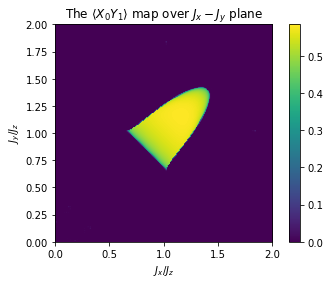

In [9]:
plt.imshow(XY, origin='lower', extent=[0, 2, 0, 2])
plt.colorbar()
plt.xlabel(r'$J_x/J_z$')
plt.ylabel(r'$J_y/J_z$')
plt.title(r'The $\langle X_0 Y_1 \rangle$ map over $J_x-J_y$ plane')
plt.show()

In [10]:
np.savetxt(folder_prefix+'XY.dat', XY)

## Read the string order parameter map

In [5]:
X_str = np.zeros((201,201))
Z_str = np.zeros((201,201))

In [6]:
for i in range(201):
    for j in range(201):
        Jx = X[i, j]
        Jy = Y[i, j]
        Jz = 1.0
        
        result = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=L, chi=chi, prefix=folder_prefix)

        if (result == -1):
            print(f"No such file for J = ({Jx}, {Jy}, {Jz})")
            continue
        else:
            energy = result['energy']
            psi = result['psi']
            
            print(f'psi takes {sys.getsizeof(psi)/1e6} MB')
            
            x_str_param = np.abs(psi.expectation_value_term([('Sx', i) for i in range(1, 51)]))
            X_str[i, j] = x_str_param
            
            z_str_param = np.abs(psi.expectation_value_term([('Sz', i) for i in range(0, 50)]))
            Z_str[i, j] = z_str_param
            if i != j: # then symmetrize this value lol
                X_str[j, i] = x_str_param
                Z_str[j, i] = z_str_param

        # initial_psi = psi.copy()


psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.09, 0.0, 1.0)
No such file for J = (0.1, 0.0, 1.0)
No such file for J = (0.11, 0.0, 1.0)
No such file for J = (0.12, 0.0, 1.0)
No such file for J = (0.13, 0.0, 1.0)
No such file for J = (0.14, 0.0, 1.0)
No such file for J = (0.15, 0.0, 1.0)
No such file for J = (0.16, 0.0, 1.0)
No such file for J = (0.17, 0.0, 1.0)
No such file for J = (0.18, 0.0, 1.0)
No such file for J = (0.19, 0.0, 1.0)
No such file for J = (0.2, 0.0, 1.0)
No such file for J = (0.21, 0.0, 1.0)
No such file for J = (0.22, 0.0, 1.0)
No such file for J = (0.23, 0.0, 1.0)
No such file for J = (0.24, 0.0, 1.0)
No such file for J = (0.25, 0.0, 1.0)
No such file for J = (0.26, 0.0, 1.0)
No such file for J = (0.27, 0.0, 1.0)
No such file for J = (0.28, 0.0, 1.0)
No such file for J = (0.29, 0.0, 1.0)
No such file fo

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.07, 1.0)
No such file for J = (0.01, 0.07, 1.0)
No such file for J = (0.02, 0.07, 1.0)
No such file for J = (0.03, 0.07, 1.0)
No such file for J = (0.04, 0.07, 1.0)
No such file for J = (0.05, 0.07, 1.0)
No such file for J = (0.06, 0.07, 1.0)
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.09, 1.0)
No such file for J = (0.01, 0.09, 1.0)
No such file for J = (0.02, 0.09, 1.0)
No such file for J = (0.03, 0.09, 1.0)
No such file for J = (0.04, 0.09, 1.0)
No such file for J = (0.05, 0.09, 1.0)
No such file for J = (0.06, 0.09, 1.0)
No such file f

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.2, 1.0)
No such file for J = (0.01, 0.2, 1.0)
No such file for J = (0.02, 0.2, 1.0)
No such file for J = (0.03, 0.2, 1.0)
No such file for J = (0.04, 0.2, 1.0)
No such file for J = (0.05, 0.2, 1.0)
No such file for J = (0.06, 0.2, 1.0)
No such file for J = (0.07, 0.2, 1.0)
No such file for J = (0.08, 0.2, 1.0)
No such file for J = (0.09, 0.2, 1.0)
No such file for J = (0.1, 0.2, 1.0)
No such file for J = (0.11, 0.2, 1.0)
No such file for J = (0.12, 0.2, 1.0)
No such file for J = (0.13, 0.2, 1.0)
No such file for J = (0.14, 0.2, 1.0)
No such file for J = (0.15, 0.2, 1.0)
No such file for J = (0.16, 0.2, 1.0)
No such file for J = (0.17, 0.2, 1.0)
No such file for J = (0.18, 0.2, 1.0)
No such file for J = (0.19, 0.2, 1.0)
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.29, 1.0)
No such file for J = (0.01, 0.29, 1.0)
No such file for J = (0.02, 0.29, 1.0)
No such file for J = (0.03, 0.29, 1.0)
No such file for J = (0.04, 0.29, 1.0)
No such file for J = (0.05, 0.29, 1.0)
No such file for J = (0.06, 0.29, 1.0)
No such file for J = (0.07, 0.29, 1.0)
No such file for J = (0.08, 0.29, 1.0)
No such file for J = (0.09, 0.29, 1.0)
No such file for J = (0.1, 0.29, 1.0)
No such file for J = (0.11, 0.29, 1.0)
No such file for J = (0.12, 0.29, 1.0)
No such file for J = (0.13, 0.29, 1.0)
No such file for J = (0.14, 0.29, 1.0)
No such file for J = (0.15, 0.29, 1.0)
No such file for J = (0.16, 0.29, 1.0)
No such file for J = (0.17, 0.29, 1.0)
No such file for J = (0.18, 0.29, 1.0)
No such file for J = (0.19, 0.29, 1.0)
No such file for J = (0.2, 0.29, 1.0)
No such file for J = (0.21, 0.29, 1.0

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.36, 1.0)
No such file for J = (0.01, 0.36, 1.0)
No such file for J = (0.02, 0.36, 1.0)
No such file for J = (0.03, 0.36, 1.0)
No such file for J = (0.04, 0.36, 1.0)
No such file for J = (0.05, 0.36, 1.0)
No such file for J = (0.06, 0.36, 1.0)
No such file for J = (0.07, 0.36, 1.0)
No such file for J = (0.08, 0.36, 1.0)
No such file for J = (0.09, 0.36, 1.0)
No such file for J = (0.1, 0.36, 1.0)
No such file for J = (0.11, 0.36, 1.0)
No such file for J = (0.12, 0.36, 1.0)
No such file for J = (0.13, 0.36, 1.0)
No such file for J = (0.14, 0.36, 1.0)
No such file for J = (0.15, 0.36, 1.0)
No such file for J = (0.16, 0.36, 1.0)
No such file for J = (0.17, 0.36, 1.0)
No such file for J = (0.18, 0.36, 1.0)
No such file for J = (0.19, 0.36, 1.0)
No such file for J = (0.2, 0.36, 1.0)
No such file for J = (0.21, 0.36, 1.0)
No such file for J 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.43, 1.0)
No such file for J = (0.01, 0.43, 1.0)
No such file for J = (0.02, 0.43, 1.0)
No such file for J = (0.03, 0.43, 1.0)
No such file for J = (0.04, 0.43, 1.0)
No such file for J = (0.05, 0.43, 1.0)
No such file for J = (0.06, 0.43, 1.0)
No such file for J = (0.07, 0.43, 1.0)
No such file for J = (0.08, 0.43, 1.0)
No such file for J = (0.09, 0.43, 1.0)
No such file for J = (0.1, 0.43, 1.0)
No such file for J = (0.11, 0.43, 1.0)
No such file for J = (0.12, 0.43, 1.0)
No such file for J = (0.13, 0.43, 1.0)
No such file for J = (0.14, 0.43, 1.0)
No such file for J = (0.15, 0.43, 1.0)
No such file for J = (0.16, 0.43, 1.0)
No such file for J = (0.17, 0.43, 1.0)
No such file for J = (0.18, 0.43, 1.0)
No such file for J = (0.19, 0.43, 1.0)
No such file for J = (0.2, 0.43, 1.0)
No such file for J = (0.21, 0.43, 1.0)
No such file for J = (0.22, 0.43, 1.0)
No such file for J = (

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.48, 1.0)
No such file for J = (0.01, 0.48, 1.0)
No such file for J = (0.02, 0.48, 1.0)
No such file for J = (0.03, 0.48, 1.0)
No such file for J = (0.04, 0.48, 1.0)
No such file for J = (0.05, 0.48, 1.0)
No such file for J = (0.06, 0.48, 1.0)
No such file for J = (0.07, 0.48, 1.0)
No such file for J = (0.08, 0.48, 1.0)
No such file for J = (0.09, 0.48, 1.0)
No such file for J = (0.1, 0.48, 1.0)
No such file for J = (0.11, 0.48, 1.0)
No such file for J = (0.12, 0.48, 1.0)
No such file for J = (0.13, 0.48, 1.0)
No such file for J = (0.14, 0.48, 1.0)
No such file for J = (0.15, 0.48, 1.0)
No such file for J = (0.16, 0.48, 1.0)
No such file for J = (0.17, 0.48, 1.0)
No such file for J = (0.18, 0.48, 1.0)
No such file for J = (0.19, 0.48, 1.0)
No such file for J = (0.2, 0.48, 1.0)
No such file for J = (0.21, 0.48, 1.0)
No such file for J = (0.22, 0.48, 1.0)
No such file for J = (0.23, 0.48, 1.0)
No s

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.53, 1.0)
No such file for J = (0.01, 0.53, 1.0)
No such file for J = (0.02, 0.53, 1.0)
No such file for J = (0.03, 0.53, 1.0)
No such file for J = (0.04, 0.53, 1.0)
No such file for J = (0.05, 0.53, 1.0)
No such file for J = (0.06, 0.53, 1.0)
No such file for J = (0.07, 0.53, 1.0)
No such file for J = (0.08, 0.53, 1.0)
No such file for J = (0.09, 0.53, 1.0)
No such file for J = (0.1, 0.53, 1.0)
No such file for J = (0.11, 0.53, 1.0)
No such file for J = (0.12, 0.53, 1.0)
No such file for J = (0.13, 0.53, 1.0)
No such file for J = (0.14, 0.53, 1.0)
No such file for J = (0.15, 0.53, 1.0)
No such file for J = (0.16, 0.53, 1.0)
No such file for J = (0.17, 0.53, 1.0)
No such file for J = (0.18, 0.53, 1.0)
No such file for J = (0.19, 0.53, 1.0)
No such file for J = (0.2, 0.53, 1.0)
No such file for J = (0.21, 0.53, 1.0)
No such file for J = (0.22, 0.53, 1.0)
No such file for J = (

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 0.58, 1.0)
No such file for J = (0.01, 0.58, 1.0)
No such file for J = (0.02, 0.58, 1.0)
No such file for J = (0.03, 0.58, 1.0)
No such file for J = (0.04, 0.58, 1.0)
No such file for J = (0.05, 0.58, 1.0)
No such file for J = (0.06, 0.58, 1.0)
No such file for J = (0.07, 0.58, 1.0)
No such file for J = (0.08, 0.58, 1.0)
No such file for J = (0.09, 0.58, 1.0)
No such file for J = (0.1, 0.58, 1.0)
No such file for J = (0.11, 0.58, 1.0)
No such file for J = (0.12, 0.58, 1.0)
No such file for J = (0.13, 0.58, 1.0)
No such file for J = (0.14, 0.58, 1.0)
No such file for J = (0.15, 0.58, 1.0)
No such file for J = (0.16, 0.58, 1.0)
No such file for J = (0.17, 0.58, 1.0)
No such file for J = (0.18, 0.58, 1.0)
No such file for J = (0.19, 0.58, 1.0)
No such file for J = (0.2, 0.58, 1.0)
No such file for J = (0.21, 0.58, 1.0)
No such file for J = (0.22, 0.58, 1.0)
No such file for J = (0.23, 0.58, 1.0)
No s

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

No such file for J = (0.0, 0.63, 1.0)
No such file for J = (0.01, 0.63, 1.0)
No such file for J = (0.02, 0.63, 1.0)
No such file for J = (0.03, 0.63, 1.0)
No such file for J = (0.04, 0.63, 1.0)
No such file for J = (0.05, 0.63, 1.0)
No such file for J = (0.06, 0.63, 1.0)
No such file for J = (0.07, 0.63, 1.0)
No such file for J = (0.08, 0.63, 1.0)
No such file for J = (0.09, 0.63, 1.0)
No such file for J = (0.1, 0.63, 1.0)
No such file for J = (0.11, 0.63, 1.0)
No such file for J = (0.12, 0.63, 1.0)
No such file for J = (0.13, 0.63, 1.0)
No such file for J = (0.14, 0.63, 1.0)
No such file for J = (0.15, 0.63, 1.0)
No such file for J = (0.16, 0.63, 1.0)
No such file for J = (0.17, 0.63, 1.0)
No such file for J = (0.18, 0.63, 1.0)
No such file for J = (0.19, 0.63, 1.0)
No such file for J = (0.2, 0.63, 1.0)
No such file for J = (0.21, 0.63, 1.0)
No such file for J = (0.22, 0.63, 1.0)
No such file for J = (0.23, 0.63, 1.0)
No such file for J = (0.24, 0.63, 1.0)
No such file for J = (0.25, 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

No such file for J = (0.0, 0.68, 1.0)
No such file for J = (0.01, 0.68, 1.0)
No such file for J = (0.02, 0.68, 1.0)
No such file for J = (0.03, 0.68, 1.0)
No such file for J = (0.04, 0.68, 1.0)
No such file for J = (0.05, 0.68, 1.0)
No such file for J = (0.06, 0.68, 1.0)
No such file for J = (0.07, 0.68, 1.0)
No such file for J = (0.08, 0.68, 1.0)
No such file for J = (0.09, 0.68, 1.0)
No such file for J = (0.1, 0.68, 1.0)
No such file for J = (0.11, 0.68, 1.0)
No such file for J = (0.12, 0.68, 1.0)
No such file for J = (0.13, 0.68, 1.0)
No such file for J = (0.14, 0.68, 1.0)
No such file for J = (0.15, 0.68, 1.0)
No such file for J = (0.16, 0.68, 1.0)
No such file for J = (0.17, 0.68, 1.0)
No such file for J = (0.18, 0.68, 1.0)
No such file for J = (0.19, 0.68, 1.0)
No such file for J = (0.2, 0.68, 1.0)
No such file for J = (0.21, 0.68, 1.0)
No such file for J = (0.22, 0.68, 1.0)
No such file for J = (0.23, 0.68, 1.0)
No such file for J = (0.24, 0.68, 1.0)
No such file for J = (0.25, 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
No such file for J = (0.0, 0.73, 1.0)
No such file for J = (0.01, 0.73, 1.0)
No such file for J = (0.02, 0.73, 1.0)
No such file for J = (0.03, 0.73, 1.0)
No such file for J = (0.04, 0.73, 1.0)
No such file for J = (0.05, 0.73, 1.0)
No such file for J = (0.06, 0.73, 1.0)
No such file for J = (0.07, 0.73, 1.0)
No such file for J = (0.08, 0.73, 1.0)
No such file for J = (0.09, 0.73, 1.0)
No such file for J = (0.1, 0.73, 1.0)
No such file for J = (0.11, 0.73, 1.0)
No such file for J = (0.12, 0.73, 1.0)
No such file for J = (0.13, 0.73, 1.0)
No such file for J = (0.14, 0.73, 1.0)
No such file for J = (0.15, 0.73, 1.0)
No such file for J = (0.16, 0.73, 1.0)
No such file for J = (0.17, 0.73, 1.0)
No such file for J = (0.18, 0.73, 1.0)
No such file for J = (0.19, 0.73, 1.0)
No such file for J = (0.2, 0.73, 1.0)
No such file for J = (0.21, 0.73, 1.0)
No such file for J = (0.22, 0.73, 1.0)
No such file for J = (0.23, 0.73, 1.0)
No such file for J = (0.24, 0.73, 1.0)
No such

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

No such file for J = (0.0, 0.76, 1.0)
No such file for J = (0.01, 0.76, 1.0)
No such file for J = (0.02, 0.76, 1.0)
No such file for J = (0.03, 0.76, 1.0)
No such file for J = (0.04, 0.76, 1.0)
No such file for J = (0.05, 0.76, 1.0)
No such file for J = (0.06, 0.76, 1.0)
No such file for J = (0.07, 0.76, 1.0)
No such file for J = (0.08, 0.76, 1.0)
No such file for J = (0.09, 0.76, 1.0)
No such file for J = (0.1, 0.76, 1.0)
No such file for J = (0.11, 0.76, 1.0)
No such file for J = (0.12, 0.76, 1.0)
No such file for J = (0.13, 0.76, 1.0)
No such file for J = (0.14, 0.76, 1.0)
No such file for J = (0.15, 0.76, 1.0)
No such file for J = (0.16, 0.76, 1.0)
No such file for J = (0.17, 0.76, 1.0)
No such file for J = (0.18, 0.76, 1.0)
No such file for J = (0.19, 0.76, 1.0)
No such file for J = (0.2, 0.76, 1.0)
No such file for J = (0.21, 0.76, 1.0)
No such file for J = (0.22, 0.76, 1.0)
No such file for J = (0.23, 0.76, 1.0)
No such file for J = (0.24, 0.76, 1.0)
No such file for J = (0.25, 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.56, 1

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.58, 1.0)
No such file for J = (0.01, 1.58, 1.0)

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.6, 1.0)
No such file for J = (0.01, 1.6, 1.0)
No such file for J = (0.02, 1.6, 1.0)
No su

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.62, 1.0)
No such file for J = (0.01, 1.62, 1.0)
No such file for J = (0.02, 1.62, 1.0)
No such file for J = (0.03, 1.62, 1.0)
No su

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.64, 1.0)
No such file for J = (0.01, 1.64, 1.0)
No such file for J = (0.02, 1.64, 1.0)
No such file for J = (0.03, 1.64, 1.0)
No such file for J = (0.04, 1.64, 1.0)
No such 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.66, 1.0)
No such file for J = (0.01, 1.66, 1.0)
No such file for J = (0.02, 1.66, 1.0)
No such file for J = (0.03, 1.66, 1.0)
No such file for J = (0.04, 1.66, 1.0)
No such file for J = (0.05, 1.66, 1.0)
No such fil

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.68, 1.0)
No such file for J = (0.01, 1.68, 1.0)
No such file for J = (0.02, 1.68, 1.0)
No such file for J = (0.03, 1.68, 1.0)
No such file for J = (0.04, 1.68, 1.0)
No such file for J = (0.05, 1.68, 1.0)
No such file for J = (0.06, 1.68, 1.0)
No such file f

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.7, 1.0)
No such file for J = (0.01, 1.7, 1.0)
No such file for J = (0.02, 1.7, 1.0)
No such file for J = (0.03, 1.7, 1.0)
No such file for J = (0.04, 1.7, 1.0)
No such file for J = (0.05, 1.7, 1.0)
No such file for J = (0.06, 1.7, 1.0)
No such file for J = (0.07, 1.7, 1.0)
No such file for J = (0.0

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.72, 1.0)
No such file for J = (0.01, 1.72, 1.0)
No such file for J = (0.02, 1.72, 1.0)
No such file for J = (0.03, 1.72, 1.0)
No such file for J = (0.04, 1.72, 1.0)
No such file for J = (0.05, 1.72, 1.0)
No such file for J = (0.06, 1.72, 1.0)
No such file for J = (0.07, 1.72, 1.0)
No such file for J = (0.08, 1.72, 1.0)
No such file for J =

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.74, 1.0)
No such file for J = (0.01, 1.74, 1.0)
No such file for J = (0.02, 1.74, 1.0)
No such file for J = (0.03, 1.74, 1.0)
No such file for J = (0.04, 1.74, 1.0)
No such file for J = (0.05, 1.74, 1.0)
No such file for J = (0.06, 1.74, 1.0)
No such file for J = (0.07, 1.74, 1.0)
No such file for J = (0.08, 1.74, 1.0)
No such file for J = (0.09, 1.74, 1.0)
No such file for J = (0

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.76, 1.0)
No such file for J = (0.01, 1.76, 1.0)
No such file for J = (0.02, 1.76, 1.0)
No such file for J = (0.03, 1.76, 1.0)
No such file for J = (0.04, 1.76, 1.0)
No such file for J = (0.05, 1.76, 1.0)
No such file for J = (0.06, 1.76, 1.0)
No such file for J = (0.07, 1.76, 1.0)
No such file for J = (0.08, 1.76, 1.0)
No such file for J = (0.09, 1.76, 1.0)
No such file for J = (0.1, 1.76, 1.0)
No such file for J = (0.11,

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.78, 1.0)
No such file for J = (0.01, 1.78, 1.0)
No such file for J = (0.02, 1.78, 1.0)
No such file for J = (0.03, 1.78, 1.0)
No such file for J = (0.04, 1.78, 1.0)
No such file for J = (0.05, 1.78, 1.0)
No such file for J = (0.06, 1.78, 1.0)
No such file for J = (0.07, 1.78, 1.0)
No such file for J = (0.08, 1.78, 1.0)
No such file for J = (0.09, 1.78, 1.0)
No such file for J = (0.1, 1.78, 1.0)
No such file for J = (0.11, 1.78, 1.0)
No such file for J = (0.12, 1.

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.8, 1.0)
No such file for J = (0.01, 1.8, 1.0)
No such file for J = (0.02, 1.8, 1.0)
No such file for J = (0.03, 1.8, 1.0)
No such file for J = (0.04, 1.8, 1.0)
No such file for J = (0.05, 1.8, 1.0)
No such file for J = (0.06, 1.8, 1.0)
No such file for J = (0.07, 1.8, 1.0)
No such file for J = (0.08, 1.8, 1.0)
No such file for J = (0.09, 1.8, 1.0)
No such file for J = (0.1, 1.8, 1.0)
No such file for J = (0.11, 1.8, 1.0)
No such file for J = (0.12, 1.8, 1.0)
No such file for J = (0.13, 1.8, 1.0)
No such 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.82, 1.0)
No such file for J = (0.01, 1.82, 1.0)
No such file for J = (0.02, 1.82, 1.0)
No such file for J = (0.03, 1.82, 1.0)
No such file for J = (0.04, 1.82, 1.0)
No such file for J = (0.05, 1.82, 1.0)
No such file for J = (0.06, 1.82, 1.0)
No such file for J = (0.07, 1.82, 1.0)
No such file for J = (0.08, 1.82, 1.0)
No such file for J = (0.09, 1.82, 1.0)
No such file for J = (0.1, 1.82, 1.0)
No such file for J = (0.11, 1.82, 1.0)
No such file for J = (0.12, 1.82, 1.0)
No such file for J = (0.13, 1.82, 1.0)
No such file for J = (0.14, 1.82, 1.

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.84, 1.0)
No such file for J = (0.01, 1.84, 1.0)
No such file for J = (0.02, 1.84, 1.0)
No such file for J = (0.03, 1.84, 1.0)
No such file for J = (0.04, 1.84, 1.0)
No such file for J = (0.05, 1.84, 1.0)
No such file for J = (0.06, 1.84, 1.0)
No such file for J = (0.07, 1.84, 1.0)
No such file for J = (0.08, 1.84, 1.0)
No such file for J = (0.09, 1.84, 1.0)
No such file for J = (0.1, 1.84, 1.0)
No such file for J = (0.11, 1.84, 1.0)
No such file for J = (0.12, 1.84, 1.0)
No such file for J = (0.13, 1.84, 1.0)
No such file for J = (0.14, 1.84, 1.0)
No such file for J = (0.15, 1.84, 1.0)


psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.86, 1.0)
No such file for J = (0.01, 1.86, 1.0)
No such file for J = (0.02, 1.86, 1.0)
No such file for J = (0.03, 1.86, 1.0)
No such file for J = (0.04, 1.86, 1.0)
No such file for J = (0.05, 1.86, 1.0)
No such file for J = (0.06, 1.86, 1.0)
No such file for J = (0.07, 1.86, 1.0)
No such file for J = (0.08, 1.86, 1.0)
No such file for J = (0.09, 1.86, 1.0)
No such file for J = (0.1, 1.86, 1.0)
No such file for J = (0.11, 1.86, 1.0)
No such file for J = (0.12, 1.86, 1.0)
No such file for J = (0.13, 1.86, 1.0)
No such file for J = (0.14, 1.86, 1.0)
No such file for J = (0.15, 1.86, 1.0)
No such file for J = (0.16, 1.86, 1.0)
No 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.88, 1.0)
No such file for J = (0.01, 1.88, 1.0)
No such file for J = (0.02, 1.88, 1.0)
No such file for J = (0.03, 1.88, 1.0)
No such file for J = (0.04, 1.88, 1.0)
No such file for J = (0.05, 1.88, 1.0)
No such file for J = (0.06, 1.88, 1.0)
No such file for J = (0.07, 1.88, 1.0)
No such file for J = (0.08, 1.88, 1.0)
No such file for J = (0.09, 1.88, 1.0)
No such file for J = (0.1, 1.88, 1.0)
No such file for J = (0.11, 1.88, 1.0)
No such file for J = (0.12, 1.88, 1.0)
No such file for J = (0.13, 1.88, 1.0)
No such file for J = (0.14, 1.88, 1.0)
No such file for J = (0.15, 1.88, 1.0)
No such file for J = (0.16, 1.88, 1.0)
No such file for J = (0.17, 1.88, 1.0)
No suc

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.9, 1.0)
No such file for J = (0.01, 1.9, 1.0)
No such file for J = (0.02, 1.9, 1.0)
No such file for J = (0.03, 1.9, 1.0)
No such file for J = (0.04, 1.9, 1.0)
No such file for J = (0.05, 1.9, 1.0)
No such file for J = (0.06, 1.9, 1.0)
No such file for J = (0.07, 1.9, 1.0)
No such file for J = (0.08, 1.9, 1.0)
No such file for J = (0.09, 1.9, 1.0)
No such file for J = (0.1, 1.9, 1.0)
No such file for J = (0.11, 1.9, 1.0)
No such file for J = (0.12, 1.9, 1.0)
No such file for J = (0.13, 1.9, 1.0)
No such file for J = (0.14, 1.9, 1.0)
No such file for J = (0.15, 1.9, 1.0)
No such file for J = (0.16, 1.9, 1.0)
No such file for J = (0.17, 1.9, 1.0)
No such file for J = (0.18, 1.9, 1.0)
No such file for J = (0.19, 

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.92, 1.0)
No such file for J = (0.01, 1.92, 1.0)
No such file for J = (0.02, 1.92, 1.0)
No such file for J = (0.03, 1.92, 1.0)
No such file for J = (0.04, 1.92, 1.0)
No such file for J = (0.05, 1.92, 1.0)
No such file for J = (0.06, 1.92, 1.0)
No such file for J = (0.07, 1.92, 1.0)
No such file for J = (0.08, 1.92, 1.0)
No such file for J = (0.09, 1.92, 1.0)
No such file for J = (0.1, 1.92, 1.0)
No such file for J = (0.11, 1.92, 1.0)
No such file for J = (0.12, 1.92, 1.0)
No such file for J = (0.13, 1.92, 1.0)
No such file for J = (0.14, 1.92, 1.0)
No such file for J = (0.15, 1.92, 1.0)
No such file for J = (0.16, 1.92, 1.0)
No such file for J = (0.17, 1.92, 1.0)
No such file for J = (0.18, 1.92, 1.0)
No such file for J = (0.19, 1.92, 1.0)
No such file

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.94, 1.0)
No such file for J = (0.01, 1.94, 1.0)
No such file for J = (0.02, 1.94, 1.0)
No such file for J = (0.03, 1.94, 1.0)
No such file for J = (0.04, 1.94, 1.0)
No such file for J = (0.05, 1.94, 1.0)
No such file for J = (0.06, 1.94, 1.0)
No such file for J = (0.07, 1.94, 1.0)
No such file for J = (0.08, 1.94, 1.0)
No such file for J = (0.09, 1.94, 1.0)
No such file for J = (0.1, 1.94, 1.0)
No such file for J = (0.11, 1.94, 1.0)
No such file for J = (0.12, 1.94, 1.0)
No such file for J = (0.13, 1.94, 1.0)
No such file for J = (0.14, 1.94, 1.0)
No such file for J = (0.15, 1.94, 1.0)
No such file for J = (0.16, 1.94, 1.0)
No such file for J = (0.17, 1.94, 1.0)
No such file for J = (0.18, 1.94, 1.0)
No such file for J = (0.19, 1.94, 1.0)
No such file for J = (0.2, 1.94, 1.0)
No such file for

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.96, 1.0)
No such file for J = (0.01, 1.96, 1.0)
No such file for J = (0.02, 1.96, 1.0)
No such file for J = (0.03, 1.96, 1.0)
No such file for J = (0.04, 1.96, 1.0)
No such file for J = (0.05, 1.96, 1.0)
No such file for J = (0.06, 1.96, 1.0)
No such file for J = (0.07, 1.96, 1.0)
No such file for J = (0.08, 1.96, 1.0)
No such file for J = (0.09, 1.96, 1.0)
No such file for J = (0.1, 1.96, 1.0)
No such file for J = (0.11, 1.96, 1.0)
No such file for J = (0.12, 1.96, 1.0)
No such file for J = (0.13, 1.96, 1.0)
No such file for J = (0.14, 1.96, 1.0)
No such file for J = (0.15, 1.96, 1.0)
No such file for J = (0.16, 1.96, 1.0)
No such file for J = (0.17, 1.96, 1.0)
No such file for J = (0.18, 1.96, 1.0)
No such file for J = (0.19, 1.96, 1.0)
No such file for J = (0.2, 1.96, 1.0)
No such file for J = (0.21, 1.96, 1.0)
No such file for J = (0.22, 1.96, 1.0)
N

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 1.98, 1.0)
No such file for J = (0.01, 1.98, 1.0)
No such file for J = (0.02, 1.98, 1.0)
No such file for J = (0.03, 1.98, 1.0)
No such file for J = (0.04, 1.98, 1.0)
No such file for J = (0.05, 1.98, 1.0)
No such file for J = (0.06, 1.98, 1.0)
No such file for J = (0.07, 1.98, 1.0)
No such file for J = (0.08, 1.98, 1.0)
No such file for J = (0.09, 1.98, 1.0)
No such file for J = (0.1, 1.98, 1.0)
No such file for J = (0.11, 1.98, 1.0)
No such file for J = (0.12, 1.98, 1.0)
No such file for J = (0.13, 1.98, 1.0)
No such file for J = (0.14, 1.98, 1.0)
No such file for J = (0.15, 1.98, 1.0)
No such file for J = (0.16, 1.98, 1.0)
No such file for J = (0.17, 1.98, 1.0)
No such file for J = (0.18, 1.98, 1.0)
No such file for J = (0.19, 1.98, 1.0)
No such file for J = (0.2, 1.98, 1.0)
No such file for J = (0.21, 1.98, 1.0)
No such file for J = (0.22, 1.98, 1.0)
No such file for J = (

psi takes 6.4e-05 MB
psi takes 6.4e-05 MB
No such file for J = (0.0, 2.0, 1.0)
No such file for J = (0.01, 2.0, 1.0)
No such file for J = (0.02, 2.0, 1.0)
No such file for J = (0.03, 2.0, 1.0)
No such file for J = (0.04, 2.0, 1.0)
No such file for J = (0.05, 2.0, 1.0)
No such file for J = (0.06, 2.0, 1.0)
No such file for J = (0.07, 2.0, 1.0)
No such file for J = (0.08, 2.0, 1.0)
No such file for J = (0.09, 2.0, 1.0)
No such file for J = (0.1, 2.0, 1.0)
No such file for J = (0.11, 2.0, 1.0)
No such file for J = (0.12, 2.0, 1.0)
No such file for J = (0.13, 2.0, 1.0)
No such file for J = (0.14, 2.0, 1.0)
No such file for J = (0.15, 2.0, 1.0)
No such file for J = (0.16, 2.0, 1.0)
No such file for J = (0.17, 2.0, 1.0)
No such file for J = (0.18, 2.0, 1.0)
No such file for J = (0.19, 2.0, 1.0)
No such file for J = (0.2, 2.0, 1.0)
No such file for J = (0.21, 2.0, 1.0)
No such file for J = (0.22, 2.0, 1.0)
No such file for J = (0.23, 2.0, 1.0)
No such file for J = (0.24, 2.0, 1.0)
No such fil

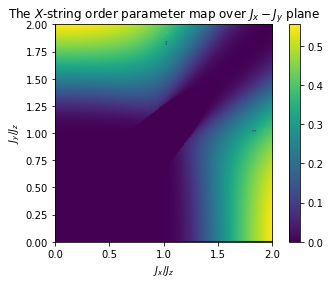

In [7]:
plt.imshow(X_str, origin='lower', extent=[0, 2, 0, 2])
plt.colorbar()
plt.xlabel(r'$J_x/J_z$')
plt.ylabel(r'$J_y/J_z$')
plt.title(r'The $X$-string order parameter map over $J_x-J_y$ plane')
plt.show()

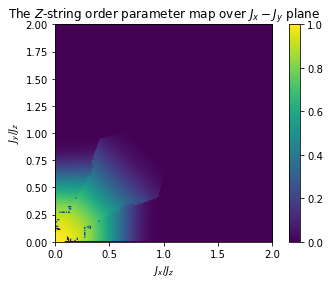

In [8]:
plt.imshow(Z_str, origin='lower', extent=[0, 2, 0, 2])
plt.colorbar()
plt.xlabel(r'$J_x/J_z$')
plt.ylabel(r'$J_y/J_z$')
plt.title(r'The $Z$-string order parameter map over $J_x-J_y$ plane')
plt.show()

In [3]:
wf_dict

NameError: name 'wf_dict' is not defined